# Задание. Предложить визуализации для игры "Что за данные?"

In [1]:
import pandas as pd
import warnings
import numpy as np
import math
import geoplot
import geopandas
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

warnings.simplefilter("ignore")

In [3]:
emails = pd.read_csv('data/hillary-clinton-emails/Emails.csv')

In [4]:
emails.head()

Id  DocNumber                                    MetadataSubject  \
0   1  C05739545                                                WOW   
1   2  C05739546  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   
2   3  C05739547                                      CHRIS STEVENS   
3   4  C05739550                         CAIRO CONDEMNATION - FINAL   
4   5  C05739554  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   

     MetadataTo       MetadataFrom  SenderPersonId           MetadataDateSent  \
0             H  Sullivan, Jacob J            87.0  2012-09-12T04:00:00+00:00   
1             H                NaN             NaN  2011-03-03T05:00:00+00:00   
2            ;H    Mills, Cheryl D            32.0  2012-09-12T04:00:00+00:00   
3             H    Mills, Cheryl D            32.0  2012-09-12T04:00:00+00:00   
4  Abedin, Huma                  H            80.0  2011-03-11T05:00:00+00:00   

        MetadataDateReleased  \
0  2015-05-22T04:00:00+00:00   
1  2015-05-22T04:00:00+00:00   
2  2015-05-22T04:00:00+00:00   
3  2015-05-22T04:00:00+00:00   
4  2015-05-22T04:00:00+00:00   

                                     MetadataPdfLink MetadataCaseNumber  \
0  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...       F-2015-04841   
1  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...       F-2015-04841   
2  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...       F-2015-04841   
3  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...       F-2015-04841   
4  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...       F-2015-04841   

  MetadataDocumentClass                 ExtractedSubject ExtractedTo  \
0         HRC_Email_296                          FW: Wow         NaN   
1         HRC_Email_296                              NaN         NaN   
2         HRC_Email_296                Re: Chris Stevens          B6   
3         HRC_Email_296  FVV: Cairo Condemnation - Final         NaN   
4         HRC_Email_296                              NaN         NaN   

                              ExtractedFrom         ExtractedCc  \
0  Sullivan, Jacob J <Sullivan11@state.gov>                 NaN   
1                                       NaN                 NaN   
2       Mills, Cheryl D <MillsCD@state.gov>        Abedin, Huma   
3       Mills, Cheryl D <MillsCD@state.gov>  Mitchell, Andrew B   
4                                       NaN                 NaN   

                        ExtractedDateSent ExtractedCaseNumber  \
0  Wednesday, September 12, 2012 10:16 AM        F-2015-04841   
1                                     NaN        F-2015-04841   
2  Wednesday, September 12, 2012 11:52 AM        F-2015-04841   
3   Wednesday, September 12,2012 12:44 PM        F-2015-04841   
4                                     NaN        F-2015-04841   

  ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
0          C05739545            05/13/2015              RELEASE IN FULL   
1          C05739546            05/13/2015              RELEASE IN PART   
2          C05739547            05/14/2015              RELEASE IN PART   
3          C05739550            05/13/2015              RELEASE IN PART   
4          C05739554            05/13/2015              RELEASE IN PART   

                                   ExtractedBodyText  \
0                                                NaN   
1  B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...   
2                                                Thx   
3                                                NaN   
4  H <hrod17@clintonemail.com>\nFriday, March 11,...   

                                             RawText  
0  UNCLASSIFIED\nU.S. Department of State\nCase N...  
1  UNCLASSIFIED\nU.S. Department of State\nCase N...  
2  UNCLASSIFIED\nU.S. Department of State\nCase N...  
3  UNCLASSIFIED\nU.S. Department of State\nCase N...  
4  B6\nUNCLASSIFIED\nU.S. Department of State\nCa...

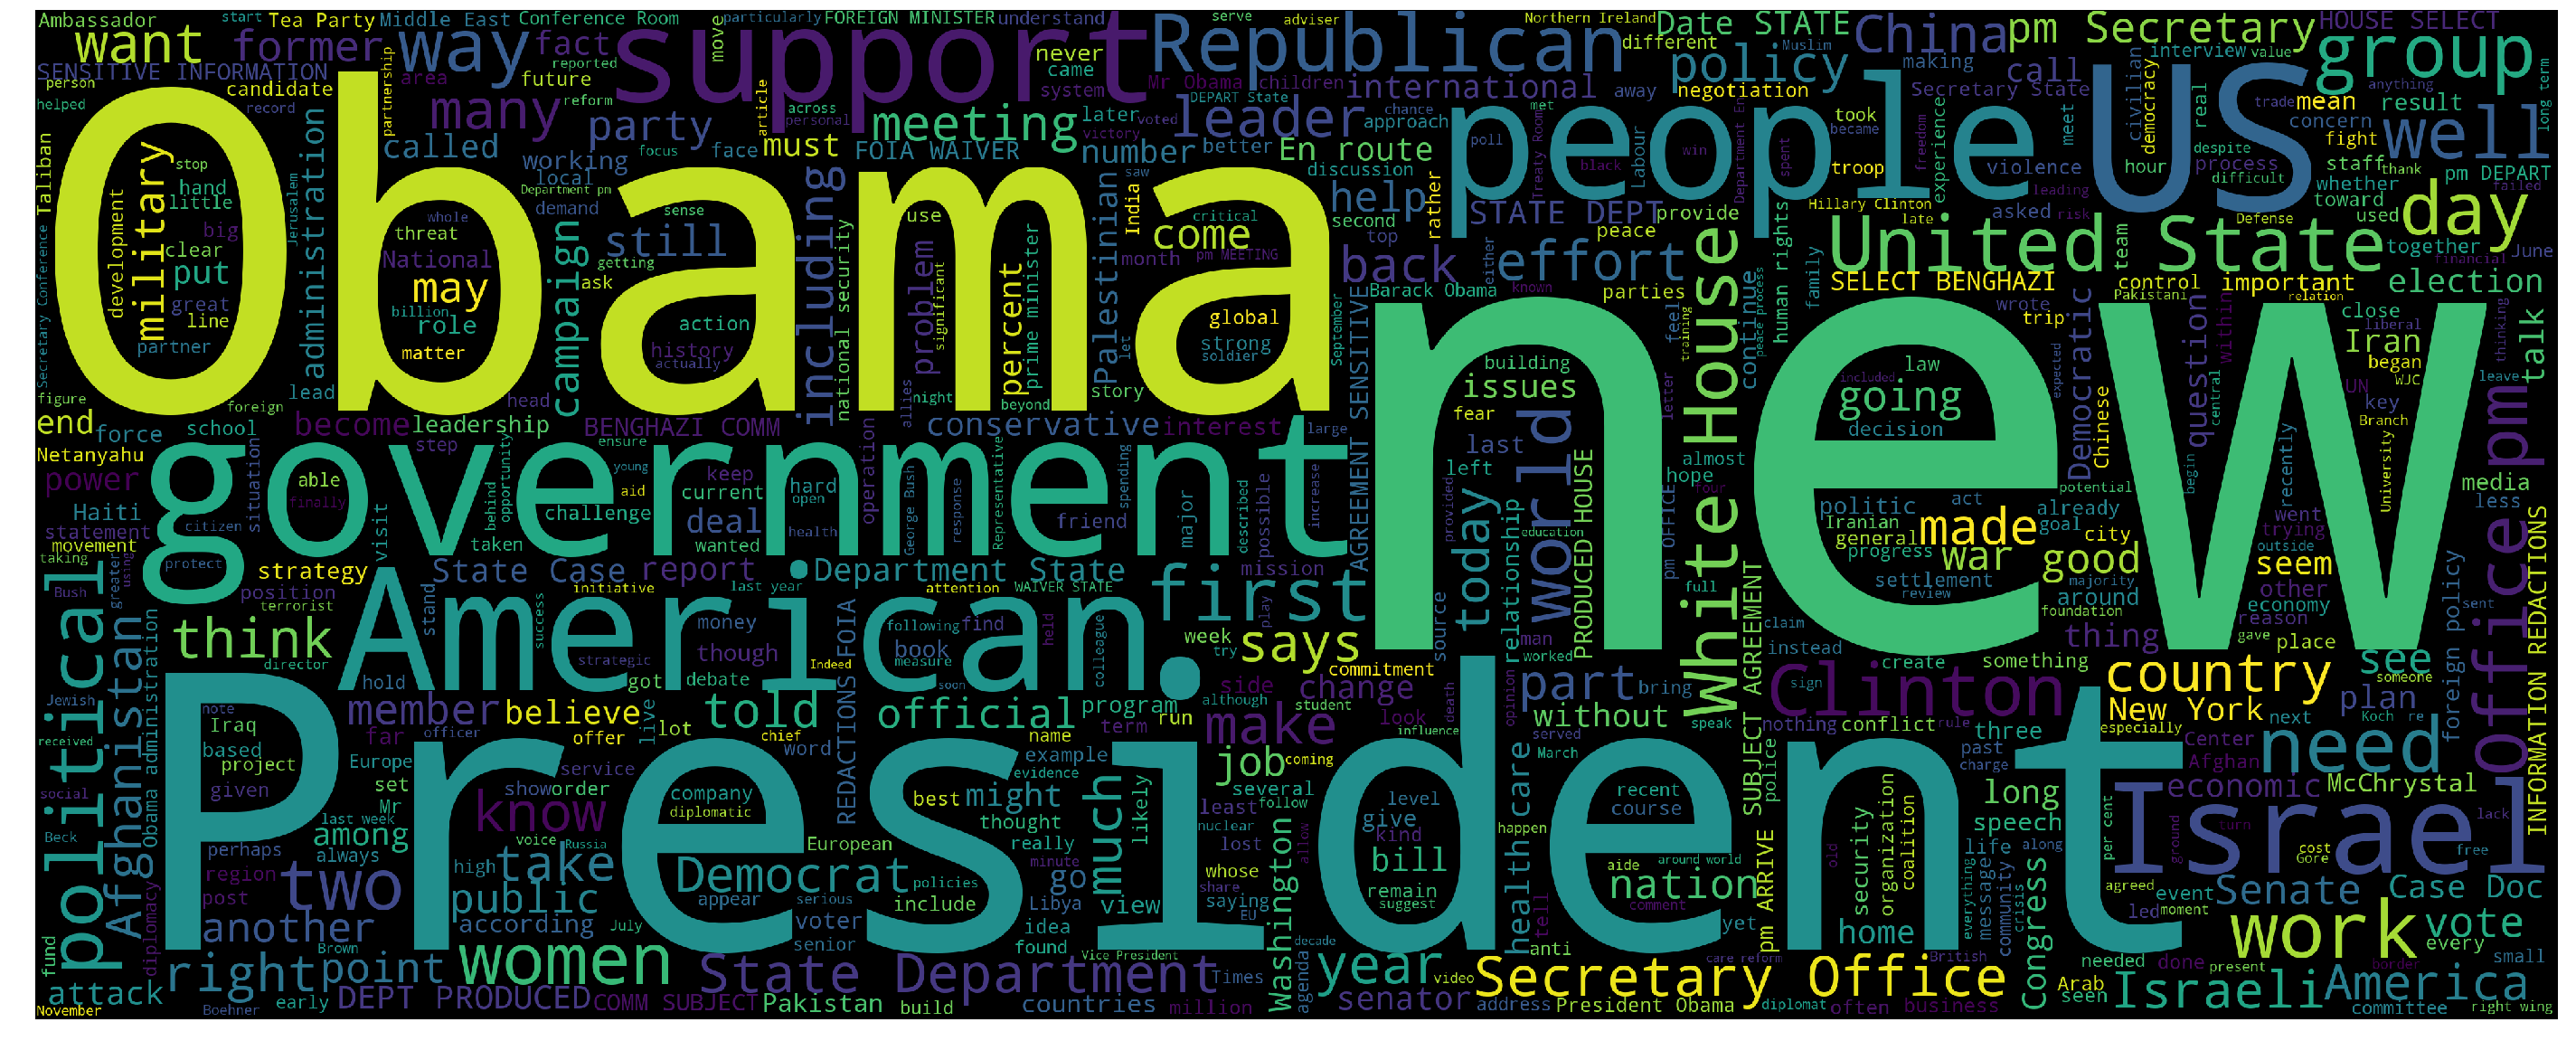

In [5]:
c = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xf5\x00\x00\x01\x0e\x08\x02\x00\x00\x00\xde\xf1\xc6\\\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\x9dy|\x0c\xf7\xff\xc7_\x9bK.I\xc4\x15!\tq\xc6Y|\x1du\xc5\x1dWQE[\x82R\x14E]\xadV\xd5\xad\xd4\xd1j\x15UW\xeb\xaa+\xce"\xee\x06uU\\AD\x1cI\x88H\x90\xc8%\xf7\xbe\x7f\x7f\xec\xfc2;\x93\xd9\xdd\x99\xdd\xd9\xdd\xc8\xee\xf3\xf1\xf9c\x8e\xcf|>\x9f\x99y\xcd\xccg>\xc7\xfb\xad "X\xb1RB\xb11w\x01\xacX1"V}[)\xc9X\xf5m\xa5$c\xd5\xb7\x95\x92\x8cU\xdfVJ2V}[)\xc9X\xf5m\xa5$c\xd5\xb7\x95\x92\x8cU\xdfVJ2V}[)\xc9X\xf5m\xa5$c\xd5\xb7\x95\x92\x8cU\xdfVJ2V}[4\xf7\xee!*\xca\xdc\x850&V}[.\xc9\xc9\xe8\xd9\x13\x89\x89\xe6.\x871\xb1\xea\xdbB\xc9\xcf\xc7\xa0Ax\xf4\x08\x01\x01\xe6.\x8a1\xb1\xea\xdb\x12!\xc2\x9818v\x0c^^(_\xde\xdc\xa51&V}[\x1c\xe9\xe9\x184\x08\x1b6\x00@\xdd\xba\xe6.\x8d\x91\xb13w\x01\xac\x98\x88\xe4d\xfc\xf6\x1b\xee\xdd\xc3\x89\x13x\xfe\x9c\xd9X\xbb\xb6\xb4Dv\xef\xc6\x80\x01\xb2\x17\xcd\x88X\xf5m\x11\\\xbd\x8a\xde\xbd\x91\x90\xc0\xdf\xee\xe7\'!\x91\xd0P|\xfd\xb5U\xdfV\x8a\x19O\x9f\xa2kW\xa4\xa4\x08\xecz\xfc\x18YY\xb8|\x19\xa7N!#\x03_}\x85J\x95\x04\xa2\x15\x14`\xfdz|\xf1\x05\x82\x82\x8c]X\x99\xb1\xea\xbb\xe4\xf3\xcd7\xc2\xe2\x06\xb0v-~\xff\x1d\xea&\x14~\xfa\x89\x13!.\x0e!!X\xbf\x1ew\xef\x02\xc0;\xef0\xdb\x95J\xd8p\xff\xddn\xdeDh(z\xf5B\xbdz\xb2\x95\xdcp\xac\xfa.\xf9dfj\xdb\xab.\xee\x15+p\xe6\x0c\xea\xd7\x87\xbd=^\xbc@D\x04\xe2\xe28\x91\xeb\xd6EA\x01\x96.\xc5\xa2E\xe8\xd7\x0f\x9b61\xdb\xbf\xff\x1e\xb3f\xa1\xa0\x00\xcb\x97#&\x06\xce\xcer\x9f\x83\xde\x90\x95\x92Nx8\x95.M\x80\x0ca\xe4Hj\xd9\x92]=y\x92\x88h\xce\x1cN\x9c\x83\x07\xcd}\xc2j(\xc8j\xdf\xc7\x02\xb8x\x11\xdd\xbb#5U\xe6d=<P\xaf\x1e\xfe\xfd\x97\xb3q\xe5J\x8c\x1f/sFzcm\xff\xb6\x08\xde}\x17\'N\xc0\xd5U\xe6d_\xbf\xe6\x8b\x1b@^\x9e\xcc\xb9\x18\x82U\xdf\x96B\xb3fX\xba\xd4\x14\x19\x95.m\x8a\\Db\xd5\xb7\x051r\xa4p\xf3\x9f\xbc\x94)c\xf4,\xc4c\xd5\xb7\x05ag\x87f\xcd\x8c\x9e\x8b\xa7\xa7\xd1\xb3\x10\x8fU\xdf\x16\x04\x11bb\x8c\x9e\x8b\xad\xad\xd1\xb3\x10\x8f\xb5\xfd\xfb\xad!;\x1b\xa7N\xe1\xf0a\xdc\xbe\x8d\xf8x\xa4\xa4\xc0\xd9\x19NN\xa8Z\x15u\xeb\xa2qc\xf4\xec\xc9\x1f\x0cx\xe4\x08~\xfb\r\r\x1b\xa2N\x1d\x94.\x8d\xbf\xfe\xc2\xad[F/\xa7\xec\xad4\x06a\xee\x06J+\xa2\x08\t\xa1J\x95t4N\xdb\xdaR` \x1d9\xc2\x1e\xf5\xcf?\xf24{K\n\x9f~J\x07\x0fRt4\xa7\xfcyy\xf4\xf0\xa1\x89\xaf\x19\x11\x91U\xdf\xc5\x9d\x9c\x1c\x9a:\x95\x14\n\t\n\x0b\x0c\xa4\xb88\xe6\xf0V\xad\xcc q\x80\x1c\x1c\xd8\'\xed\xfe}j\xd9\x92z\xf64\xc3\xd5\xb3\xea\xbb\xf8\x92\x9cLk\xd7R\xd5\xaa\xfa\xc8\xabZ5z\xf1\x82\x88(2\x92\\]\xcd#q\x17\x17Z\xb0\x80&M"\'\'\x02h\xc4\x083\\Ck\xffe1"5\x15\xfb\xf7\xe3\xee]<~\x8cG\x8fp\xeb\x96A}%\xc3\x87c\xe3F\x00\x88\x88\xc0\xd8\xb1\xb8x\x11\xee\xee\xf0\xf3C\x992HKCF\x06\x12\x12\x90\x96&W\xd9u\xb3p!f\xcc\xe0oLLD\xc5\x8aF\xcc\xd4\xaa\xefbAB\x02f\xce\xc4_\x7f!+K\xb64\xed\xec\x10\x1b\x0boof5/\x0f\xf6\xf6\xfc8))\x88\x8dEt4n\xdc\xc0\xad[\xb8y\x13O\x9e\xc8V\x00\x1e\x7f\xfd\x85\x8f>b\x96\xb3\xb3\xb1};V\xae\x84\x97\x17\x8e\x1e5V\x8e\x00\xac\xf5\x13\xf3\xf3\xeb\xaf\xe4\xeen\x94\x1aBH\x88\xe4\xc2$%\xd1\x91#4\x7f>\xf5\xedK>>r\x16\xe6\xd4)"\xa2\xd4TZ\xbc\x98*V$\x80\xbc\xbc(6V\xf6\xcb\xc9\xc1\xfa\xfe6\'\xd9\xd9\x185\n[\xb7\x1a%\xf1\xb2eq\xe3\x06\xaaT1(\x91\xa4$\x84\x87\xe3\xeaU\\\xbb\x86\x9b7\x11\x13\x03\xbd\xf5\xd2\xa2\x05\xaaU\xc3\xd1\xa3L\x03\xa2\x97\x17N\x9f6\xfa\xec}\xab\xbe\r%)\t\xa1\xa1\x18:T\xf2\x81))\xe8\xd1\x03\x97.\x19\xa1L\x80\x97\x17N\x9c@\xfd\xfa2\'\x9b\x96\x86\x88\x08DD\xe0\xc6\rf!=]\x9ft*U\xc2\xe9\xd3\xa8SG\xe6\xe2\x15\xc5\xaaoC\x190\x00G\x8e =\x9d?\x9fE;ii\xe8\xd2\x05W\xae\x18\xa5H>>8y\x12\xb5j\x19%qu\x88\xf0\xf81n\xdc\xc0\x8d\x1b\xb8~\x1d\xd7\xaf#>^\xf7Q\r\x1b"$\x045j\x18\xbdx\xb0\xea\xdbp\xbawGh(\xd2\xd2$\x8c\x9b\xcb\xccDP\x90\xc0\xc8RY\xf0\xf7\xc7\xa9S\xa8Z\xd5(\x89\xeb\xe4\xc5\x0b\\\xbf\x8ek\xd7p\xfe<\xc2\xc2\x90\x91\xc1\xd9\xeb\xe4\x84q\xe30\x7f>\x9c\x9cLT\x1e\xab\xbe\r\xe5\xa7\x9f0e\n\xd2\xd3\xc5\x8e\xae&\xc2\x87\x1fb\xf7n\xa3\x14\xa6F\r\xfc\xf3\x0f*W6J\xe2R\xc9\xcf\xc7\x95+8}\x1a\x97/\xc3\xd6\x16\xad[c\xf0`\xb6=\xc74X\xc7\x9f\x18\xca\xe5\xcb\xb0\xb7\x970u\xe0\xfb\xef\x8d%\xee\xea\xd5q\xe6Lq\x117\x00;;\xb4j\x85V\xad\xccY\x06\xeb\xf8A\xfdQ*1n\x1cv\xee\x84\x97\x97\xd8C\x8e\x1e\xc5\xacYF)\x8cJ\xdc\x06\xb6\x96\x94<\xac\xfa\x96Fj*[\xa7\xdc\xb3\x07k\xd6\x00\x10\xfb\xab\xf4\xe2\x05\x86\x0f\x87R)\x7f\xa9\xfc\xfdq\xfa4||\xe4O\xd9Hde\xa1[7\x04\x07c\xc7\x0e~\x1d]^\xac\xfa\x96@t4\x9a7g\xefGv6\xb3 \xb2\xa5b\xd4(\xa3\x18#\xaeV\r\xa7O\xc3\xd7W\xfe\x94\x8d\xc7\xb5k8v\x0c\xdb\xb6\xe1\xe3\x8f\xe1\xed\x8dq\xe3p\xfb\xb6qr2n\xf7Q\t\xe2\xe5K\xf2\xf7\xa7\xe1\xc3\xd9-qqL\xcf\xdco\xbf\xe9>|\xfdz\xa3\xf4PV\xadJ11\xc6;ic\x91\x92BM\x9a\xf0\xcf\xa5];\xda\xb9\x93\n\n\xe4\xcc\xc8\xda~"\x96\x0f>\xc0\x993\x88\x8cd\xc7\x03m\xd8\x80\x91#\x01\xe0\xca\x15\x1d\xf3\xbe\x92\x92P\xa7\x8eF#Rz\xe3\xe7\x87\x7f\xfe1[S\xa0\x81(\x95\xb8r\x05w\xee !\x01/_\xe2\xf6m\x84\x87\xe3\xf5k\x04\x04`\xe6L|\xf4\x91\xb4\xfe\x04\x8d\xc8\xf9\xb0\x94\\To\xdf\xad[\xd9-k\xd7\x92\xbd=\x01\xe4\xecL99:\x0e\x1f6L\xfe7w\x95*\xf4\xe8\x91QO\xda\xd4\xe4\xe7\xd3\xb9s\xf4\xc5\x17\xe4\xeeN\x01\x01\xb4k\x97\x0ciZ\xf5\xad\x9b\x97/\xc9\xdd\x9d3|y\xe9RVgAA:\x0e\x0f\x0b\x936;AL\xa8P\x81"#\x8dz\xd2\xe6$-\x8d~\xfa\x89j\xd7\xa6\xde\xbd)/\xcf\xa0\xa4\xac\xfa\xd6\xcd\xf4\xe9T\xb7.ef2\xab\xc7\x8f\x93\xad-+\xb5\xa5K\xb5\x1d\x9b\x9bK\xf5\xeb\xcb,\xee2e\xe8\xfau\x13\x9c\xb7\xf9IJ24\x05\xab\xbeu\xf0\xe6\r\xf9\xf9QT\x14\xb3\x9a\x96F\xbe\xbe\x1c\xb5\xf1&\x1a\xf2P\x7f\xd3\xcb\x12\\]\xe9\xc2\x05\x13\x9cw\t\xc1\xfa\x7f\xa9\x83\xccL$%\xa1Z5fu\xf2d\xacX\xc1\xeem\xda\x14W\xafj<\xf6\xe9S\x04\x04\xc8\xd9\xbe\xeb\xe8\x88\xc3\x87\xd1\xb1\xa3l\t\x96x\xac\xed\xdf:pqa\xc5\xfd\xe8\x11V\xad\xe2\xec\xed\xdf_\xdb\xb1\x93\'\xcb)n{{\xec\xdae\x15\xb74\xac\xfa\x96\xc0w\xdf\xf1\'D\xf6\xe9\xa31\xf2\xb1c\xd8\xb3G\xce\xdcW\xaf\xc6{\xef\xc9\x99\xa0%`\xad\x9f\x88\xe5\xe1C\xd4\xaa\xc5\xe9]\xaf\\\x19O\x9f\nG\xce\xceF\xc3\x86\x88\x8e\x96-\xf7\xf1\xe3\xb1r\xa5l\xa9Y\x0e\xd6\xf7\xb7X~\xfe\x99?tD\x8b#\x8e%K\xe4\x14w\xd3\xa6\xf8\xf1G\xd9R\xb3(\xac\xfa\x16EJ\n\xeb\x8b\xa3\x10\x7f\x7f\xe1\xc8\xf7\xeea\xd1"\xd9\xb2\xb6\xb7\xc7\x86\r\x02S\xdf\xad\x88\xc1\xaaoQ\xac[\'\xf0\xa7(\xe8e&?\x1f\xc3\x86\xb1C\xaf\x0c\xe7\xd3O\xd1\xa8\x91l\xa9Y\x1aV}\xeb&/\x0f\xbf\xfe*\xb0]P\xc4\x0b\x16\xc89\xab\xd2\xc6\x06\x93\'\xcb\x96\x9a\x05b\xd5\xb7n\xf6\xef\x17\xb6z\x13\x19\xc9\xdf\xb2s\'\xe6\xcd\x933\xeb\x16-L1M\xb8\x04c\xd5\xb7n\xb6l\x11\xde\xce\x1b\xb2\x1c\x11\x81\xa1C\xf57\x0f"H\xe7\xcer\xa6f\x81X\xe7_\xea\xe0\xe5K\x84\x86\xf27\x96-\x0b\'\'\xc4\xc7s\xdc\x9cN\x9f\x8e\xdc\\\x99so\xde\\\xe6\x04-\r\xeb\xfb[\x07\xbbv\xf1\xfbt\xda\xb7\xc7\xed\xdb\xf0\xf1\x81\x9b\x1b+\xee\x07\x0fp\xec\x98\xfc\xb9\x9b\xc6HH\t\xc6\xaao\x1d\xf0\x8c\xa7\r\x1a\x84c\xc7\x90\x9e\x8eK\x97\xd0\xb4)\xbb}\xcd\x1a\xf9\'V*\x14\xec\xd0\x00+\xfaa\xd5\xb76\x1e>\xe4\xd8O\x1b1\x02[\xb6\xc0\xce\x0e_|\x01"t\xe9\xc2l\xcf\xcc\x14h\x1d7\x1c77\x94*%\x7f\xb2\x16\x85U\xdf\xda\xd8\xb1\x83\xfd_tw\xc7\xaf\xbf"5\x15}\xfb\xe2\xe8Q\xd8\xdab\xc8\x10f\xd7\xd6\xad\xf2\xcf=\x03P\xb6\xac\xfciZ\x1a\xd6\xffKm\x1c>\xcc.\xa7\xa6\xa2K\x17DF"9\x19\x00\x06\x0ed,\xe9de\xc9\xd9[\xa9\x8eQ\r\xbf[\x08V}k\xe4\xd5+~OM\xa1\xc5@;;\xcc\x9d\xcb,/]\x8a\xd8X\xa3\x14\xc0j\xac\xc7p\xac\xf5\x13\x8d\x1c?\x8e\x82\x02\xe1]S\xa6\xa0fM\x00\xb8w\x0f\x8b\x17\x1b\xab\x00V}\x1b\x8eU\xdf\x1a9rDx{\x8d\x1a\x983\x07\x00\xf2\xf20d\x88\x9c\x1eEx\xbcE\xf6\xa8\x8a-V}\x0b\xa3T\n\xb7g\x97*\x85\xed\xdb\x19\xf3\xbe\xb3fi\x9b\x9cf8\x9a\xc6\'Z\x11\x8f\xb5\xfe-\xcc\x8d\x1bx\xf1B`\xfb\xf2\xe5\x8c)\x9f}\xfb\xf0\xc3\x0f\xc6-C\xc3\x86\xc6M_\xc5\xe6\xcdX\xb7\x0e66\xf0\xf2\x82\xbf?\x9a4\xc1\xff\xfeWr\xda\xdd\xad\xfa\x16F\xf0\xc5<f\x0c>\xff\x1c\x00\xee\xdc\xc1\xb0a2\x0f5\xe1\xe1\xeen"\xc3T\xabV\t\x0cx,[\x16\xff\xfb\x1f\x9a5C` \xda\xb4\x81\xa3\xa3)Jb\x14\xcc=\x81\xbf\x982z4\xdf0C\x8f\x1e\x8c\xad\x99\xd8X\xaaRE~{T\xbc\xd0\xb6\xad\x89\xcet\xeaT\x1d%qr\xa2\xae]\xe9\xcf?Y\x0b0o\x11\xd6\xfa7 4B0<\x9c\xb3\xda\xb0!v\xec\x80\x9d\x1d\x12\x13\x11\x14\xa4q\xda\xa5\x8c4nl\xf4,T4h\xa0#BV\x16\x8e\x1f\xc7\xb0a\xf0\xf6\xc6\xb4iF\xe9\xc9\xd2\xc2\xfd\xfb\x86\x1do\xee\x07\xcc\xfc\xbcyC\x81\x81\x9c-99\xe4\xe0\xc0\xbe\xc0\\\\\xe8\xf1c"\xa2\xd8X\xaaU\xcb\xe8onU\xd0\xc3u\xa5$\x92\x93\xe9\xe1C\xda\xb6\x8d\xea\xd6\x95V\xb0\xb2ei\xdb6\xe3\x96M\x9d\xd6\xad\xe9\xe7\x9f\xf5?\xdc\xaao:r\x84\x02\x028[\xc2\xc39wt\xe6L"\xa23g\xa8re\x13\x89\xdb\xc6\x86^\xbe\x94\xffL\x17-\xa2\xfa\xf5epG\xafP\xd0\xbcy\xf2\x17O\x90\xaf\xbf&GGz\xfaT\xcf\xc3\xad\xf5\x13\x9c?\x8f7o8[x\xfd\x91\xf1\xf1\x181\x02\x9d;\x8br~\'\x0b\r\x1a\x18e\xf0\xc9\xa5K\xb8}[\x06\x93CD\x985\xcb /BJ%bcq\xef\x1e\xc2\xc3\x11\x1e\x8e\xe8h<~,<z~\xd4(\x14\x14`\xe1B\xfd\xcbj\xe9\xb4mK\xe5\xcbs\xb6\xfc\xfa\xab\x89\xde\xd3\x9a\xc2\x97_\xca\x7f\x9a\xc9\xc9\xe4\xe1!g!\xcb\x95\xa3\xac,iex\xfc\x98f\xcf\xa6\xd6\xad\x05\xbe!\xae\xae4l\x18%\'\x0b\x1c5f\x0c98\xd0\xabW\xfa\x9c\xb5\xa5\xeb;;\x9b\x1c\x1d\xc9\xd1\x91\xb3q\xd923\xeb\xfb\xeaU\xf9\xcft\xca\x14\xf9\xcb)\xfe\'!+\x8b\x86\x0f\'\x1b\x1b~\n66\xd4\xbb7\xed\xdc\xa9\xadq&!\x81*V\xd4\xd3\x1c\xb8\xa5\xeb\xfb\xfcy\xe6B\xab\xdb\xa8\xff\xe5\x17s\x8a\xbbV-\xf9O34T@[\x86\x87)S\xc4\x16\xe0\xa3\x8f\x84SX\xb0\x80\xd2\xd3u\x1f~\xe3\x06\x85\x87\xebs\xe2\x96^\xff>\x7f\x9eYP\xf7\xa3\xae\xc5m{@\x80\xe4\x96;\x1b\x1b\x04\x04H\x88?x\xb0\xb4\xf4u\x12\x13\x83\xa1C\x8d\xe2\xb7\xed\xd5+Q\xd1\x8e\x1e\xc5\x8e\x1d\xc2\xbbf\xceD\x992\xba=o5j\x84&M$\x17\x0f\xd6\xf1\'\xff\xfd\xc7,$%\xb1\x1b\xdb\xb6E\xbbv\x02\x91\xed\xed\xb1{\xb76\xb3lEqu\xc5\x81\x03\x12Fr\xdb\xdb3>}\xe4\xe2\xc5\x0b\x04\x05q\xceNFDN/j\xd9\x12\xbf\xfc\x82\xe9\xd3\xf1\xd9g\x18=\x1a\xa3Fa\xc0\x00\xd6\x0fm~>\xd6\xafG\xb3f\x88\x880B\x11\xf5y\xe9\x97 \xaaUc>\x94\x7f\xfe\xc9\xd9\xbez\xb5\xc0\xc748\x98\n\n\xa8R%\x02\xa8vm\xda\xba\x95\xb6l\xd1\xf6\xf9\xf6\xf2bj\xd2}\xfb\x8a\xfd\xe2\x0f\x18 \xe7\xd9\xa5\xa5Q\xb3fF\xacJ-^\xacO\xa9\x94J\x9a;W\xc0gK\xa5J\x14\x17\'\xe7\xe9\x93\x85\xd7\xbf\x93\x93\xd9\xab\\\xa7\x0e]\xb9B\x11\x11\xf4\xc7\x1f\xd4\xb3\xa7\xc0\xd5W(\xe8\xc6\r\n\x0b#\x80\xc6\x8ee\xfe\x87\xee\xde\xd5x\xef\xeb\xd4a\xfd?\x1d=*V1\xff\xfcCD\xf4\xe0\x01\xad\\i\xe8\xd9\xbdyC\xed\xdb\x1bQ\xdc\x00\x1d9"\xb9T\x99\x994`\x80\xc6\x04\xdb\xb5#\xa5\xd2\xd0\x13W\xc7\xa2\xf5}\xf2\xa4\x84{\xd9\xae\x1d\x11\xd1\xfe\xfdt\xe0\x00\x9b\xc2\xa6M\xc2\x91[\xb7\xe6\xb4g)\x95\x14\x1c\xac;\x8b\xca\x95I\xa9\xa4={\xc8\xdd\x9dV\xad2\xe8\xd4rs\xa9G\x0f\tg\xd7\xb1#\xc5\xc5\xd1\xe6\xcdT\xae\x9c\xd8CJ\x95\xa2\x8c\x0ci\xa5z\xf2D\xc0\xed%/\xa8;\xa93\x1c\x8b\xd6\xf7\x92%\x12\x14\xb0i\x93@\n\xdd\xbb\x0b\xc4\xec\xd7\x8f\xd30\x1c\x19I?\xffLQQ\xa2D6j\x14\x01T\xba4\xa5\xa5\x19tj\x9f}&\xe1\xd4\x1c\x1c\xe8\xc1\x03\xe6\xc0\x87\x0f\xc5\x8e\x1e\xeb\xd9SZ\x91\xae_\'//\xdd\xc9\xbe\xf3\x8eA\'\xce\xc3\xa2\xf5\xad\xa9\xd1\xaah(]Z\xe0]u\xef\x9e@\xa3\xdb\xc8\x91\x94\x9f\xcf\xc6Q*\xa9];\x8a\x8f\xa7\x83\x07%\x08n\xe8P\x83\xceKj\xff\x14\xaf\xd2\x7f\xec\x98\xa8\xa3v\xef\x96P\xa4\x7f\xff\x95\xd0\xbb\xa4\xa5)\xf0\xee]\xa6\n\'\x12\x8b\xd6\xb7\xf8\xc1R\x9f|"p\xf8\xa7\x9f\xf2\xa3}\xf5\x15\xbf\xfax\xec\x18\xb5kGK\x96\x90\x93\x13\'\xa6\xaf/\x8d\x1fO\x87\x0f\xd3\x93\'\xd4\xbb\xb7A\xd2\xe1q\xe7\x0e9:J\xd3\xf7\x9e=\x9c\x14\x94J\xdd)\xbc\xf3\x8e\x04G\xda\xb1\xb1T\xbe\xbc\x84\xf2\xfc\xf0\x83\xc6\xa4V\xac\xa0\x15+$\\\r\xcb\x9d\xdf\x90\x96\x86\x07\x0f\xc4F\x1e8\x90\xbf\xe5\xfe}l\xde\xcc\xd9\xb2p!f\xcc\xe0G;p\x00g\xcf\xe2\xecYf\xd5\xc9\t\xfd\xfaa\xf8pt\xe8\x00\x1b\x1b\x10a\xd1"\x1c:\xc4?J\xbb\xb7o\xed\xec\xdd+\xcd\xfax\xa9R\xe8\xd1\x83\xb3E\xa9\xc4\xc4\x89\x88\x8cDb"^\xbe\x84\x93\x13\x1c\x1dag\x87\xf2\xe5\xe1\xe3\xc3\x84\xae]%\xf8\xcf\x1e=Zx2\x94\n{{,X\x80\xe9\xd3\xd9-\xb7ni\x8c\xfc\xe0\x01*T\x10\x9b/\x00\xcb}\x7f_\xbc(\xf6uR\xa6\x8c\x80\x07\xee\x0f>\xe0\xc4Y\xb8P8\x97\xa0 &B\x8b\x16\xb4f\r\xa5\xa4\xb0\xbbbb\xa8kW\x81\xec\x9c\x9d\r=\xb5\xc8H\xfa\xf5W\x1a4\x88\x9a4\xd1]+\xe0\x8d\x9d\x94\x9d[\xb7t\x14`\xf0`"\xa2\x06\r\xd8-\x9d;kL\xed\xd3Oi\xce\x1c\t\xb9[\xee\xfb[\xbc\x7f\x9c\xde\xbd\xe1\xe0\xc0\xd9r\xf92\xf6\xeeeW\xe7\xce\x15xs\xab\x983\x07C\x87\xa2m[\xced\xf8\xfc|\xacX\x819s\x90\x99)p\x88\xe1\xd3\xe6\xeb\xd4A\x9d:\xccT:\x00\xaf^\xe1\xd1#<|\x88\xa7O\xf1\xfa5\xd2\xd3\x91\x91\x81\xf4t\xa4\xa6\xc2\xd3\x13-Z\x18\x9a\x9dvt\xf6\xda\x8c\x1f\x0f\x00\xfd\xfb\xb31\xb5|\x19<<$N\x963\xf4\xf1|k\xf9\xee;\xb1\xef\xef\x83\x07\xf9\xc7\x16\xbe\x95\x01\xfa\xec3i\xf9FD\xd0\xff\xfe\xa7-;\x93\xcdL3\rQQ\x9c\xc9"\xbcP\xa5\n\xf3\xc7\x12\x1d\xcd\xf69\x0c\x1c\xa81\xb5\x9d;i\xc7\x0e\t\xb9[\xae\xbe\x07\r\x12%n\'\'\xfe\xd0\xb6\xc2!Y\x00\x05\x051\x932E\xb2u+\x95*\xa5#\xc7n\xdd\xe4=Q\xf3s\xea\x14u\xeaDe\xcb\n\x9cl\xd7\xael\xb4\xc2\xde(-\x93\'\n\n\x04\xea\x8aZ\xb0\\}w\xea$J\xdf\xbdz\xf1\x0f\xec\xd8\x91\xd9\xe5\xe5%m\x96\xcd\xf2\xe5\x02\xdd\xa2EC\xbf~2\x9ee\xf1"+\x8b\xa2\xa3i\xdd:j\xd8\x909\xd9w\xdfe\xf7^\xb9B\xf6\xf6\xa4P\xd0\xcd\x9b\xb2\xe5h\xb9\xfan\xd4H\x94\xbe\xd7\xae\xe5\x1cu\xff\xbe\xb6z\x8b\x16\xf6\xee\x15;B\xf5\xbd\xf7\xe4=\xd1\xe2H~>\r\x19B\x00\xd9\xda\xd2\xf9\xf3\xec\xf6\xb00\x99\'\x9eZ\xae\xbeE\xb6\xc8>|\xc89j\xc1\x02f{\xef\xde\xd2\xb2\xf3\xf5\x15\x95\x1d\xb4\xb6\x1e\x94$\xf2\xf2h\xe2D\xb2\xb7\xa7\xd2\xa5\xe9\xd0!c\xe5b\xa1\xe3c\xd3\xd3\xb5\xb5\xc8\x16\xe2\xed\xcd7\x92\xb6s\'\x00(\x14\xac\xfdX\x9188@\xa1\xd0m\x8c\x010\xa2A\xc3b\x85\x9d\x1d~\xfe\x19\xf1\xf18t\x88\xe3\tC\xe6\\\x8c\x95p\xf1\xe6\xde=Q\xd1\xda\xb4\xe1\xac>|\xc8\xb4au\xeb\x86w\xde\x91\x96cX\x18\xde\xbc\xc1\xad[\xf8\xe0\x03\x1d1-D\xdf*\xca\x97G`\xa0\x11\xd3\xb7P}\x9f>-*\x1ao"\xcf\xf5\xeb\xccBp\xb0\xe4\x1c\xbd\xbd\x01\xe0\xd3Ou\xc7\xb4(}\x1b\x1b\x0b\xad\x9f\x9c<)*\x9aJ\x94\x85\xa8\x1c^:;\xa3O\x1f}2=x\x90\xed\xa8\xd7\x82`\xa7\x8f\x15\xfd\xb0D}\xa7\xa5\xb1\xd3.\xb5S\xa9\x12gU\xa5\xef\xb6m\xe1\xe2"9\xd3\x94\x14\x8c\x1d+*fb\xa2q-wZ\x14\x96\xa8\xef\x90\x10\xb1#\x90x\x9e/cb\x00\xa0}{}2\xfd\xe2\x0b<{&*fN\x8e\xb1\xa6KZ \x96\xa8oM\xfe\xb6\x8b\xc2\x9b\x1f\xae\xaa\x19\xeb\xf1?4o\x9e\x84L\x01S\xd8\xef\xb4\x10,N\xdf\x8f\x1f#,Lld\xde{4+\x0b\xb6\xb6\xd2ZN\xd2\xd2\xd0\xbf?f\xcf\x96p\x08\xac\xfa\x96\x0f\x8b\xd3\xf7\x8a\x15\x12,\x81\x14Z\x8fP\x91\x9d\x8d\xda\xb5\x19\xe7$bHIA\x97.\x08\t\x91P<\x15O\x9e\x08l\xbcr\x05\xc7\x8eitye\x1a\n[\x90\xde\x16,K\xdf\xc9\xc9\xd8\xb0AB\xfc\x8b\x179\xabyy\x12\x8c\xfbdd (H\xc05\x82\x18\x04\xdf\xdf\xf9\xf9\xe8\xd9\x135kb\xff~}\xd24\x10\xa5\x12s\xe6\x18\xd1Y\x9c\x91\xb0,}\xafZ%\xad\xf5-!\x01\x0f\x1f\xb2\xabvv\xa2: \x01\xe4\xe5\xa1\x7f\x7f\xfe\xeb_<\x82\x86j[\xb5\xc2\x92%x\xfc\x18\xef\xbf\x8f\xbe}\xc5\xfe\xad\xca\xc5\x97_b\xfe|\xcc\x9ci\xd2Le\xc0X\x1d\xff\xc5\x8f\x8c\x0c\t\xc6\x0f\n\xc3\xb2el\n\xbe\xbet\xf8\xb0\xee\x8c\x94J\x1a<XrF\xea\xa1{w\x8d\x89/Z\xc4\xc4\xa9\\YO\x93|zp\xe1\x02)\x14\xda\x86e\x17[,H\xdf\xfaY\x85m\xde\x9cM\xa1zu\x8a\x8d\xd5\x9d\xd1\xe4\xc9\x06\x89\x1b\xa0\x96-\xb5\xa5\xff\xe7\x9f\xcc r\x17\x17:v\xcc\xd0\xcb"\x86n\xdd\x08\x90s\xd8\xaa\xc9\xb0\x14}ge1v\xd5\xa4\x06\x85\x825C\xd5\xb2\xa5n\xebJ\xabV\x19*n\x80\xea\xd7\xd7\x91\xcb\xb9sT\xb1"\x01\xe4\xee\xae\xa7al\xf1\xc4\xc4\x90\x8d\r5lh\xdc\\\x8c\x84\xa5\x8c?\xd9\xb3\x07\t\t\xfa\x1cH\x84\x1d;\xf0\xcd7\x00\xd0\xb81\x14\nm\x91/]\xc2\xe4\xc9\xfa\xe4\xc2\xc3\xcdMG\x846mp\xf7.\xbe\xf9\x06\xbbv!-\r\x9e\x9e2d\xaa\x89}\xfb\xa0T\n8+T*q\xef\x1e\xae]\xc3\xf5\xeb\x88\x8f\x87B\x81\x8a\x15\xd1\xb4)Z\xb6d\x9c\x97\x17\x0b\xcc\xfd\x80\x99\x88^\xbd\xf4\x7f\x9b\xfa\xfb3\xb6>~\xff][\x16ii\xe4\xe7\'\xc3\xcb\x1bB\x93\x86\xcc\x88\xcaF\x97\xa3#\xad\\I\'NPH\x08}\xff=\xf5\xeeMe\xcah,\xbf\x9f\x1f\xcd\x99#\xaa.gl,E\xdf\xee\xee\x06\tNeHR\xbb[\x85\xcf?\x97G\xdc\x00\x8d\x1e-\xf6\xbc\xd2\xd2(!\xc1\xd0\x8b\xa3\x1dI\xa6y\xd4\x83\x8d\r\xf5\xecI\x17.\x18\xb7x\xda\xb1\x08}gg\x1b*8\xd5l\x9d\xecl\x8dY\\\xbd*\xa7\x83\x84u\xeb\xc4\x9eZ\xbf~\x04P\x9f>\xf4\xe2\x85\x0c\x17\xaa(\xc9\xc92\x9cN\xb7n\x14\x19i\x94\xe2\xe9\xc4"\xda\xbfK\x95\x92h\xf4\xa8\x08\x87\x0f#.N\x9b9\xf7o\xbf\x95\xd3A\x82x\x9b$\xaa\xc1\x02\x07\x0e0VDdG\x96\xc1\xba\xa1\xa1h\xdc\x18?\xfd$CRR\xb1\x08}\x03\xf8\xf0C\x83\x0e/(\xc0\xbau\x1a\xf7\xde\xba\x85c\xc7\x0cJ_\x9d\xea\xd5\xb59H\xe1\xf1\xf9\xe7(]\x1a\x00\x1e=\x92\xad\x00\xeaT\xaa\xc4\x1f$\xac\x1f\xd9\xd9\x982\x05\xb3f\xc9\x90\x944\xcc\xf3\xd909\xcf\x9f\x1b\xea\xd7\xd4\xcbK\xa3\xe5\x8di\xd3d\xab\x99@\xc8)\xc2\xcb\x97\xd4\xa0\x01}\xf6\x19%%\t\xe4\xbe\x7f?U\xa9B;w\xca|\xc5\n\xc9\xce\xa6\x13\'h\xeaT\xc9\x9e\x8e\x8b\x06;;JL4V9\x05)\xf9\xfa\xce\xce\xa6\xd0PJJ\xa2Y\xb3\x0c\xbd=\x9a,\'\xa9\x0c\xd3\xd8\xd8\x90\xbd\xbd\xa1Y8:\n+`\xf6l\xb2\xb7\xa7\xaaUYC\xddf!6\x96~\xfb\x8d\xfa\xf6\xa5\xd2\xa5%\x9f\x9a\x93\x13\x8d\x1c)\xcd\x1c\x92\xe1\x94p}\x87\x873mv\xcd\x9a\xd1\xd3\xa7\x86\xfe\x02\xb6o/\x9c\xcb\x92%\xf4\xc5\x17\x14\x15%\xcd\xaa\xbc`\x185J\xe3\xb9\xc4\xc5\xd1\x9c94b\x84\x91.\x15\xc5\xc7\xd3\'\x9fP`\xa0\xa8\xc8\xb9\xb9t\xfa4\xcd\x98A-[\x92\x9d\x1d\xff,\xfa\xf7\xa7}\xfb\xe8\xee]z\xf8\x90\t11\x1c\xb3\xe8&CA%w.\xd4\x83\x07h\xd9\x92\x99\xa3`k\x8b7o\x10\x10`P=U\xa1\xc0\x9d;\xda\x9c\xfd5n\x8c\x1b7\xf4O\x1f\xc0\xf5\xeb\x92g\xe6\xab\x88\x8b\x83\xaf\xaf\x9e\x99\xe6\xe7c\xd5*\xcc\x9a\x85\xb44\xf8\xf91\xd3\x94\xc4\x93\x9e\x8e\xff\xfe\xc3\xed\xdb\xb8\x7f\x1f/^\xa0re\xfc\xf8\xa3\x9e%\x91\x1f3<S&A\xe58A\xfd\xa5\xb2x1\xdf\xc8\xbc\x1ea\xe2D\x8d9&&\x1a\x9ax\xb5j\xfa\x9fox8\r\x1eL\x07\x0fJ{M\xe6\xe7\xd3\x8e\x1d\x1c;\xffu\xeb\xea_\x86bH\x89\xd5\xb7$\x7f \xe2\x83\xbb\xbbF\x7f\xbb\x7f\xffmh\xe2\xe3\xc7\x1bt\xca\x89\x89\x14\x14DU\xaa\xd0\xb7\xdf\xd2\xf9\xf3\xdaZ\xeb\xd3\xd3\xe9\xf4i\x9a<\x99\xbc\xbd\xf9eP\xb9\xd1*1\x94\xd8\xf1\'K\x97J>\xa4ti\x8c\x1b\x87\x1f~\xd0\x16\'5\x15k\xd6\xe0\xcb/\x05v\x19\xdeTl\x88\xdb\x06\x00\x15* 4\x14\xbbwc\xde<,\\\x08GG\xd4\xad\x8b\xca\x95\xe1\xe5\x05\x85\x02nnx\xfd\x1a\t\tx\xfc\x18QQ\x1a\xe7\x01\x95-kP\x19\x8a\x1b%V\xdf\xde\xde\xa8W\x0f\xce\xce(S\x06YY\xb8x\x11\xf9\xf9:\x0e\xf1\xf7\xc7\xe2\xc5\xb8\x7f\x1f\xfb\xf6i\x8b\xb6|9>\xff\x1c\xce\xce\xfc\xed<\x1b\xf8z \xd5\xf3\xb7 \x03\x06`\xc0\x00\\\xba\x84\x90\x10\x84\x85\xe1\xc8\x11iS\xda\xecJ\x98"\xcc\xfd\x011\x11g\xcf\n\xfc\xe6\xf3B\xc5\x8aDD\xf1\xf1\xe4\xe2\xa2#\xe6O?\tdq\xf5\xaa\xa1\xf5\x13\x9e\xa1qY\xc8\xcf\xa7\xf8x\xba~\x9dBCi\xebV\x1a1B\xc7u\xe8\xd3G\xfe2\x18\xce\xae]\xf4\xe6\x8d>\x07Z\x8a\xbe\x89\xa8gO\xdd\n\x8b\x89!"\x9a=[G\xb4J\x958\x1e.Udf\x92\xad\xad\xfe\xe2vu5\xd1u8zT[;\xa9\x8f\x8f\x89\x8a!\x89\xe9\xd3\x85]\xd8\xe9\xc4R\xfa\xe7\x01t\xed\xaa;\xce\xb6m\x00\xf0\xe5\x97::\xa5\x13\x12\xb0r%\x7f\xa3\xb33\xea\xd4\xd1\xb7p&\xac\xf8v\xeb\x86\xfe\xfd5\xee}\xf2\xc4<\xf3\x97\xb5\xd3\xa3\x07\xb6lAJ\x8a\xe4\x03-H\xdf\r\x1b\xea\x8e\xb3n\x1drs\xe1\xe2\x82\xaf\xbe\xd2\x11s\xfe|\x81\x19\xbeAAz\x96\rZ\x9d*\xc9\x8ev\x1b\xb6\x1f~\x88a\xc3p\xe4\x08\xa2\xa3\x91\x9bk\xaa2i\xa5fM\x14\x14\xe8\xd5\xb7 \xf7\x97\xa4\xf8\xf2\xf0\xa1\xa8z\xc2\xca\x95DD\x99\x99\xba\x9dI\x0f\x1a\xc4\xcf\xe2\xc4\t\xfd\xeb\'~~\xa6\xbb\x14\xc9\xc9\xd2\xaaR\x0e\x0eT\xa6\x0c9;\x0b\xef\xb5\xb3\xa3\x8a\x15) \x80\xda\xb4\xa1O>\xa1%K\xe8\xe8QJN\x96\xb3\xc0*g\x8e\x7f\xff-\xf9@\x0b\xd2wf\xa6\xa8{Y\xae\x1c={F$b>\xb2BAaa\x9c,rr\xf4\x9f\rP\xb6\xacI\xafF\xcb\x96\xfa?\x8ab\x82\x9d\x1du\xeaD\xabVi\xfc/\xfc\xe7\x1f\xfa\xe6\x1bvn\xab\x16\xb2\xb3\xa9K\x17\x02\xe8\xbf\xff$\x9f\xa6\x05\xe9\x9bD\xcf\xe2\xe9\xd2\x85\n\n(#\x83*T\xd0\x11\xb3aC\xfe\x80\xa1I\x93\xf4\x14\x84B!\xf0\xcfj<\xbe\xfd\xd6\xb8\xfa.\x0c\xde\xde\xb4a\x83@\x01f\xcc \x80\\]u\x98\x00HM\xa5f\xcd\x08 \'\'\xca\xc8\x90|\x9a\x96\xa5\xef\xda\xb5\xc5\xde\x95\t\x13\x88\x88\x16.\xd4\x1ds\xd1"N\x16:\xdd\xf5j\t\xd1\xd1\xa6\xbb\x14\x97/\x9bH\xdf\xaa0y2\xdf\xf4\xc0\xb9s\xcc.77z\xfe\\c9\xa7La\xa2\xe9g}\xc5\xb2\xf4\x1d\x18(\xe1\x96\xcc\x9aE\x89\x89\xda|\x93\xaaB\xa9R|\xc3 \x85\x0e\x04\xa5\x86\xdd\xbbMz5\xea\xd7\'\x80\x06\x0c\xa0%K\xa8[7Q\xbe\x0b\xb5\x87\xa6Mi\xe4H\xea\xd1C\xb8\xa6\xbe|9\xbf\x00\x85>\xceU\xff<\x82\xa8|\xe1\xda\xd8\xd0\xf5\xeb\xfa\x9c\xa3e\xe9\xbbO\x1f\x8d\xf7\xa6zu\x8a\x8c\xa4\xd5\xab9\xef\xf8Y\xb3\x18\x11h\x0f\x8d\x1aq\xa6>\xe8\xfd\x97\xf9\xd5W&\xbd\x1a\xdb\xb7\x13\xd4>\x1a\x97.\xe9p\xac\xac=\xd8\xdb\xd3\xb1c\xf4\xf0!\xdd\xbfO\x7f\xfe)\x10\xa1\\9\xfe\x90\x98\xccL\xfa\xec3rw\xd7\xf6`\x7f\xff=\xb9\xb8\xd0\x8a\x15z\x9e\xa3e\xe9[\x8b\xd94\x85\x82\xb6n%"*(\xa0\xa5K%\xbf\xccf\xcc\xe0d\xd4\xbc\xb9>\x12i\xd6\xcc\xa4WC\xa9\xa4\x9e=i\xf6lvKn.M\x9a$\xc3\x8b\\S\xb8x\xd1\xa4\'H\x16\xd5\xbf\x03\xc0\xd5U\xe3."\x0c\x19\x82\xc1\x83\xf1\xe7\x9f\xc8\xc8\x90\xdc\x1a\xfd\xc3\x0f\x1cc\xb3\xcb\x96\xe9\xb0\x04$\xc8\xd5\xab\x88\x8b\x93|\x94\xde(\x14\xd8\xb3\x07\x9d:\xb1[\xec\xed\xf1\xd3O\xd8\xb4\xc9X\xa3P\xcc\xe0\x97\xc2\xd4\x0f\x94Y\x99:\xd5Xo&\x80\xaaT\xe1\xfc\'\r\x1c\xa8O"K\x96h,|A\x01]\xb9"\xaaA\xcdp\x0e\x1c`L\x1c\xca\x1b\xf4h\xe03\x10\xcbz\x7f;:\x1a1\xf1\xa7O\xd1\xbf?\xdb\xe1\xb7t)3\xb3]\x12k\xd6\x08\x0c\xf7{\xf9\x12\xf3\xe6\xa1re4o\x8e[\xb7\x0c-\xa7\x18z\xf7\xc6\xb6m\xb0\xb5\x15\xd8\xa52\x12]\xbb\xb6\xe4\x01\x055j\xa0Q#YJ\'\x05S?Pfe\xc2\x04#\xbe\xbfUa\xcc\x186\xbb\xf5\xeb\xf5Ia\xcf\x1e6\x85\xd8X\x9a8\x91\xd3\x1c\xa1\x1a\x01f\x1a~\xfdU\xa0x\xe3\xc7\xb3\x16=_\xbc\xa0\xb3gi\xc9\x12\xea\xd3GG_A\xb9rt\xe9\x92\xe9J^\x88e\xe9{\xc8\x10\xa3\xeb\x1b\xa0\xb5k\xd9\x1c{\xf7\x96|\xb8\xb77\x1d>L\x7f\xffMC\x860\x13\xf2{\xf5"GGf\xef\xa9S&\xbdb\x83\x06\t\x172(H rt4m\xdeL\xd3\xa6Q\xbf~\xd4\xbc95mJ\xff\xfb\x1f\xf5\xebG\xcb\x97\xcb\xdc]/\x1e\xcb\xd2w\xd7\xae\xa6\xd0\xb7\xbd=\x9d>\xcd\xe4\x98\x98\xc8\x1826$\x9c<I\x7f\xfc\xc1,\x17\x1d\xf4bT\xd2\xd2\x84\xcb\xdf\xb5\xabI\x8b\xa17\x16T\xffNO\xc7\x85\x0b\xa6\xc8H\xe5\x9c\xe4\xfe}\x00\xa8P\x01\x9b6\xe9\xd3\x96\xa2\xce\xc1\x83\x186\x0c\x03\x07\x02\xc0_\x7f\xe1\xe8Q\x19\n)\x92\xd2\xa55N\xc63\xaf\xa7+\xb1\x98\xfb\x013\x11yy4|\xb8)^\xde\x85\xa1V-\xb6\x9e:f\x8c\xa1\x1f\x84\xe3\xc7)5\x95Z\xb7&\x80*T\xa0\xd4T\xd3]\xbak\xd7\x84K5p\xa0\xd9j\x1d\xe2\xb1\x08}\xef\xdd\xcb1\x81`\xb2\xd0\xa1\x03\xe5\xe6\x12\x11\xa5\xa4\xe8\x1em\xab=88\xd0\xc1\x83\xf4\xe6\r}\xfb-5iB\xb7o\x9b\xee\xea]\xb8\xa0\xb1T^^\xb4h\x91\xb1L\xd7\xcaB\xc9\xd7\xf7\xe5\xcb\xfc\xe9X\xc1\xc1\x8c\xa1)\xe3u\xd4\x15\x86O?e\x8aQX\x81\xd6;x{k3\xf9`<\x94J\xc6\x00\x9d\xa6\xe0\xe8H\xc1\xc1t\xf6\xac\x19\xca\xa6\x93\x92\xaf\xef\x03\x0787\xa3vm\xca\xcde\xd4\xd6\xb4)5lht\x89o\xdaDD\x94\x9f/a\xf4\xa2\xa6\x10\x1aj\x9ek\x98\x92B\x9d;\xeb.^\x87\x0e\xa6s\xe9&\x92\x92\xff\x7f\xd9\xa5\x0b\xa7\'b\xde<\xd8\xdb3\x9e)\xc3\xc31m\x1a>\xf9\xc4XY7o\x8e\xe8h\xa8\x0c\xe0\xd9\xda\xca\x90QD\x84\xc1e\xd2\x0b\x0f\x0f\x1c;\x86\x8d\x1b\xe1\xe3\xa3-\xda\x993x\xf7]l\xdch\xaab\x89\xc1\xdc\x0f\x98)(\x1cC\xec\xedM\xb9\xb9\x94\x9eNe\xcb2[*T\xa0\xa4$Z\xb7\x8em`\x9618;\xd3\x9d;l1\xce\x9f74\xc1\xcf>3\xdfE$"\xa2\xfc|:r\x84\x82\x83\xb5\xf5\xe6\xd4\xabg\xe6B\xaac\x11\xfa>y\x92\xb9\xf4\x93&\x11\x11\xfd\xf2\x0b\xe7~\x0c\x18@Dt\xed\x9a\xa8\xa1\xb0RC\xc5\x8a\xec\xa0\x0b\xa5\x92&O\xa6\xca\x95\xf5O\xcd\xd3\xd3\xe8\xde\x00E\xa2TRD\x04m\xddJ\xdf|CC\x87R\xf7\xee\xd4\xbd;\x05\x07\xd3\xd2\xa5\xc5\xebw\xd3"\xf4\x9d\x90\xc0\xe8\xe3\x9f\x7f\x88\x84\xe6\x1f\xa8F\xc6\xe6\xe4\xd0\xec\xd9\x02\xe3\x8a*T\xa0\xf6\xed\xa9J\x15=EY\xaa\x14\xad^\xcd\xce^Q*\xe9\xe8Qj\xd4H\xcf\xd4\xbav5\xcf_\xa6i\x90}\x86\x9eE\xe8;=\x9d\x00rp`._\xd1\xb6\xc2\xd2\xa5\xe9\xde=&rl,\x8d\x19\xc3\x99\xb63\x7f>\xb3\xeb\xce\x1d\x9a7\x8f\xaaU\xd3G\x97\x81\x81l\x16D\x94\x97G?\xfc\xa0qF\xba\xf6\xd0\xa5K\xf1zG\xca\xc5\xcd\x9bT\xab\x96\xcciZ\x84\xbecc\t\xa0F\x8d\x98UA/\x95u\xebr>\xfd\xb1\xb1\xf4\xed\xb7L]\xc2\xd6\x96\xa6La\xd4\x99\x97G\x11\x11\xba\'\xad\t\x06{{\x1a3\x86\xe2\xe3\xd9\\\xee\xdf\xa7:u\xf4I\xaare\xe6[Tb\xc8\xce\xa6\x9a5\xc9\xceN\xb7\x87hIX\x84\xbeU\xf5\xefN\x9d\x98\xd5\x9a5\x85E\xd3\xaa\x15\xdf\x02\xa0\xeawj\xfcxF\x85\x8e\x8e28\x01tt\xa4\x11#\xe8\xda5&\x8b\x94\x14=\xfb\x9elmi\xc2\x04z\xf9\xd2\xa4W\xd2x,^L\xf8\x7f\x13\x902b\x11\xfa\xde\xbc\x99\x00\xf2\xf7gV\xb5\x18"l\xd7\x8e^\xbf\x16N\xe4\xd93\n\t\xa1I\x93\xf4\xac\x9f\x14\r\xb5k\xd3\xe4\xc9\xf4\xdbo\xfa\xcfG\x06\xa8L\x19\xfa\xf1G\x8d\x8e\xaf\xd4y\xf5\x8a\x9a5#\x17\x17z\xf7]Z\xbb\x96\xe9X-&$$0\x0e}\n\xbf\xb1ra\x11\xfa\xbe}\x9b\xec\xecH\xa1`\xfc\x8fM\x9e, \xb5\xc2\xe5\x86\r)*JG\x82W\xaePp\xb0A\xd64\xe5\r\xfe\xfe\xb4f\x8d\x8e\x9f\xb3\xdd\xbb9\x87\x889M\x93\x11\x1c\xcc\x94j\xf8p\x99S\xb6\x08}\x13\xd1\xb5kt\xe5\n\xb3\xbcg\x0f_\x1f\x07\x0e\xd0\xbf\xff\xb2*wv\xa6Y\xb3(.NG\x9a\xbc\x9eQ\xb3\x87J\x95\xe8\xfb\xef5\xda\x12)\xea>\xaelYN\xf3\xbc\xb98y\x92\x1d(\xf1\xfb\xef2\'n)\xfaV\'5\x95\xef\xc8\xafS\'*(\xa0\xf4t\xce\x18C\x1b\x1bj\xdc\x98&L\xa0\xdf\x7f\xa7\x93\')*\x8a\xe2\xe3)9\x99\x92\x92(2\x92\xf6\xed\xd3fm\xc2\x8c\xc1\xde\x9e>\xf8\x80v\xec\xe0\x0c\xee\xbbw\x8f\xca\xce\x07\'\xa5\x00\x00 \x00IDAT\x95\x13\x88\\\xa7\x8eI\x87"\x16%+\x8b\xf3\xfb!\xfb\xf3f\x89\xfa&\xa2\x0e\x1d\xf8wz\xf2d*( "\xfa\xfbo\xf2\xf11\xbfL\r\x0fvvT\xa7\x0e\x05\x05\xd1\xbb\xefjs\xcc\x19\x18h\xcea\xae\xa3G\xb3%\xa9^]\xfe\xf4-T\xdf\x9b6\t\xdc\xe9~\xfd\x98\x9f\xcb\xb44Z\xb8P\xb7\xf1\xc1\x12\x13\xfc\xfc\xcc3r\x8bg\x06h\xca\x14\xf9\xb3\xb0P}\xbfyC\x9e\x9e\x02w\xda\xdb\x9bBB\xd88\x1b7R\x8f\x1ezZJpu\xa5q\xe3h\xd92\x1a:\xd4\xfc\n\x16\x13\x86\r3ikcx8\xbf{\xcb\x18#lK\xb2\x7fW\xedL\x9b\x86\xe5\xcb\x85w\xb5m\x8bo\xbfe\x8d\xd5gd\xe0\xde=DE!1\x11IIx\xf0\x00w\xef"*\nJ\xa5\xc6\xc4\x15\nDF\xa2vm\x00\xc8\xcd\x85\xa7\xa7\x0c\xde\xd5L\x80\x87\x07\xa6O\xc7\x17_\xc0\xc9\xc9\xb8\x19EE\xa1];\x8e\xb9\x1f\x7f\x7f<x`\xe8D>\x01\xe4\x7fd\xde\x12\x12\x13u8Qo\xd8\x90\x16-\xd2hO\xe7\xf5k:|\x98F\x8ff\x87"\xf2B\xdd\xba\xd4\xb3\'}\xf0\x01U\xafn\xfew\xb3\xa4P\xb92\xad[g\xc4\x06\xf2\xb88\xf2\xf5\xe5g:o\x9eQ\xf2\xb2\\}\x13\xd1\xbcy\xbao\xb6BA\xf5\xeb\xd3\xf8\xf1\xb4k\x17=~,\xd0{\x9c\x99I\xbf\xfcB\xae\xae\xe6\xd7\xa5\xbc\xc1\xcf\x8fV\xae\xd4\xd3k\x99\x16"#\xa9jU~^\xb6\xb6\x14\x1b+sF*,\xb7~\x02 3\x13\xf5\xebKs\xb7\xee\xe2\x82\x80\x00\xf8\xf8\xc0\xcd\r\xa5J\x01@J\n\x9e=\xc3\x95+\xc8\xcb\xd3}\xb8\xa7\'\x92\x93\xf5+\xacy\xa8P\x01\x93&a\xcc\x18\x94)#Cj\x17.\xa0wo\xbcz\xc5\xdf>p v\xee\x94!}\x01\x8c\xf2\xd4\xbc=\x9c;g\xbanH\x1b\x1b\xbas\xc7\xb86\x10\x8d\x14\x9c\x9di\xe4H=-p\xabP*i\xf5jrr\x12N\xdfxv\t-]\xdfD\xf4\xddw\xa6\x13\xca\xe2\xc5\xa4T\xea9f\xb08\x84\xd6\xadi\xcb\x16\xc9~h\x93\x92\xb4\xd9\xf1\xea\xdc\xd98\xf7\x95\x88\xac\xfa&\xa2\x82\x02\x1a6\xcc\x14\xe2P(\xe8\xe4I"\xa2w\xde1\xbfR\r\t\xa5K\xd3\xb0at\xf2$\xd3#\xa6\x85\xeclZ\xb6\x8c\xca\x94\xd1\x98\x94\x8d\r;\x94\xd2\x18X\xf5MD\x94\x9bKAA\xc6\xd5D` \x9d?OD\xf4\xf3\xcf\xe6\x17\xa8\\\xa1R%\x1a1\x82v\xef\x16\x18t\x19\x17G\x8b\x16\t\xfcJ\xf2\x82\xec\x03\xaaxX\xf4\xff\xe5\x93\'\xf8\xed7\xec\xdd\x8bG\x8f\x8c\xee\xc8\xb4ysx{\xe3\xce\x1dDG\x1b7#\xb3`g\x87\xda\xb5Q\xab\x16||\xf0\xfc9\xa2\xa3q\xf3\xa6\xb6\xfe\x01\x15\xfe\xfe\xb8zU\x9e?WMX\xae\xbe\xe3\xe3\xd1\xa8\x91\xc0\xbf\xbc\x15\xd3P\xb1"\x8e\x1d3\xbaE\xf0\x92o\xffD\x13\'NX\xc5m\x1ej\xd6\xc4\xa5K\x88\x891\x85\xb9{\xcb\xd5\xb7\xbf\xbf\xb9K\xa0\x15\x0f\x0f\\\xb8\x80\xcb\x97\xe1\xecl\xee\xa2\xc8\x8d\x8f\x0fZ\xb40\xae/\x8dB,W\xdf\xad[3\xe3C\x8a!NN8t\x08\xef\xbe\x8b\xe6\xcd1i\x92\xb6\x98\xcd\x9b\x9b\xaaL\xf2a\xec_\x1d\x0e\xc6\xfd}-\xde\x1c<h\xfe&\x08\xc1\xb0f\r\x11QA\x01\x15\x14Pl\xac\xb6\x1e\xa8\xdd\xbbi\xecX\xf3\x17XR8r\xc4t\xb7\xd8\xa2\xf5MD\x9f\x7fn\xfe\xfb\xcd\x0b\xdd\xba\x11\x11eeQP\x103`UK\xe7\xc8\xef\xbf\x93RI\xa3F\x99\xbf\xd8"C\xaf^&\xbd\xbf\x96\xae\xef\xecliN\xbb\x8d\x1dll\xe8\xee]\xca\xcf\xa7\x0f> \x1f\x1f\xa6\x90[\xb7j\x8c\xbfx1\x11QA\x01\x8d\x18a\xfe\xc2\xeb\x0c\xbe\xbe\xa6\xb6Ld\xb9\xf5o\x15\xa5Ja\xff~4h`\xeer\xfc?\x9d;\xa3N\x1d|\xfe9BB`o\xcfl,WNc|\xd5h-\x1b\x1b\xac[\x87a\xc3LQB\xbdqtDH\x88\xb6s1\x06\xc6\xf1S\xfbV\xe1\xe1\x81\x13\'\xd0\xb5\xab\x89\\Kj\'\'\x07}\xfb\xe2\xe0A\x00x\xf4\x08\xd3\xa6\xa1m[\xfc\xf0\x83\xc6\xf8\xe9\xe9\xcc\x82\x8d\r6l@~>\xb6m\x93\xa1\x18\xb6\xb6\xa8S\x07\xde\xde\xa8X\x11\xe5\xcb\xc3\xc1\x01\x0e\x0epq\x01\x00WW\xec\xdc\x89s\xe7\xa4%hg\x87m\xdb\xf0\xbf\xff\xc9P6i\x98\xf4kQ\x8cy\xf5JO\xa7\xf1&\x0e\xb5kS\xe7\xce\xec@<^\xffv~>}\xf4\x91A\xe9{y\xd1\xca\x95\xdaf\x1c\xbfxAnn\xd2\xd2T(\xe8\x8f?\x8c}\x03\x85\xb1\xea\x9b%-\xadx\xd5\xc5\x8b\x86o\xbfe&XDGS\x9b6\x04\xd0\x88\x11\xfc\xb3\xc8\xcb\xa3\x1e=\xf4L\xbf];\xdd\xf6\x97\x0b\x8d\xa9\x8b\x0f?\xffl\x94\xfb%\x06\xab\xbe9\xbcyC\xdd\xbb\x9b_\xc7\x82\xe1\x9bo\xe8\xf2e\n\r\xa5\xfc|"\xa2\x82\x02\xfa\xf5W:vL\xe0,22\xf4\xf9\x16\xd5\xab\xa7{\xe0k\\\x9cdG\x00s\xe7\xca\x7f\x9b\xc4c\xd57\x9f\x9c\x1c\x13\xb99\x96\x1a<<\x98\x85\xde\xbdu\x9fER\x92F3\xa2\x82\xc1\xc9\x89""t\'\xfb\xe9\xa7\xd2\xca\xacr(`F\xac\xfa\x16@\xa9\xa4\x05\x0bL\xe1]M\xef\xa0\xee\xa3^\x13\xf7\xefK\x98\x15*\xa6\n\x91\x94$l\x18\xba{w\xbax\x91\xfa\xf6\xe5o\x1f:Tfc\xc7z`\xd5\xb7Fv\xed\xd28\x9f\xca\xec\xa1jU\x8e\x1dqM\xac[\xc79\xaa[7\x8a\x8e\xa6J\x95\xf8\xa9\xd5\xa8!j\xb6\xfc\x8f?\n\x94d\xd4(f\x96\xc3\xcc\x99\x9c\xedM\x9a\xc8\xef\x8cA\x0f\xac\xfa\xd6\xc6\xe5\xcb\x86\xfae\x95=T\xacHM\x9b\x12@\xae\xaeT\xa1\x02EF\xea8\x05u#\x89}\xfa\x10\x11\xcd\x9d\xcbOs\xcb\x16QW\xa3\xa8Q;\x80&L\xa0\xabWi\xff~\x8e\xbd$G\xc7\xe2b\x9c\xd6\xaao\x1d\xc4\xc6\x9a\xc2G\xa6\xa4p\xed\x1a\xb5m+V\x9a\xcf\x9f\xb3f^\xca\x94\xa1\xac,z\xfc\x98S\xf5*WN\x94\xf9\xf0\xbc<rq\x11[B#\x193\xd1\x03K\xef\xbf\xd4\x89\xaf/\xfe\xfd\x17\x1f|`\xeer\xa8\xb1y3\x06\x0f\x16\x1b\xb9bEL\x9c\xc8,\xa7\xa4 $\x04U\xab\xa2V-6\xc2\xa0App\xd0\x9d\xce\xcd\x9bbMpU\xa8\x80)S\xc4\x16\xcf\xd8X\xf5\xad\x1bWW\xec\xde\x8d\x85\x0baS<\xae\xd6\xde\xbd\xb8|\x99Yvu\xd5\x1d\x7f\xecX\xd8\xfd\x7f?\xf5\xda\xb5\x00\xd0\xb6-\xbb\xf7\xa3\x8fDez\xfb\xb6\xd8\xe2\x8d\x1a\xc5\xf4t\x16\x07\x8a\xc7\x1d+\xf6(\x14\x981\x03\x87\x0e\xc1\xc3\xc3\xdcE\x01\xe2\xe2\xb0i\x13\xb3,F\xdf\x95+\xa3U+f\xf9\xdc9\xdc\xbd\x8b\xd6\xad\x99U774k&*S\xf1\xd3FE>0\xa6\xc1\xaao\t\xf4\xe8\x81_~1w!\xb8de\x01\xc0\xa2E\x98>\x1d\xc7\x8ei\x9c\xd2[(h\x00?\xfd\x84\x96-\x99\xe5\xb6m\xd9W\xbbvD\xea\xbbB\x05\xd4\xab\'*\xa6i\xb0\xea[\x02J%~\xfe\xd9\xdc\x85\xe0\x12\x1f\x8f\x98\x18\xcc\x98\x81%K\xd0\xad\x1b\xea\xd6\xc5\xa1C\x02\xd1\xd4\'\xe3m\xde\x0c\'\'\x94.\r@\xc2\x0c\xa6\xc7\x8fEE\xabW\xcf\x086`\r\xc0\xaao\tl\xdd\x8a\xf0ps\x17\x82\xcb\x95+\xa8Z\x15{\xf6\xe0\xe3\x8f\x01 *\n\xbd{#8\x98\x1dW\xa8\xc2\xc7\x87]\xce\xcd\xc5\xf2\xe5h\xd2\x04\x00\xaaT\x11\x9b\x91\xba-c-T\xae,6A\x13a\xee\x06\x9c\xb7\x86\xccL\xfd]t\x1b/xz2&^U>l\x0bC\xfd\xfa\x94\x90\xc0\x16\xfe\xee]\xce^\'\'\x1a<\x98\xf0\xff\x8e\xc9\xc5 \xb2\xabk\xcc\x18\xf9\xaf\xbc!X\xdf\xdfbY\xbe\x1cO\x9f\x9a\xbb\x10EHN\xc6\x97_"7\x17\xf3\xe6q\xb6\xdf\xbe\x8d.]\x98\xda9\x80\x9a5Q\xb6,\xbb7+\x0bg\xcf\x02\x10k[\'#\x83MJ;\xc66\x8c/\x19s?`o\x07\xcf\x9e\x15k\x0b\xdfvv\xc2\xdbg\xcedO\xe1\xa7\x9f\x04"\x88\xf4W\x16\x17\'\xb6$#G\xd2\x8b\x17T\xab\x16\x1d<h\xa4[!\r\xab\xbeE!u\xdc\\1\t<\xd3\xac\x9b6Q` \xebK\xed\xfd\xf7\xc5\x9e\xfe\xbd{bs\xacY\x93\x19>\xd0\xbe\xbd\xec7A\x1f,\xd7>\x9bH\xb2\xb2\xb0~=&OFA\x81\xb9\x8b"\x84\xb77\x9e=\xd3\xb8\xd7\xd3\x13\xe1\xe1\xa8Z\x95\xb31;\x1b\xa9\xa9\xc8\xcf\x97\xf0/x\xe3\x06\x1a7\x96V0[[\xa4\xa40\xad4f\xc4Z\xff\xd6\xc8\xcb\x97X\xb0\x00~~\x988\xb1\x98\x8a\xbbU+\xf4\xe8\xc1,+\x14\xd8\xb3\x07\xc9\xc9\xb8y\x13\x93\'3\xbe%\x92\x93Q\xb3&\x02\x03q\xec\x18{\x94\xa3#*V\x94\xd6\xd0\xf1\xe6\x8d\xe4\xb2\x15\x14\xe0\xe2E\xc9G\xc9\x8f\xb9? \xc5\x91K\x97h\xe8P\xc9\x13UL\x1cj\xd5\xa2\x88\x08\xd6\xc5\x9e\x8b\x0b3N\xf5\xd1#:x\x90\xce\x9c\xe1;\xbe\x9a0A\xd48*A\xc2\xc2\xf4)\xe1\xacY2\xde\x13=\xb1\xea\x9b%-\x8d\xd6\xad\xa3&M\xcc\xaf]1\xe1\xf1c\x8e7q\x80\xf6\xed#"\xea\xd9\x93\x00\xf2\xf0\x10\xf0\xdb\xd6\xac\x19\xc5\xc5\xe9se\xce\x9d\xd3\xa7\x84\x1d:\xc8{\x7f\xf4\xc1\xaao*(\xa0\xe3\xc7)8\x98\xefn\xb48\x07\x1b\x1b\xfa\xe3\x0f\xfe\x0c\xa3\x06\r(+K\xc0\xf5\x9ez\xa8R\x85n\xdd\x92|\x89.\\\xd0\xa7\x90\xce\xce\xfa\x7f1\xe4\xc2r\xf5\xadT\xd2\xa5K4m\x1aU\xael~\xbd\xea\xa1oA\xa3\x84b|\x8a{x\xd0\x993\xd2\xae\xd5\xe5\xcbz\x96\xd3\xec\xad\x84\x16\xa7\xef\xfc|:{\x96\xbe\xf8\x82||\xcc/Ss\x85R\xa5\xe8\xd0!\t\x17\xed\xe6M=3\x1a0\xc0h7R\x1c\x96\xd2>\xf8\xea\x15N\x9f\xc6\xc9\x938x\x10\xcf\x9f\x9b\xbb4\xc5\x00\x07\x07\xec\xdc\x89\xbe}EE\x8e\x8b\x83\x9f\x9f>\xb9\xd8\xda\xe2\xfaus\x9a\xbf+\xc9\xfa~\xfd\x1a\xe7\xce\xe1\xecY\x84\x85\xe1\xda\xb5b\xda\xc6gF\x1c\x1c\xb0c\x07\xde\x7f_w\xcc\xb44\xb8\xbb\xeb\x99K\xdd\xbaX\xb6\x0c\xdd\xbb\xeby\xb8\x81\x944}\xbfx\x81s\xe7\x10\x16\x86\xb3gq\xeb\x96n\x17Go/m\xda\xe0\xfcyC\x13\xb1\xb7\xc7\x81\x03\xba\xc5G\x04{{\xfd_\x1066\xb8x\xd1<\xa6\xf8\xdfz\xfb\x9aYY\xb8y\x13\xe1\xe1\x08\x0f\xc7\xe5\xcb\x88\x8cD\xc9z`5b\xb8\xb8\x01t\xe8\x80E\x8b\xe0\xee\xceN\xf0\x11D\xa1\x80\x97\x17\xe2\xe3%\xa7_\xaf\x1e\xee\xddCA\x01\xf6\xef\xb7\xea[\x1co\xde0\x82\xbev\r\xe1\xe1\xb8{\x17\xf9\xf9\xe6.\xd3[K\xff\xfex\xfc\x18\xbdz!,LG-\xd9\xdf_\x1f}\xfb\xfa"8\x18\xdf|\x83\x17/\xf4.\xa3A\x14w}\x13!&\x06\xb7n\xb1\xe1\xc1\x83\x92\\\xeb0\re\xcbb\xc0\x00\\\xb8\x80\x0e\x1dp\xf6,RR\xf0\xde{\xf8\xef?\x94/\xaf\xf1\x10\x7f\x7f\xc96\x91\x01\x9c>\x8d\xdd\xbbq\xf5\xaa\xa8y\xa2\xc6\xa0\xd8\xe9;;\x1b\xb7o\xe3\xfau\xdc\xb8\x81\x9b7\x11\x11\x81\xb44s\x97\xa9\xc4\xe1\xe6\x865k\x98e\x95\xd5\xf3\xd8X\xf4\xef\x8f\x93\'Y\xa3\xfa<\xaaW\xd7\'\xa3\x9c\x1c\\\xbf\x8em\xdb\x90\x90\xa0WA\r\xc7\xcc\xed\x93D\x19\x19t\xe6\x0c-]J\x83\x07S\xbdz\x1a\x872[\x83\xa4\xe0\xe0@g\xcfRZ\x1a\x85\x85Q\xa9R\x02\x11\xae\\!"\x8a\x8d%\x1b\x1b\xaaV\x8d\xbe\xfa\x8a\x00\x9a6M\xe3m\xda\xbd[\xcf\x92\x1c8`2)\t`\x1e}\xc7\xc5\xd1_\x7f\xd1\xc4\x89\xd4\xb4\xa9U\xd0\xc6\n\xbe\xbe\xb4n\x1d]\xbf.\xdc\xd3\xd9\xbf?\x11\xd1\xbcy\x04\xd0\x96-\x14\x17Gnndg\xa7\xb1\xf7\xfe\xce\x1d=\x8bq\xfb\xb6)\x95\xc5\xc7t\xfaNJ\xa2m\xdbh\xc8\x10\x8b\xee84}\xb0\xb1\xd1\xb8}\xf9r\xf2\xf0\xa02e\x98Q"\x11\x11\xf4\xe9\xa7\xb4q\xa3\xf0\xed\xcb\xcde\'F\x88\x0ff\x9f\x8ei\xf4\xf6\xef\xd8X\xec\xd9\x83\xdd\xbb\xf1\xdf\x7f\xd6\xff\xc2\xe2\xc8\xd0\xa1\xf8\xf3OQ1\xeb\xd5\xc3\xdd\xbb\xd2\x12\xcf\xc80\xb3-+c\xfd_ffb\xd7.\xac_\x8f\x8b\x17-\xa5A\xfa-Ee(\xa2\x90W\xaf\xf0\xe4\t\x1a6\x140F\xd7\xa0\x81d}\xe7\xe5\x01@v\xb6\x89\xbcq\x17E\xfe\xf9;\xb1\xb1\x988\x11\x95+c\xc4\x08\\\xb8`\x15wq\xa7\xd0\xb8fZ\x1a\xc6\x8e\x85\xb77\x1a7\xc6\xfc\xf9\x021\xc7\x8c\x91l\xbb\xe7\xe4I\x00\xf8\xf6[\xb1\xe6S\xe4G\xc6\xba\xce\xc3\x874b\x84>\xb54k0ch\xd3\x86\xa2\xa3i\xfbv\xce\xc0qM\xa3\x0bg\xcc\x90\x96x\xc7\x8eDDK\x96P\xaf^\xcc\xf4"\x13#\x8f\xbe\xd3\xd2h\xfat\xe1v(kx\xbb\x82\x93\x13m\xd8\xa0\xf1F+\x95\x14\x1c,-\xc1\xd3\xa7\x99\xe9?\xe3\xc7\xb3^"T.\xb2L\x80\x0c\xfa\x0e\t\x11pya\roc\xb0\xb7\xa7\xf0p\x81[\x1c\x16F\x9f}\xc68\xc5\xcc\xc9\xa1\xce\x9d%\xa4\xd9\xa8\x11ed0\x93Y\xeb\xd4\xa1q\xe3\xa8I\x13\xc9\x13,\xf4\xc6 }\xa7\xa7\xbf\x1dn\xcf\xadAd\xb0\xb3\xa3\x993i\xedZZ\xbc\x98\xe6\xcfg\xeerJ\nc\xdbh\xd5*fKj\xaa\x8eYp\xbc\xf0\xf3\xcf\xd4\xae\x1d\xbb\xda\xb8\xb1a\x9a\x95\x82\xfe\xfa\x8e\x8a\xa2Z\xb5\xcc\x7fK\xac\xc1H\xa1^=\xe6F\xc7\xc40[\x96-c\xb6(\x95\xd2\xdek\x1e\x1e4r$\xbb\xda\xaf\x9f\xc1\xb2\x15\x8d\x9e\xfa>s\x86\xe3O\xc8\x1aJ^X\xbc\x98\xbd\xddc\xc6\x10@\xbbw\x13\x11\xdd\xb9\xa3O\x0f\x9d\xfa$\xd7\xda\xb5\xe5P\xae8\xf4\xd1wH\x88\xb0\x1fDk(I\xe1\x8f?(+\x8b\xb2\xb3\x89\x88rsi\xf5j\xc6P\xad\x81\xfe\xed\x01R(D\xf9\x92\x95\x05\xc9\xfa\xfe\xfbo\xab\xb8-"4oNW\xafR\xfb\xf6\xf4\xec\x19G\x00\r\x1a\xc8\x90\xf8\xc8\x91\xb2)X;\xd2\xf4}\xeaTq\xb7\xead\r2\x06GG\xf2\xf2"\x1f\x1f\xfa\xef?F\x0099\xac\xb7AC\x82\xad-3\x80\xd1\xd8H\xd0\xf7\xc3\x87\xd6:\xf7[\x16\xdey\x87j\xd7\x96!\x1d;;\x1a7\x8eBCi\xdc8\xd9\xca\xd6\xb0\xa1)\xac\xff\x88\xd5wFF\xb1ssj\r:\xc3\x81\x03\xb4k\x97\xf9\x8b\xa1)|\xfb\xadQ\xb5M$~\xfc\xe0\xb0a\xd8\xbc\xd9\xd8c\x05\xb4\xd1\xae\x1dZ\xb5\xc2\xcb\x97\xd8\xb7\x0f\xaf^\x99\xb3$\xdai\xd9\x12\xad[#6\x16\xfb\xf7\x0bL\x0c\xadP\x01\xfd\xfb#?\x1f\x87\x0e\x89\x9d\xd2\xe2\xea\x8a\xbe}Q\xb92.\\\x90<C,8\x18\xaf_\xe3\xef\xbf\xa5\x1de2\xec\xecp\xee\x1c\xeb\xcc\xcd(\x88y\x08\xfe\xfe\x9b}\xe6\x9e>\xa5n\xdd\x84W[\xb6d\x0fQ*\xe9\xc5\x0b:t\x88\xf9\x1dQ\xdf\x95\x9dM\t\tt\xfa4\xf5\xef\xcf\xa6\xa3\x1e\xa1\x90\xc2\x08\x85=\x0bD\xf4\xea\x15\xb5h\xc1?DUB\xf5-99\xf4\xfc9\x85\x85\xd1\xd0\xa1:r\x991\x83]\xaeV\x8d\x00:y\x92Y]\xb6\x8c9GA\xf6\xef\xe7\xbf\x90\xbe\xfa\x8a\xdd{\xfd:\xbf:\xd7\xb4)\xbdz\xc5\x9e\x85z\x97\x87*88Pb"\x11\xd1\xcc\x99\xcc\x96\x9a5)&\x86Ms\xedZN|\xde\xbd\xe0mqu\xa5\xc8HZ\xbf\xde\xfc\xefi-! \xc0\xb8\xb5\x14\xdd\xe3\x07SS1f\x8c\xe4\xc7F\xa1@\xb9r\xe8\xd5\x0bg\xcf\xc2\xdb\x9b\xb3\xabT)xy\xa1C\x07\xec\xda\x85\xc0@\xddI\xf5\xef\x8fq\xe3\xd8UOO\xec\xda\xa5\xdb\xdc\x8c\x83\x03*VD\xbbv\xf8\xf3OL\x9a$\xb6\xd85j\x88\x8dY\x94\xfa\xf5\xf1\xfd\xf7\xec\xea;\xefp\x9c\t\xda\xdab\xf3fxz2\xab\x9e\x9e\xd8\xb3\x07\x15*pR\xe8\xd7\x8f\xb3\xc5\xc6\x06\xbbws\x0cG\x8d\x1e-\xc1S\xb8\xad-23q\xf3&\x86\x0e\xc5\x80\x01\xe8\xda\x15\x9d;\xa3qc\xf8\xfb3\x81\x97\xbb\x16\xbc\xbdQ\xae\x9c\xd8\xc8\x92\x88\x8c\xc4\xd2\xa5FIY\x85n}\xcf\x9c\xc9\xf8Uj\xd2\x84Q\xaa\x8d\r\xbau\xe3\xafj\xc2\xc3C\xa37r\x85\x02_\x7f\xad\xbb\x88_~\xc9\xdf\xe2\xeb\x8b!Ct\x1fX\xc8\xdc\xb9ps\x13\x15\xd3\x10}\x8f\x1b\x07[[\xce\x96\xc1\x83Y\xdf\t\x1f~\x88\xbau9{\xcb\x97\xc7\x17_\xb0\xab\xf6\xf6\x98=\x9b\x13\xa1W/4j\xc4\xcfe\xd6,\xa0\xc8\xbd\x10\xdc\x92\x91\x01WW\xf4\xe9\x83\xdb\xb7\xe1\xea\x8a\x86\rQ\xb7.\xa6NE\xc3\x86\xd8\xbe\x1d\xfd\xfbc\xf5jt\xeb\x86\x8f>B\xb3f\xda\\\x8f7i\x82\x93\'\xd1\xac\x99XO\xb0RY\xb8\x10\x0f\x1f\x1a%e\xe8\xd4\xf7\x83\x07\x8c\xc7r\x00\xef\xbd\x87\xeb\xd7\xe1\xe1\x81U\xab\xb0b\x05\x7fU\x0b\x85>\x06\x8a\xd2\xa9\x93\x0e\x8f[>>\xc2va\xfa\xf4\xd1^p\x0enn\xda\x9e@u\x0c\xd1w\xd1")\x14\xac\xb3\xea\xde\xbd\x05\x0e\x194\x88]\x9e9\x13u\xeap\xf6\x06\x07\x0b\x1c\xd2\xb0!\xaaV\x15\xb8\xf8E\xb7\xd8\xd9\xe1\xda5\xc4\xc6\xa2n]\xa4\xa5\xe1\xdc9<{\x86\x83\x07Q\xbe<\xe6\xcf\xc7\xdd\xbb\xf0\xf7\xc7\xa6MX\xb2\x04\x1b7b\xd1"&\xfd\xcf?\xc7\xf5\xeb\x183\x06\xdf}\x87={p\xe6\x0c\xc2\xc20{6\x8e\x1e5\x96\x9d\x99\xac,L\x98`\x94\x94\xa1s\xfe\xcew\xdf1S0\x00\xd4\xae\xcd|\xd1\\\\PP\x80\x80\x00\xce\xaa&\xbb\x02\x00j\xd6\xd4\xf8\xe8\xdb\xdb\xa3Q#\\\xba\xa4\xf1\xd8\xa2/0\x15\x01\x01\xda\x0b\xce\xa7uk\xec\xda\xa5;\x9a~V\x10\x00\xf8\xfb\xb3\xd50\xd5\x8bSE\xfb\xf6X\xbc\x18\x00[\x13#BV\x16\x9c\x9d\x01\xa0jUT\xab\x86\xc7\x8f1f\x0c\xf3bV\xa7m[\xf6\x90\xecl\xf6E\xd0\xb6-\xff^\xd8\xdb\x0bl\xc9\xcdEf&\x06\r\xc2\x8e\x1d\xa8_\x1fqq\x08\tA\xeb\xd6\xa8^\x1d>>\xc8\xc9A\x9f>pv\x86\xaf/|}Q\xb92f\xcfFA\x01231l\x18\x9a4A\xd5\xaa\x88\x8dE\xb5j\x98;\x17\xbbw\xebyYDr\xf4(\x8e\x1dCP\x90\xfc)k{\x7f_\xbb\x86\x9d;\xd9\xd5y\xf3\x10\x1b\xcb,\x7f\xfd5\xe6\xcc\xe1\xac\x16>\x06*\xd4[e\xec\xec8\xce\x17y\r6\xea\xae\xa3\x8b\xa2\xee`\xf7\xe0A\xc4\xc40\xcb:\xeb\x8e\xbc\\D\nW\xef\xf7\xb7\xba\xa3\xebf\xcdX\'\xd9\r\x1b\x02\x80\xbb;\xbc\xbc\x98-\x7f\xfc\xc1\xf9\x9d\x08\x08\xc0\xa6M\xac5\x92B\xca\x97g\x0f\xd9\xb1\x03\xfd\xfa\xb1\xbbj\xd6\xe4\xdf\x8b\xbc<\x81-D\x08\x0f\xc7\xb6mh\xdc\x18\x17.\xc0\xdd\x1d\xc1\xc1HN\xc6\x81\x03\xd8\xbf\x1f\x0e\x0e\xb8|\x19{\xf6\xa0kW\xbc|\x89\x8d\x1b\xb1{7\xae\\\x81\xb33\xda\xb4\x81\x83\x03\x16,\xc0\xae]\xc8\xcdEh\xa8\x9e\xd7D\x12_~i\x14\x03\xa8\xda\xf4\xbdl\x19G%\xf7\xeea\xe5J\x00\xb8u\x0b\xcb\x96\xf1Wy\x1c9\x82\x91#\xd9U\xf5I\xa6G\x8epj\xe4E\x95\xaaz\x8bdf"?\x9f\xfd!\x03\xb0t)N\x9c`\x96\xed\xed\x19\x17J\x9a8r\x04C\x87\xb2\xab\xea\x0fX\xd1\\\n\xf1\xf7\x17\x98\x82\xa5\x8a\xa6\xfe\x00\xe7\xe4 3\x93\xe3\xf2\xb4\xf09\xcc\xc8\xc0\xbd{\xb8r\x85Y\xf5\xf2\x82\x83\x03*Ubc>z\xc4>\xa5\x00\xfc\xfc\xd0\xa5\x8b@\xf9\xd5\x7f\xcao\xdd\xc2\xb5k\xecj\xa5J\x02\x17_\xf0v\xdc\xb8\x81\x0f>\xc0\x9d;h\xd6\x0c\xb9\xb9\xc8\xc8@\xe3\xc6h\xda\x14\xde\xde\xd8\xb6\r-Z`\xeaTT\xae\x8c\xc6\x8d1j\x14\xfa\xf6\x85\x87\x07\x8e\x1f\xc7\xe5\xcb\xc8\xc9A\xe3\xc6\xa8]\x1b\xf6\xf6\xd2\xaa\x82z\x13\x11\x81M\x9b\xe4OV\xa3\xbe\x9f>\xc5\x9e=\xfc\x8d=z\xa0\xa0\x00\r\x1a\xa0bE\x81U\x1e\xea\xcf=O\x8bG\x8e\xb0\xcbE[BBC\xe1\xea\nWW\xec\xdf\xcfy0\x12\x13\x91\x91\xc1\xae\x16N\x1c\xd4\xc4\x993\xec\xb2\xaa> \x98\x8b\xca\x93\xaf\n\'\'\x01\xc7b\xb5k\xc3\xd5\x15\xabW\xb3[F\x8e\x84\xab+\xe3\xf2]E\xa1#\xbc\xd4T\x00\xac\xfbw\x85\x02\xee\xee\x1c7\xc1YY\xc8\xcefW=<\x84\x0b\xaf\xfe@\xe6\xe4\x08\x1cR\xf4\xe2\x17\xdd\x12\x1f\x8f\xf5\xebQ\xa1\x02n\xde\xc4\xbb\xefB\xa1\x80\x8d\r||\x10\x14\x04\xa5\x12\x81\x81\xe8\xd8\x11G\x8e\xe0\xce\x1d\xdc\xbe\x8d\xe8h\xbc~\rwwT\xac\x08;;\xbc\xf7\x1e\xaaWG\x9f>x\xfe\\\xac\x9bc\x03\x995\x8bs\x7feA\xa3\xbeW\xaf\xe6W9\xdc\xdc\xd0\xb6-V\xac\x00\x11\xde{\x8f\xbfZ\x14u\xbbj\xbc\x86\x05\xf5]\xda_\xc3\xea\xd5z\xa5\x92ca\x82\x97fQ23\xd9e\x9d\x0fC!\xfaU\xc1\x0b\xe7\x87\xab\xbe\x06\xea\'\xe5\xe8\xc8yJ\x0b\n8\x1fbM\xe6\x13\xd4S \xe2|H\x1d\x1d\x05.~\xd1-66P(P\xb7.RSQ\xaa\x14\x12\x13\xe1\xe0\x80\xe7\xcf\x91\x9a\x8a\xdd\xbb\x99\xcaw\xb9r\xa8U\x0b\xadZ\xa1gO|\xf8!\x86\x0cA\xb7nh\xd1\x02\xed\xda!#\x03\x0f\x1fb\xf2dt\xe8 \xf6\x15nc\x83\x9e=\xd1\xaa\x95\x8e{\xaa\x89\x84\x04\xf9\xdb\n\x85\xff\xfbrr\xf0\xfb\xef\xfc\x8d\x05\x05HL\xc4\x9a5h\xda\x14II\xfc\xd5\xa2\xa8\xdf\x12^\xf3\x13\xafv\xae\x05\xf5\x98<)hi\xd2R\xa1^\xf1\xd0\xf90\x14\xa2_\x15\x9cw\x16\x85Ug\x00o\xdehk#\xb2\xb7\xc7\xc9\x93h\xda\x14\xf5\xebkK0;\x1bc\xc72\xcbqq\x02\x17\xbf\xe8\x16\x1b\x1b\xd8\xda\xe2\xecYdf\xa2|y\xa4\xa5\xa1tix{\xe3\xe6M4i\x82\x90\x10\xf4\xee\x8d\x05\x0b@\x84F\x8d\x10\x10\x00{{\xd4\xa9\x83\xac,\xc4\xc7\xe3\xf6m89\xa1\\9\xec\xdc\x89>}\xd0\xba5\xfe\xf8C\xf7EP*\x91\x9d\x8d\x93\'\x91\x97\x87U\xab0\x7f\xbeX\xaf\xf5\x85,[\x86\xd1\xa3\xa5\xf9\xe6\xd4\x8e\xb0\xb8\x8e\x1c\x11\xe8\x03\xcf\xccD\xdf\xbex\xf8\x10S\xa72\xd5A\xde\xaa\x16\xb4\xd8\x15\xd0n\xf4\'\'\x87]\xaeQ\x03\xb7o\xe3\xc0\x01f57WG\xa6\xea\xcf\x86\xb1\xf5\xcd;\xc1\x9a5\xd9\xe5\xb44m\xcf\xb0\x9d\x1d>\xf9\x04\x006o\xe64\xea\xf3\x9e\xde\xbc<\xfc\xf6\x1bg\x0b\xef\xe2\x17\xbd;\x00\x9c\x9d\xd1\xa2\x05\xee\xdf\xc7\xabW\xb8\x7f\x1f>>\xf0\xf4D\x83\x06\xf0\xf4\xc4\xa8Q\xb0\xb7\xc7\xb8qx\xf8\x10\xb1\xb1\xd8\xb6\r\n\x05\xfc\xfd\xd1\xa6\r>\xfe\x18\xf7\xef#9\x19\x05\x05\x180\x00\x1b6 8\x18vv\xa2\xda\x07O\x9dB\x9f>\xf8\xfbo|\xf3\rz\xf4@P\x10\x12\x13u\x1fU\xc8\x9b7\x989S\xce\x8a\xb8\xf0\x85\xdf\xb6M8vx8\x00\xf6\xf2\xf1V%\xe4\xaa\x96\xad\xf6\xab\xa6\xee9w\xc8\x10\xbc\xff>\xfb"\x914nA\xbc\xe1\x0eY\xf4]\xaf\x1e\xb3\x90\x95\x85\xbc<m\x9f\x9a\xc2]\xa7Nq\xf4\xcd{ \x9d\x9c\xd0\xa9\x13""\xd8F\x92\xa2\x17\x9f\xb7E\xe5t!5\x15m\xda\xc0\xce\x0e-["&\x06qq\xb8{\x17\x05\x05\xa8T\t\xbe\xbe\xf0\xf2B\x85\nh\xde\x1c\x9d:\xe1\xe5KDD\xe0\xd4)$%\xa1ukxz\xe2\xd93$$\xa0gO\x94+\x87\xbau\x19K\xb3:9q\x02\x13&`\xedZ4j\x84C\x87\xd0\xa6\x8d\xc67\x91\x97\x17\xdc\xdcp\xff>g\xe3\xe6\xcd\x984Ic\xbb\xb0T\x04\xf4\xfd\xfa5\x0e\x1f\x96!i\xf5;\xc4k\xadS\xb7\x06\xad\xfd\x97B\xfd\xe9\xef\xdb\x17AA\x1cW\xd3\xe2\x91\xa4o=\xc6o\xcd\x9b\x87\x05\x0b\x00\x80\x08\x1e\x1e\xa8V\x8d\xd9\xfe\xe8\x91\x8e\xdc\x0bw\xf1\xcc@\xab\x1f\xa2P\xe0\xf8q\xb4i\x83\x8c\x0c\x04\x06J{\xa1,Z\x84\x82\x02\x04\x05\xa1\\9T\xa8\x80J\x95`g\x87\xe4d\xc4\xc7#*\n!!ps\x83\xaf/\xaaWG\xadZ\xf8\xf0Cdd *\n\x1b7\xe2\xee]xx\xa0zu\xd4\xa8\xc1\xfc%\x8b\xe7\xf7\xdf\xd1\xb4)F\x8fF\xb3f\xf8\xfe{L\x9b&\x1c\xed\xe3\x8f1{6\x1a7\xc6\xe3\xc7\xecF\xa5\x12_\x7f\x8d\xa3G%d\xa7\x05\x81\x17\xcb\xbe}\x9c\xbfu\xbdQ\xef\x12W\xaf\x84\xd8\xd8pZ\xc4\xb4\x8bI\xbd)\r\xc0\xfa\xf5z\xfe\xcb\x8b\xd7\xb7~\xff\x97J%\xf2\xf3\x91\x9f\x8f\x82\x02N\x87+\xef\xe5\xa4\x05\xdewL\xbd\xc0\xdd\xba\xa1M\x1b\x00pu\xc5\x8f?J(\x95\xad-&L@\xf3\xe6\xd8\xb3\x07+W\xe2\xc4\t\xdc\xbd\x8b\xe4d88\xc0\xdf\x1f\x83\x06a\xde<|\xf8!\xbc\xbd\x11\x15\x853g\xb0k\x17._\x86\xa7\'\xde\x7f\x1f\xd3\xa6!0\x10\x19\x19\xd8\xbb\x17\x93&\xe1\xf2e\t\xf9\x02\x980\x01\x17.\x00\xc0\x94)h\xdf^8\xce\xde\xbd(U\ns\xe6\xf0\xb7\x87\x86\xe2\xf4i\xddY,_\xceiB\x10D\xe0\xfd]\xd87a \xaa[\xa2B\xbd\xc5\xa0{w\x8eC#\xd5\x1bN\x9d\x9e=\x99\xf7}@\x00n\xdc\x00\x11{\xb3\xabT\xc1\xaf\xbfb\xf0`\x19\x8aW\x98Ka\x17\xba\x8a\xd2\xa5%\x0c<\x12\xa4ukv9*J\xecQZz7\xd4\xf5\x11\x18\x88:up\xef\x9e\xee\x04\x89P\xad\x1a\xb2\xb3Q\xab\x16j\xd4@z:\xee\xdf\xc7\xdd\xbb\x08\rEA\x01*WF\xb5j\xa8Z\x15\xe5\xca\xa1^=\xb4h\x01\'\'\xdc\xba\x85s\xe7p\xfc8\xea\xd5C\x8d\x1a\xf0\xf1\x81\xbf?lm\x11\x10 \xca\xcd\x9a:\xb9\xb9\x08\x0eFD\x04\\\\\xb0l\x19\x9a7\x17\xf8\xd1\x8a\x8d\xc5\xf0\xe1X\xbf\x1e\x13&\xf0?__}\x85+Wt4!\xec\xdd\x8b\x7f\xfe\xc1\xc1\x83\xda^^|}\xe7\xe5\xe1\xd4)\t\xa7\xa1\x89\xa0 \xce\xb0\x13\xf5\xdfDu\xd2\xd3u\xbc\x18RRp\xfd:\xc7\x06\xe4\xa0A\xf8\xf3O\x1c?.C!5\xa1w/\xbd\x8a\xc2~u\x007n\x88=J\xcb8|^\xe3f\xeb\xd6\xa2\xf4mc\x83\xfc|\xac[\x87\xccL\xb4h\x81j\xd5P\xa7\x0ej\xd6\x84\xa3#\x1c\x1c\x98a\x98!!\xcc+\xd0\xdd\x1dAAx\xf7]4j\x84[\xb7p\xff>\xf6\xedCR\x12\xfc\xfc\xd0\xa2\x05\xe2\xe3\xf5\xb1\xfd\xfb\xf81f\xcf\xc6\xb2eh\xda\x14\xfd\xfa\tt\xa7\x00\xd8\xb1\x03\x99\x99\xf0\xf5\xc5\xed\xdb\x9c\xed\xe1\xe1X\xbf\x1e\xa3GkK\xdf\xdd\x1d\x7f\xff\x8d\x90\x10\xf4\xef\xaf1\x0e_\xdf\xff\xfe+\x8f?\x10^\x8b\x81`\x9a\t\t\x18;Vw\x93\xfe\x1f\x7f\xf0m\x9c._.\xdb\xff\x87 E;\x83\xc4\xe3\xe0\xc0\xf9\xf1U}\xa3\xc5 \xde\x10)o\x18\x96&\xf2\xf3\xf1\xce;\xe8\xd5\x0b7n\xe0\xda5\x9c<\x89\x82\x02\xd4\xaa\x85\x9a5Q\xbd:^\xbfF\xabVlQsrp\xeb\x16\xb6oG@\x00j\xd4\xc0;\xef\xe0\xf5kdf\xe2\xe9SDF\x8a\x1a\xba#\xc8\xaf\xbfb\xfcxT\xad\x8a\t\x13\x84\xf5\r\xcd\xf5\x85\x193\xd0\xaf\x9f\xb6q\xb9\xaa\xd7\xd0\xf2\xe5R\xf4m\x8c\xc1\x0699HN\x16\xd8\x9e\x9f/j`\xe4\xef\xbf\xe3\x8b/8\xef\xd4\xfa\xf5\xd1\xb7/\x9e=\x93\xad\x842\xd2\xb2%\xdb\xda\x1d\x13\x83\'OdH\xf3\xe8Ql\xdf\x8e-[\x98U-^\xa0x\xd4\xad\x8b\x98\x18\xf8\xf9\xc1\xcf\x0f}\xfa 3\x13QQ\x88\x8a\xc2\xe1\xc3\xb0\xb1a~7+UB\x95*\xf0\xf3C\xb5j8\x7f\x1e\x87\x0f\xe3\xd5+(\x14\xf2\x18\xfe\xcd\xc9\xc1\xf2\xe5X\xb9\x12\xed\xda\xc1\xd7\x17qq\xc2\xd1\xda\xb6\x85\x93\x13\xff\x9b\xfc\xea\x15\xbe\xfe\x1a\xeb\xd7kL\\5r\xe9\xca\x15\xbc|\xa9\xf11\xe0Wp\n\x07x\xc8HX\x98\xf0\xd7\xcd\xc7GT\xafAN\x0e\xc6\x8f\xe7o\x1c>\xdc\xf0r\x19\x05\xf5\xba\xb2\xfa\x00\x01C\xb8t\taa\xec\xaaH_d\xf6\xf6x\xf0\x00\xabV\xe1\xeb\xaf\xb1f\r\xce\x9dCv6\x9a6Ep0\x16-\xc2\x97_"0\x10\xa5J\xe1\xf6m\x1c<\x88\xf8x\xfc\xf8#\x0e\x1db~\xf7e\xb4j\xbde\x0b\xd3\\\xf1\xee\xbb\x1a\xe3,_\x8ec\xc7\x04\xc60o\xdc\xa8\xed\x85\xabj\xc9U*q\xf3\xa6\xc68\x9c\xf7wf\xa6\xd86NI\xa8\xc6\xfd\x14r\xf7.RR\x98\x9f0U\xbf\x1d\xaf\xeeU\x94\xd0Pl\xd9\xc2i\x1en\xd7\x8e\x1d\xb2,#\xe9\xe9\xecH\x12\xfd\xe8\xd0\x81]\x96\xe5O\x06@z\xba\x84\x11\r\x85\x94/\x0f??|\xf7\x1d\xdc\xdc\xb0\x7f?\x92\x92\x10\x16\xc6\xfc\xed\x94-\x8b\x80\x00DG3\xcd\xaf66\xf8\xf3Ov\xcc\x8c\xbc\xa4\xa6\xe2\xecYf\x94\xa2&T?\x18\x1f\x7f\xccW3\x11>\xfd\x14\x11\x11\x9cav\x85\x14\xce\x17Q\xcd\xbf\x11\x84\xf3\xfe\xfe\xef?9\xc7\xb0\x13\xe1\xf1c\x8c\x1d\xcb\x9f\xdf\xfa\xf81\xa6OgW[\xb4\xe0\x1f\xf8\xe4\t6l\xc0\x86\rx\xfd\x9a\xdd8y2\xc7G\xa8\x9b\x9b\x84\xcf\xb4 \x85\xb9\xa8\xff\x00\xf0\x9a#\xa5\xe2\xe8\xc8\xbe\xa5\x88d\xd37\x11\xa7uEd_\xac\x93\x13\xda\xb4Ah(F\x8c\xc0\xae]HNf\x7fv_\xbd\xc2\xf9\xf3l\xdf\x82Ri,q\xabP=T\xd5\xabk|w\xa8:\xad\x06\x0f\xe6\xfc\x9a\xabx\xf6\x0c\x03\x06\x08\xb7OT\xab\xc6\xfc)ii?\xe1\xe8\xfb\xe2E\xb1%\xd6\x89\xaa\x86\xe7\xef\xcf\xefUV\xf1\xfc9\xbb\xac>TC\xc5\xad[\x189\x12#Gr\xa2\xbdz\xc5\x9f\xa8V\xf4@I\x14\xe6\xa2\xde\x00\xaf\xde\xd1\xa0\x07\xeaC\x8bn\xdd\xe2\x94_Ft\x0e\xbcQ\x91\x99\x89r\xe5\xe0\xe6\x86\x8c\x0c\xe4\xe7\xe3\xda5\x8d\xadX\xc6FU\xed^\xbb\x16\xf7\xef\xb3=_\xea\xa8&\xb8\xd8\xdab\xdb6\x81W\xf5\xe9\xd3\xe8\xd5\x8b\x19\x98\xa9\x8e\x8d\r3\xcdE\xcb?\xa8\xb1\xf4\xad\x1d\xf5\xfe#\xed\x9eY:u\xc2\x1f\x7f0\xe1\xdf\x7fq\xe7\x0e\xbbKR\x8f\x9aH\x0c\xd4w\xa7N\xec\xb2~\xfd\xac\x85\x18^\x03NL\xc4\xcc\x99\xcc\x04\x0b\xf3Rx.^^\x08\t\x11\xf8\xfe\x14\xfe]\xf8\xf8`\xdb6\x81\xe1:\xf1\xf1\xc2\xe3XTU\x94\xc6\x8d5f\xcd\xd1\xb7\xd4>*\xbdQ\xff\xdaj\x99\xd8\x06  \x00\xc3\x861\xa1\\9\xec\xdb\xc7\xee2\x86c.\x03\xf5\xdd\xb1#\xbb,R\xdf\x9at\xacE\xdf"\xa5O\x84u\xeb\xd8V\x173\xe2\xe3\xc3.7n\xcc\x99\xf8\xa2\xe2\xca\x15\xf6\x07\xa3[7\xfc\xf2\x0b?\x82\xaf/j\xd5\x12H\xb9I\x13\xd4\xa8\xc1\x99>\xc2\x83\xd5wb\xa2y\x9c\x00\x89\xfc\xda\xaaP\xef\xec\xd4\xfe`\xf0R\x16\xa9\tC\xf4\xed\xe6\x86f\xcd\x98\xe5\x8c\x0c\x9c?/*wM\xbb\xb4\xf4\xa7\x88<\x17\x85\x02\xb6\xb6\xd2\x86\xef\x19\x89\xd0P\xcc\x9f\xcf\xfe\x05\xce\x98\xc1\x7f\x85\xe7\xe7s\xda\x9a\xc6\x8e\xe5\x0fY\xb9pA\xb8\x9f\xa4sgt\xee\xac-kV\x02\xea\x9f~S\xa2}d\x08\xef6\xabW\xc2t\x9a+0\xb1\xbe\x03\x03\xd9\xdbv\xea\x14g\xd0\x9c\x16\xb1j\xea\x96\xd7\xd2]/\xb2+\x91\x08ii\xf2\xcf\x88\x91J\xa5Jh\xd8\x10/^\xb0\x7f\xb7\xbe\xbe\x02\xd6\x04x\x8d\xdfK\x96`\xc4\x08v5=\x1d\x7f\xfd%\x90x\xfd\xfa:\x06\xe4\xb0\x1a\xd1\xd9Hg$\xb4\xeb\x9b\xd7\x9e\xc3\x9bR\xa4\x1d\xf5v4\x91\x9a\x88\x8fGn\xae\x84\xc9>\xea\xa8W\xbey\xc3\xdfx\x03D\xd5OY\xd3\xd8Q-\rY\xe2\xdb\xb8\x9c\x9d\x8d\xdb0"\x86\xe5\xcb9\x13\xf9T\x0c\x1b\xc6\xa9j\xa2H\xc7\x8bB\x81\xdf\x7fGz:;u\x7f\xf1b|\xf2\x89\xc0G[\xbb}\x11\xf6\x15g.}kG}\xfc\xb7\xad-Gy:\xa7[\xabOm\x14\xf9`(\x95\x1a\xfb\xd8t\xa2\xfe\xa1T\x9f`\x8a"g\xa1\xfeu\xd64\xc3E]\xf7\xb6\xb6\x9c\x8f\x95\xce\x89\x1d\x85\xf0\x1a\x16M\xcfG\x1fq\x86\xaf\x15\x140\x97"(\x88oq):\x9a\xff\xf1\xb4\xb5\xc5\xd6\xad\xec\xd4\xb8G\x8f\x04\xe6\x94\xa5\xa7c\xf6lm\xcf\xb0\xf9\xeb\'E\xe9\xd6\r\x19\x19\xc8\xc8\xc0\x8a\x15\x9c~\rww\xce\xacr\x9d\x83x\xd5\xedi\x14\xd5wa.<\xebm\xfaUQ\xbc\xbc\xd89\r\x11\x11\xfcny\xf5\x86\xfcR\xa58\xaf\x1cM\xa3}RR\xd8e\x17\x17N\xcb\xb1\xceA\xa1\x85\x98\xd7\xb9n\xc7\x8e\xd8\xb0\x81\xf3\xb1JME\xed\xda8{\x16\x8e\x8e\x9c1\xa4*\x8a\x8e\x99sp\xc0\xee\xdd\xacI\xba\xef\xbe\xe3\xff".\\\x88y\xf3\xb0a\x83\xc62\xb0\xfa\x163$\xcd4\xd8\xda\xc2\xc5\x05..pt\xe4\xf4]\xb53\x0e\x00\x00\x03\xbeIDAT\xe9L\x98\xc0\x19P\xa6\xbdf\xd9\xa3\x07\xc7\xfc_\xd1\xc8\x85\xb9\xf0\xba\x03\xf5\xd3\xb7z\xe5\xa4vm\xbc|\xc9\x04\x95\x03_\xf5o\x82\x8f\x0fg,\x8d\xa6\xbe\xb7\xf8xv\xb9n]\xce\x083\xf1\xbf\x8cR\xa7?\xca\xc8\xc7\x1f\xe3\xc8\x11\x10\xe1\xa3\x8f\xd0\xbd;c\xf9\xd6\xd3\x13\x95*\xa1cG\xcc\x99#0OJpl\x88\xbd=v\xec`>\x02))\xf8\xfcs\xce^\xd5\xf05-\x83J\x18}\xa7\xa4\x08\x0f\x812;\xea\r&\xdd\xbaq&\xe1jo\xed\xe1U\xeb\xc5\x9f\x9d~\xfaV\xbf[\x0e\x0e([\x96\t\xaa:\xd2\xabW\xac^G\x8d\xe2\xb4\x7fi\xf2\xe8\xae\xde\x9c\xf5\xe1\x87\xd8\xbe\x9d\xdde<k}r1r$\xb6oG\xa9R\x98;\x17;w"4\x14\x1d;b\xd1"\x10\xe1\xfd\xf7QP\x80\xb9s\xb1p!\xff(M\xd6\x9f\xed\xec\xb0m\x1bc\xc3m\xcf\x1e\x8e-$\x95<\xb4T=l\xd4\xe3\x15C\x12\x13\x85\xa7\x08\xbcy\xc3\xceD\x14\xc3\x83\x07bc\xea\xa7o\x9d\xf3\x83\no\x9e\xad-[?\xd1tv*\xfe\xfd\x97]V\x1f\xb2+\xd5\n\xb8\xe9Q5s\xe5\xe7c\xe3FfK~>f\xcc\xc0\xfb\xefs&\x7f\xf0HJ\xd2\xf85\xb3\xb1\xc1/\xbf`\xf1b(\x14\x988\x11!!\x00p\xf4(\xf3\xd6\xd0\xf2\xf2b\xf4]\x9c_\t\x07\x0f\nl<tH\xc2o\x16\xa4\x8c\xc36\xb0\x8bG\x13\xfb\xf7\x0bo\xd4REV\x7fg\x17\x12\x19Y\x8cj\x92\x9aP\xd5\x8b\xce\x9d\xe3O><p@\x87\xa1S\xed\xc3\xfb\xa6O\xc7\xc1\x83ps\xc3\xc0\x81\x08\x0cd\xeb\xe5Z\xaaao\x81\xbe\x7f\xf8\x81\xff\x80\xe6\xe4`\xfe|\t)<y"a\xd2\x9d\x91\xf4\x1d\x12\xc2\x1f\xbc\xa5T\xe2\xa7\x9f\xb4\x1dr\xe0\x00"#\xf9\x1b\x8d1jRvTC\xdfT\x13\x1a*V\xc4\xd4\xa98~\x1c\xf1\xf1\xc8\xcf\xc7\x9b7HH\xc0\xa9S\x187N` \xa4\xfa_\x87 \xbdz!<\x1c\xbdz\xe1\xc2\x05V\xd6ZFj\x14\xf7\xfa\t\x80W\xaf0d\x08\xdbh\x90\x97\x87\xd1\xa3\xc5\xb6\xf6\xa4\xa7#,\x0c\xbdzI\xf8\xd3z\xf1BB\x03\x85x\xf2\xf31p \xdb\x90B\x84\xc9\x93u\xcc\xce\xcc\xcb\xc3\xc0\x81\x9cO\xf6\xea\xd5\xc5\xa2\xbf]\x9d\x1e=\x04j\xd2NNx\xf9\x12[\xb6\xe0\xa3\x8f\xf0\xf0!\x96-C\x97.\xf0\xf6f\x1aF\xbd\xbc\xd0\xb1#V\xad\x12\x18{\'f\xeeX\xd5\xaa8p\x00\x99\x99\xf8\xf9g\xa6Z\xa8\xa5\x7f\x9e\xf1O\xd2\xa1\x83\xf9]Uh\x0fU\xaa\xd0\xf8\xf14e\n\xd5\xaci\xfe\xc2\xe8\x1d<=i\xf8p\x9a:\x95\x9a4\x11{\x88\x9b\x1b}\xfc1M\x9dJm\xda\x98\xbf\xfc\x85\xa1L\x19z\xff}:q\x82\x88\xa8N\x1d\xfe^??j\xdb\x96\xf5\x80\xacTRT\x14EGSA\x01\xc7y\xc8\xcd\x9b\xfc\x03U.\x92\xc5S\xaf\x1e\x014d\x88\xc6\x08\x8c\xbe\xfd\xfc\xcc\x7f\xc9\xac\xa1\x18\x06gg\xaa_\x9f:w\xa6^\xbd\xe8\xb3\xcf\xe8\xfb\xefi\xfbv\xbas\x87\x94JVC\xef\xbf\xcf9\xa4Z5\x9a8\x91\x1e=b#\xcc\x9d\xcb\xec\xaaR\x85n\xdff\xb7\xe7\xe7\xd3\xe8\xd1dg\xc7\xecm\xd5\x8aq\x97,\x9e\xef\xbe#\x80BC5F`\xfc\xa7\xed\xdd\xab\x7fG\x97\x93\x93\x8e1\xae\xa6\xc7p{\xa7YYx\xfe\x9c\x19\xc2\xe1\xe2\x02ww\xb8\xbb\xebi6\x12\x80\xa3\xa3\x8endI\xe4\xe5ik\xfb\x7f\xf3F\xdb8\xef\xd7\xaf\xd9?Z^\xa9\xd4\xef\xa3\xad-\xca\x96E\xb9rb\x8b\x1d\x17\x87\xf8x(\x14\xa8ZUx\\~z:22\xe0\xe9)p\r\x93\x93\x11\x13\x03\x17\x17\xd4\xaa%\xc1L\x8d\n"DEi\x9bp-\xd6?\xa0\x15+o#\xff\x07\x07U\xbb\x89\xd9$\xbf\xb9\x00\x00\x00\x00IEND\xaeB`\x82' 
f = open("data/hc.png","wb")
f.write(c)
f.close()

cs = ''
for row in emails['ExtractedBodyText'].tolist():
    cs += ' '.join(str(row).replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('-', ' ').replace(':', ' ').split(' ')[60:-20])


wc = WordCloud(background_color="Black", max_words=600, width=4000, height=1600, stopwords=STOPWORDS.union(set(['will', 'say',  'even', 'issue', 'said', 'one', 'time', 'now'])))
wc.generate(cs)
wc.to_file("data/square_wc.png")

plt.figure(figsize=(50, 50))
plt.imshow(wc)
plt.axis("off");

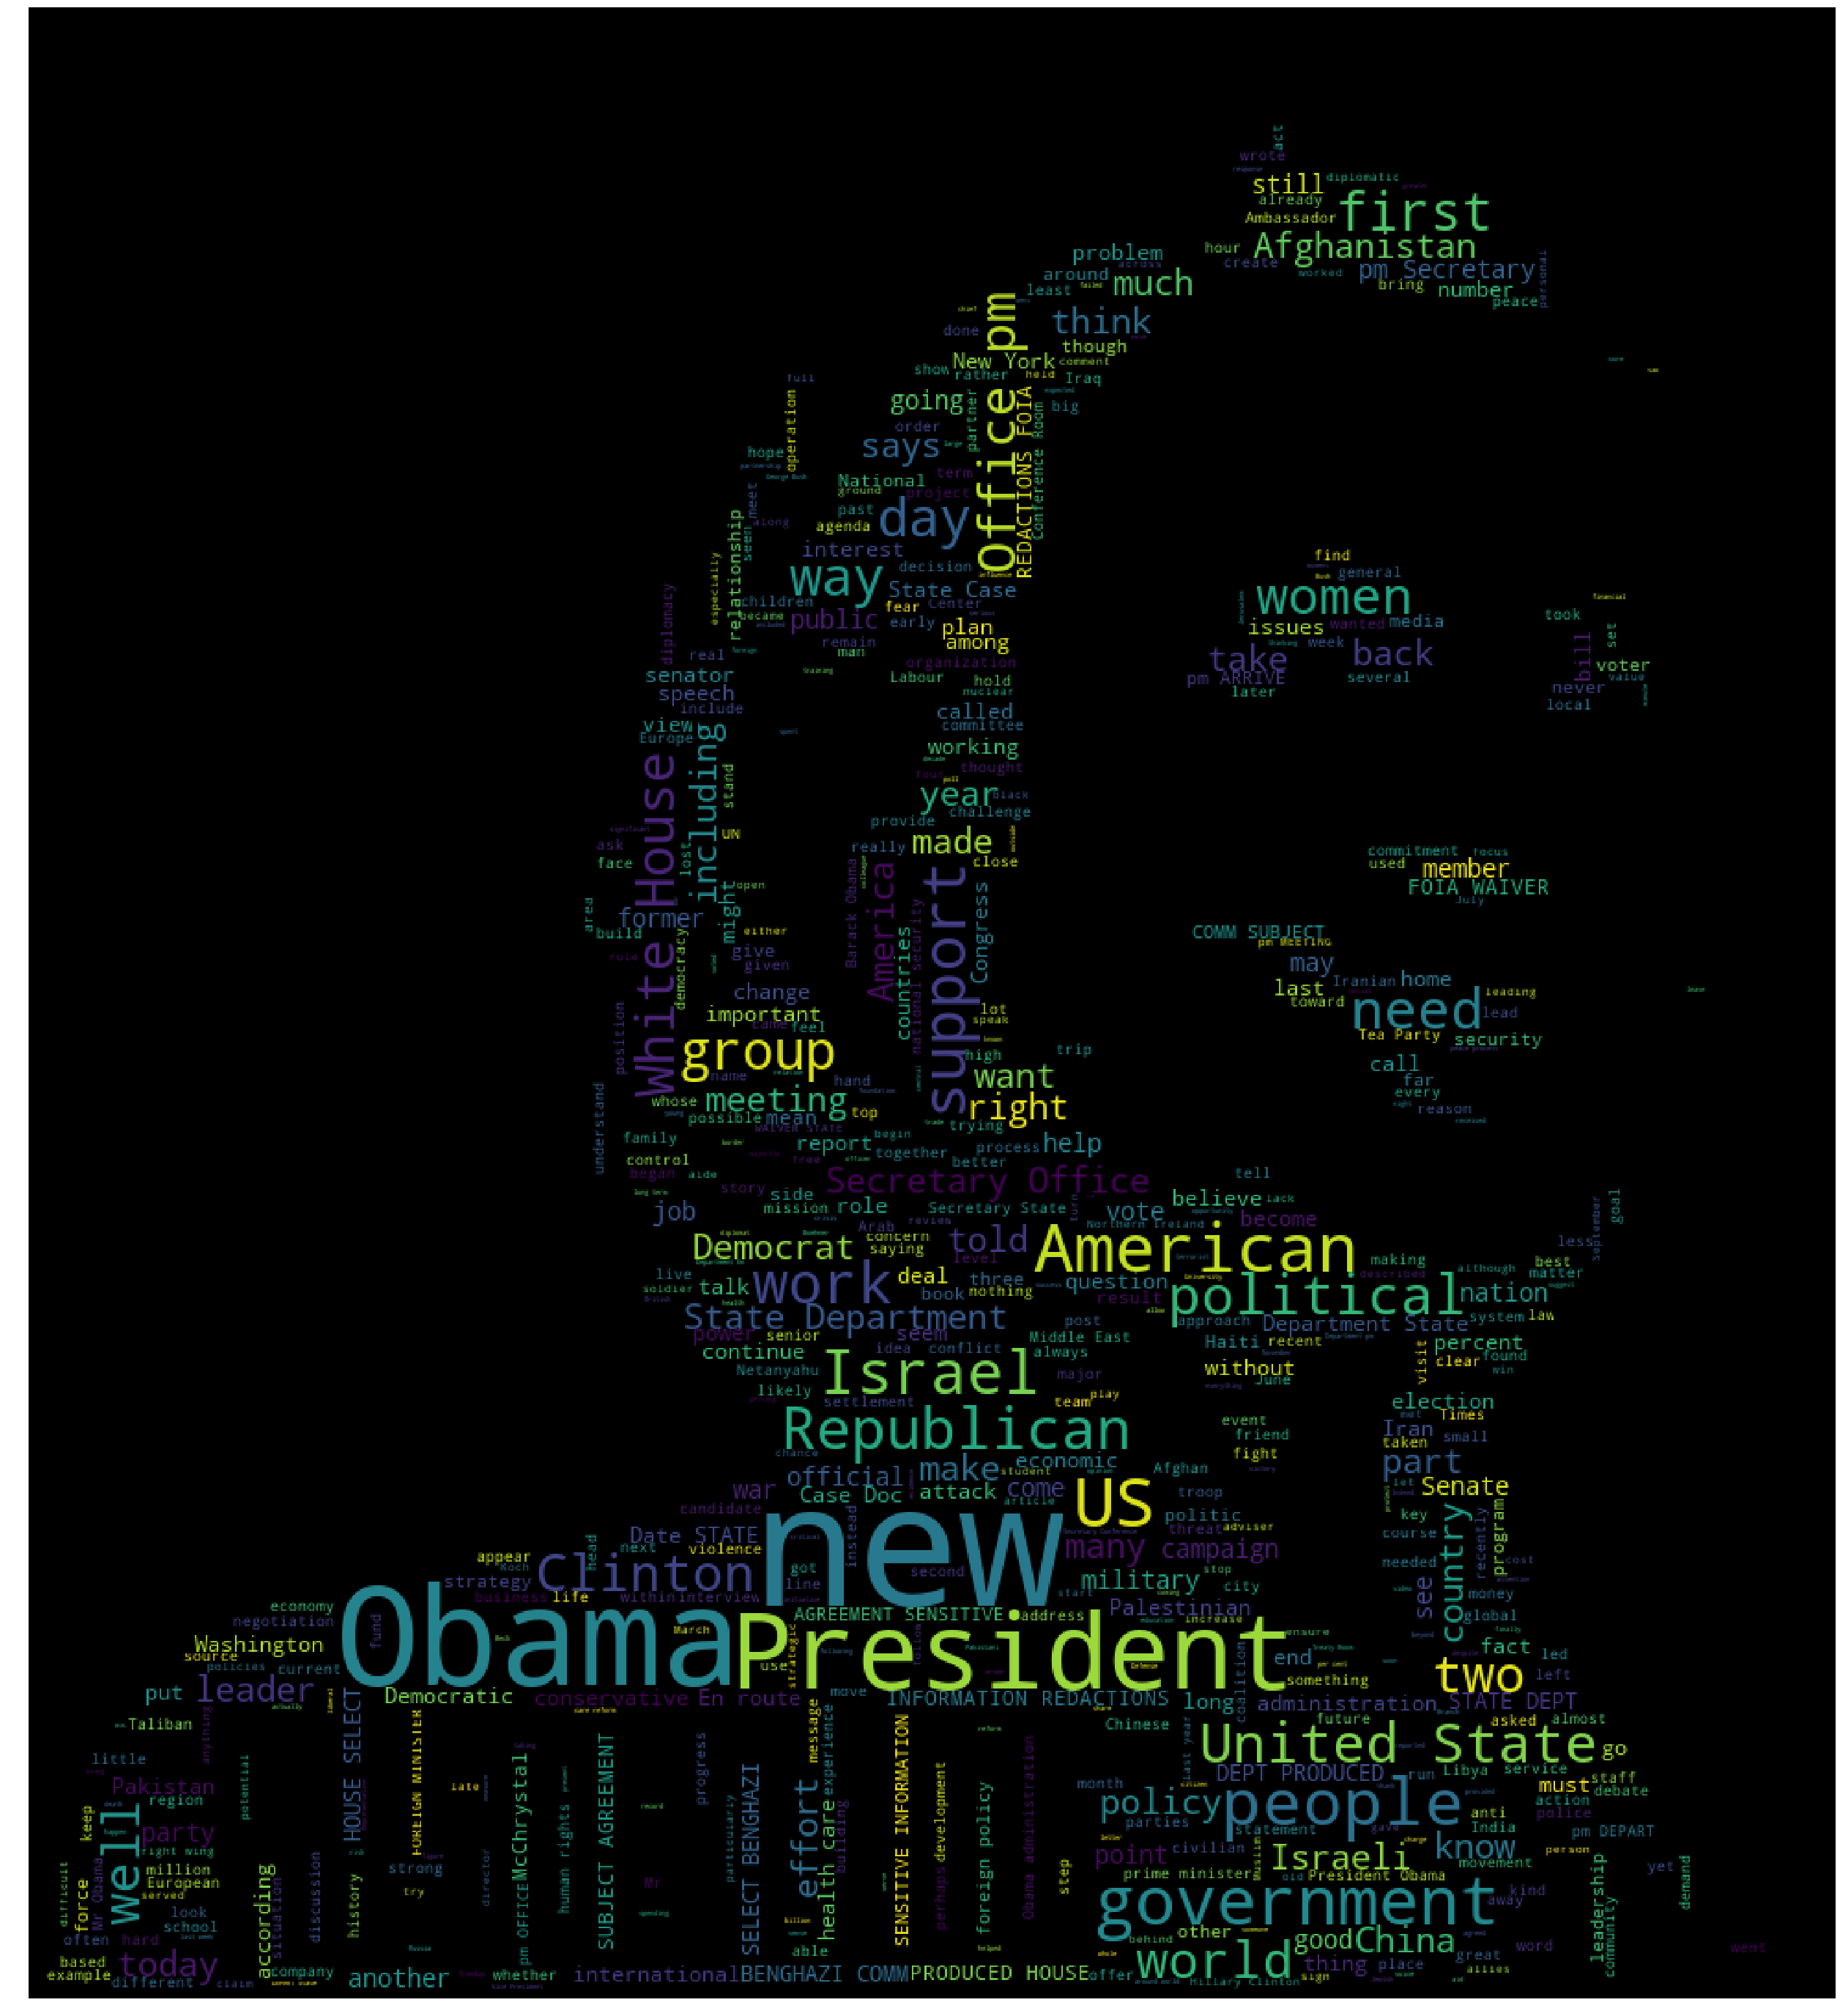

In [6]:
img = Image.open("data/hc.png")
img = img.resize((980,1080), Image.ANTIALIAS)
hcmask = np.array(img)

wc = WordCloud(background_color="Black", max_words=600, width=2000, height=800, mask=hcmask, stopwords=STOPWORDS.union(set(['will', 'say',  'even', 'issue', 'said', 'one', 'time', 'now'])))
wc.generate(cs)
wc.to_file("data/clinton_wc.png")

plt.figure(figsize=(50, 50))
plt.imshow(wc)
plt.axis("off");

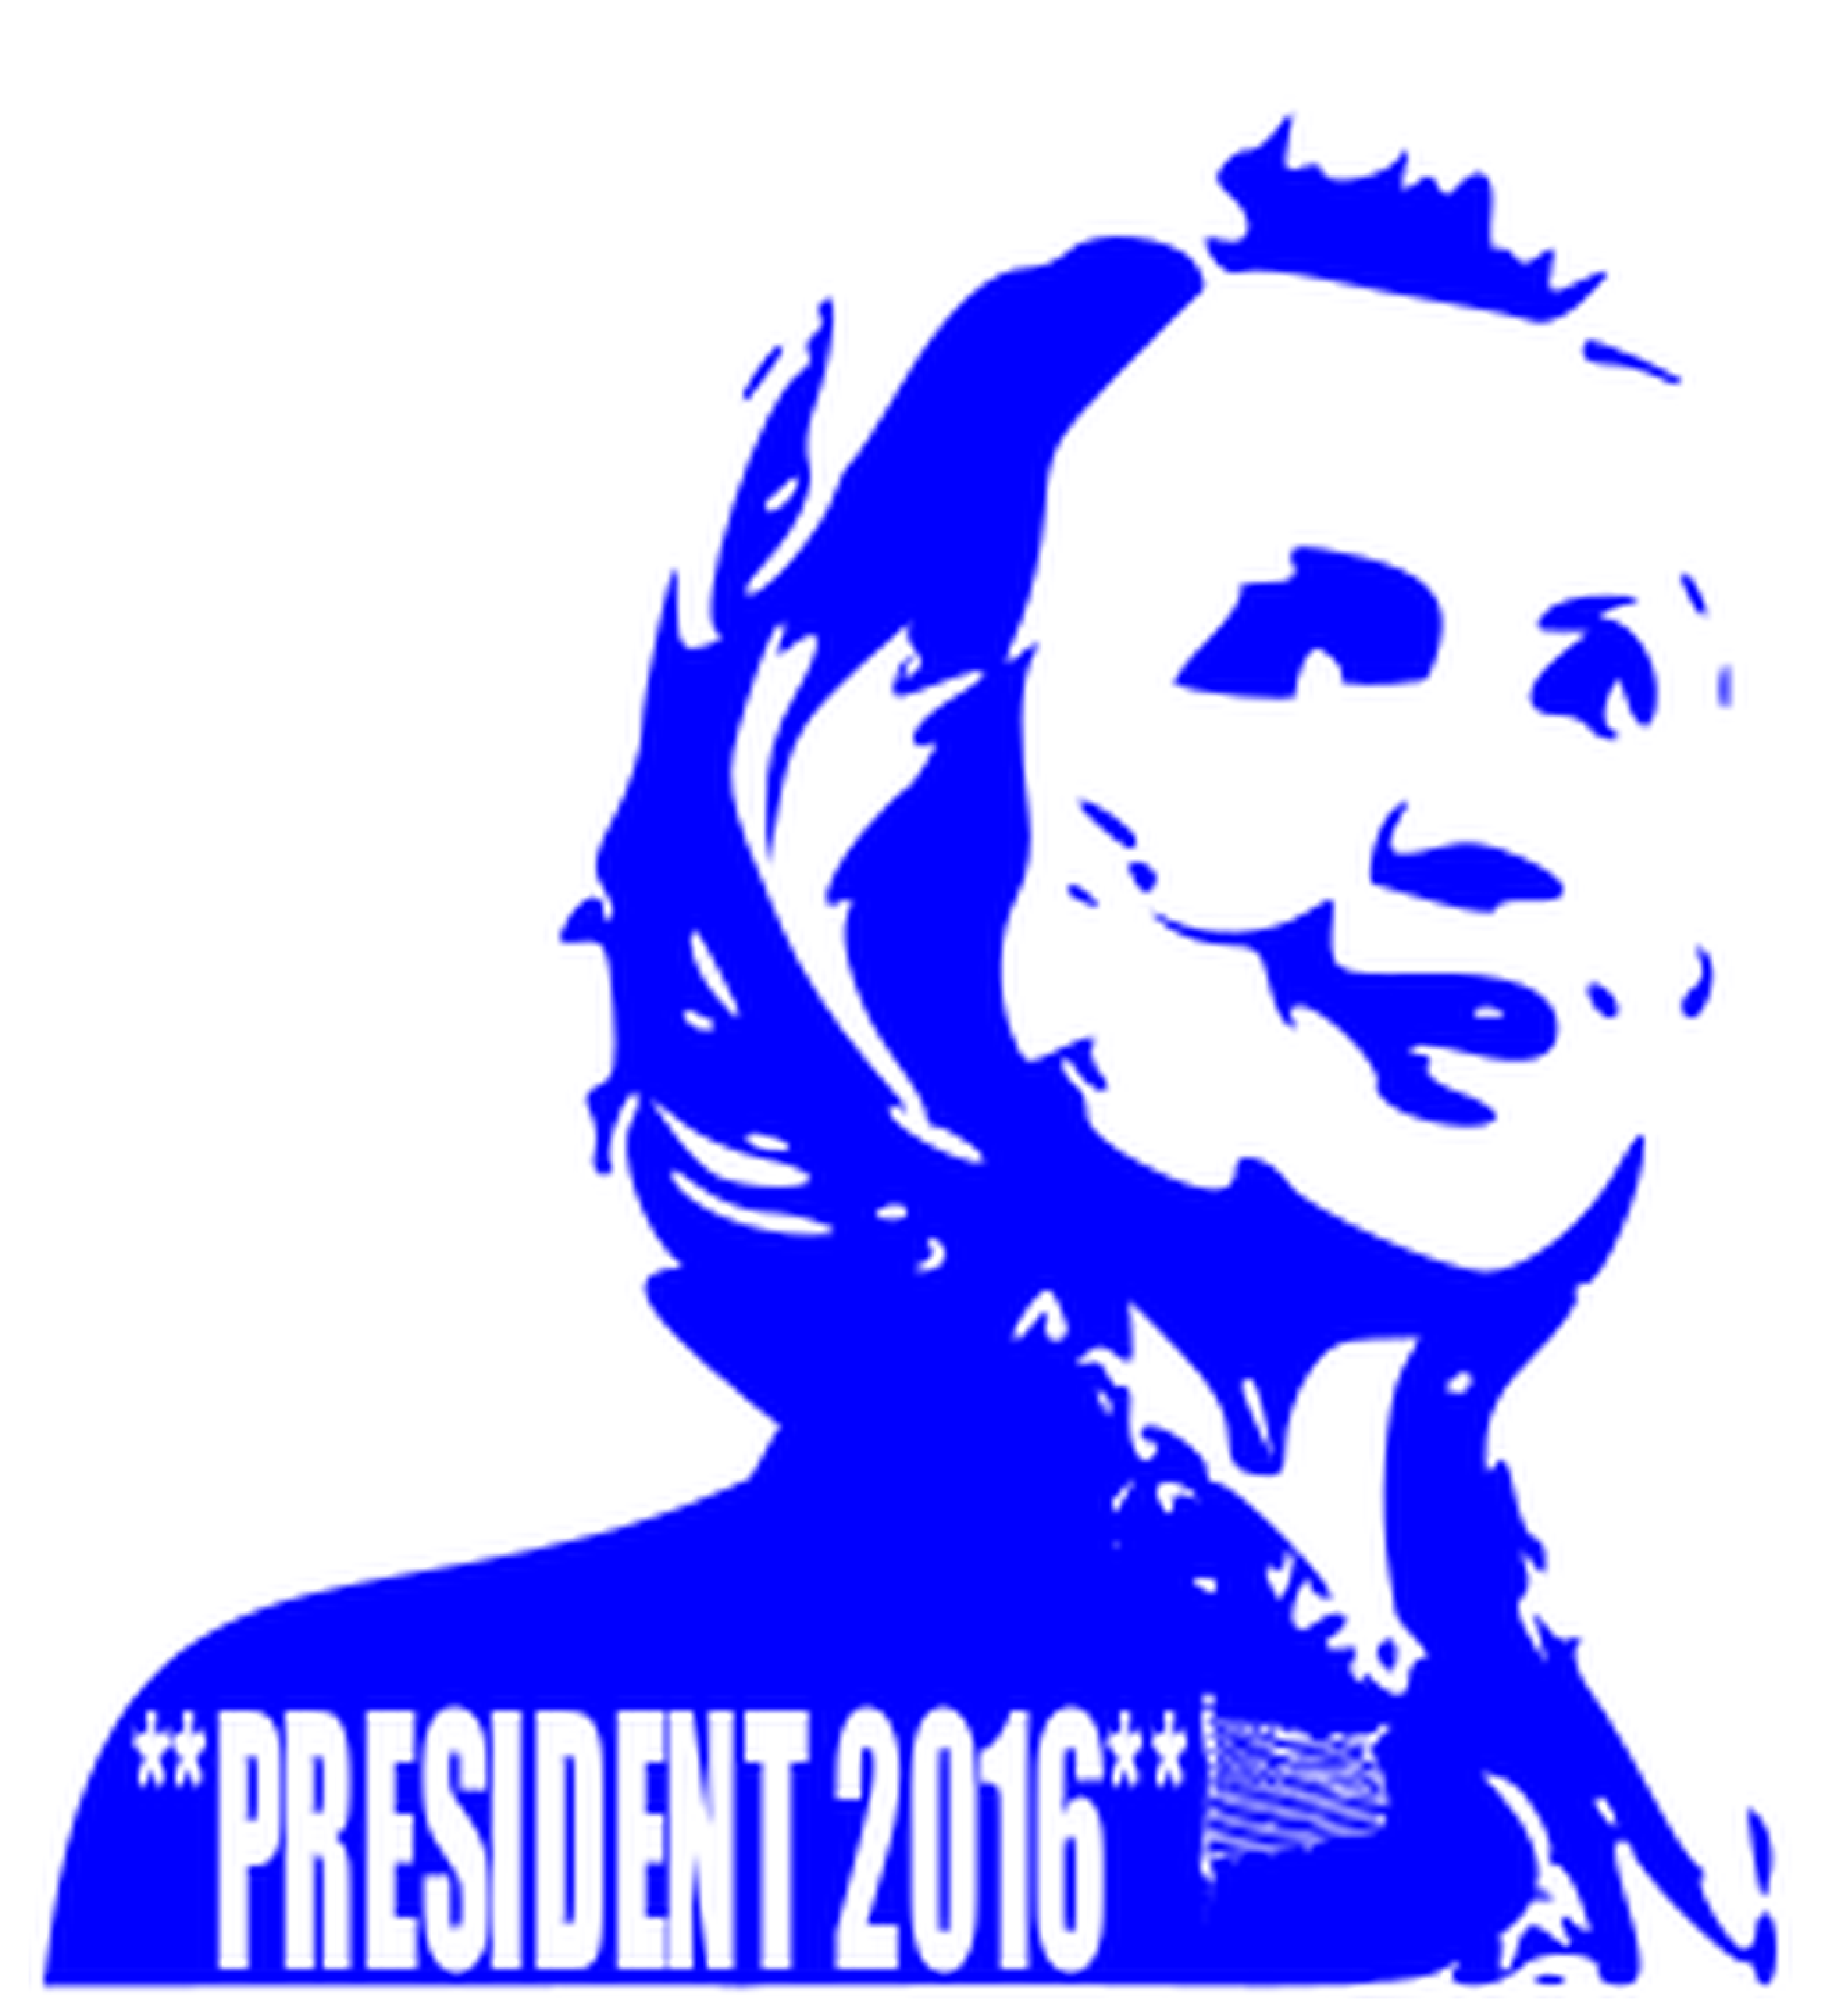

In [7]:
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis("off");
plt.imshow(hcmask);

In [8]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

countries = df['name'].apply(lambda country: country.lower().replace('.', '').replace('-', '')).tolist()
countries = {country: 0 for country in countries}
df['norm_name'] = df['name'].apply(lambda country: country.lower().replace('.', '').replace('-', '')).tolist()
df = df.sort_values('norm_name')
rawText = emails['ExtractedBodyText'].apply(lambda row: '' if type(row) == float else row.lower().replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('-', ' ')).tolist()

for message in rawText:
    for key in countries:
        if message.find(key) >= 0:
            countries[key] += 1
            
countries = sorted(list(countries.items()), key=lambda row: row[0])
df['count_messages'] = [country[1] for country in countries]

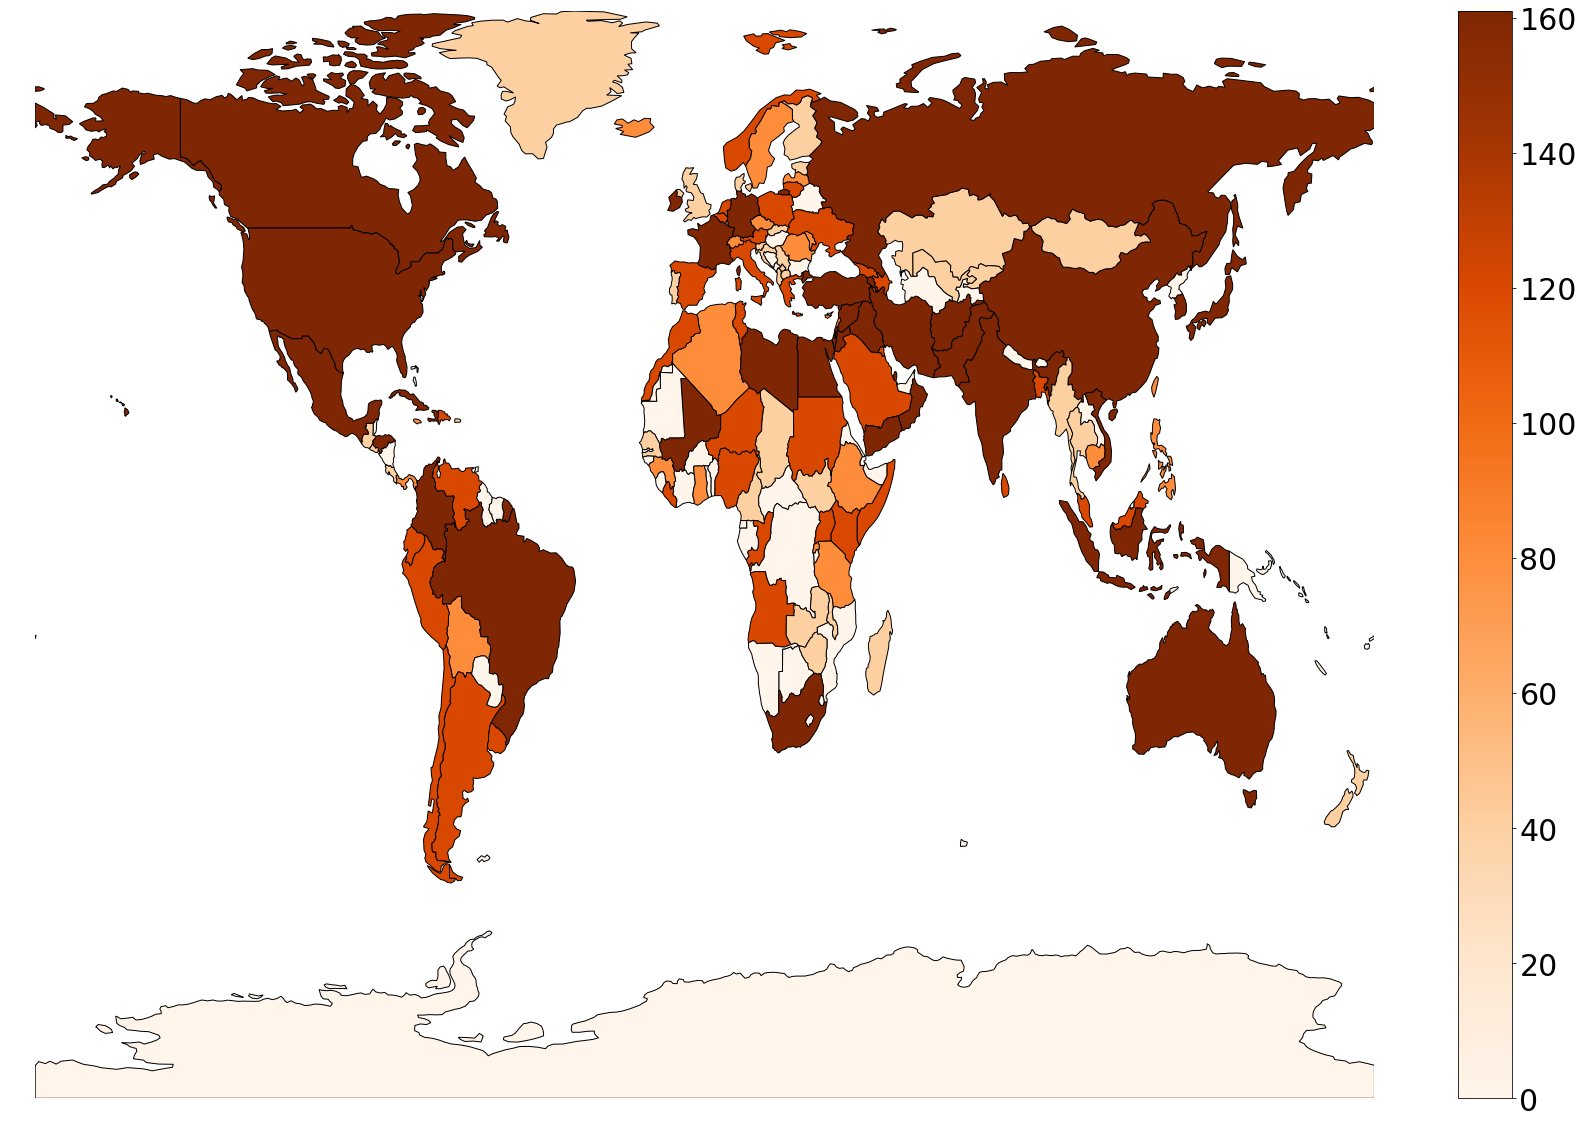

In [15]:
fig, ax = plt.subplots(1, figsize=(30, 20))

geoplot.choropleth(df, ax=ax, hue='count_messages', cmap='Oranges')
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=df['count_messages'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=30) 
plt.savefig('Country_in_messages_of_Clinton.png');

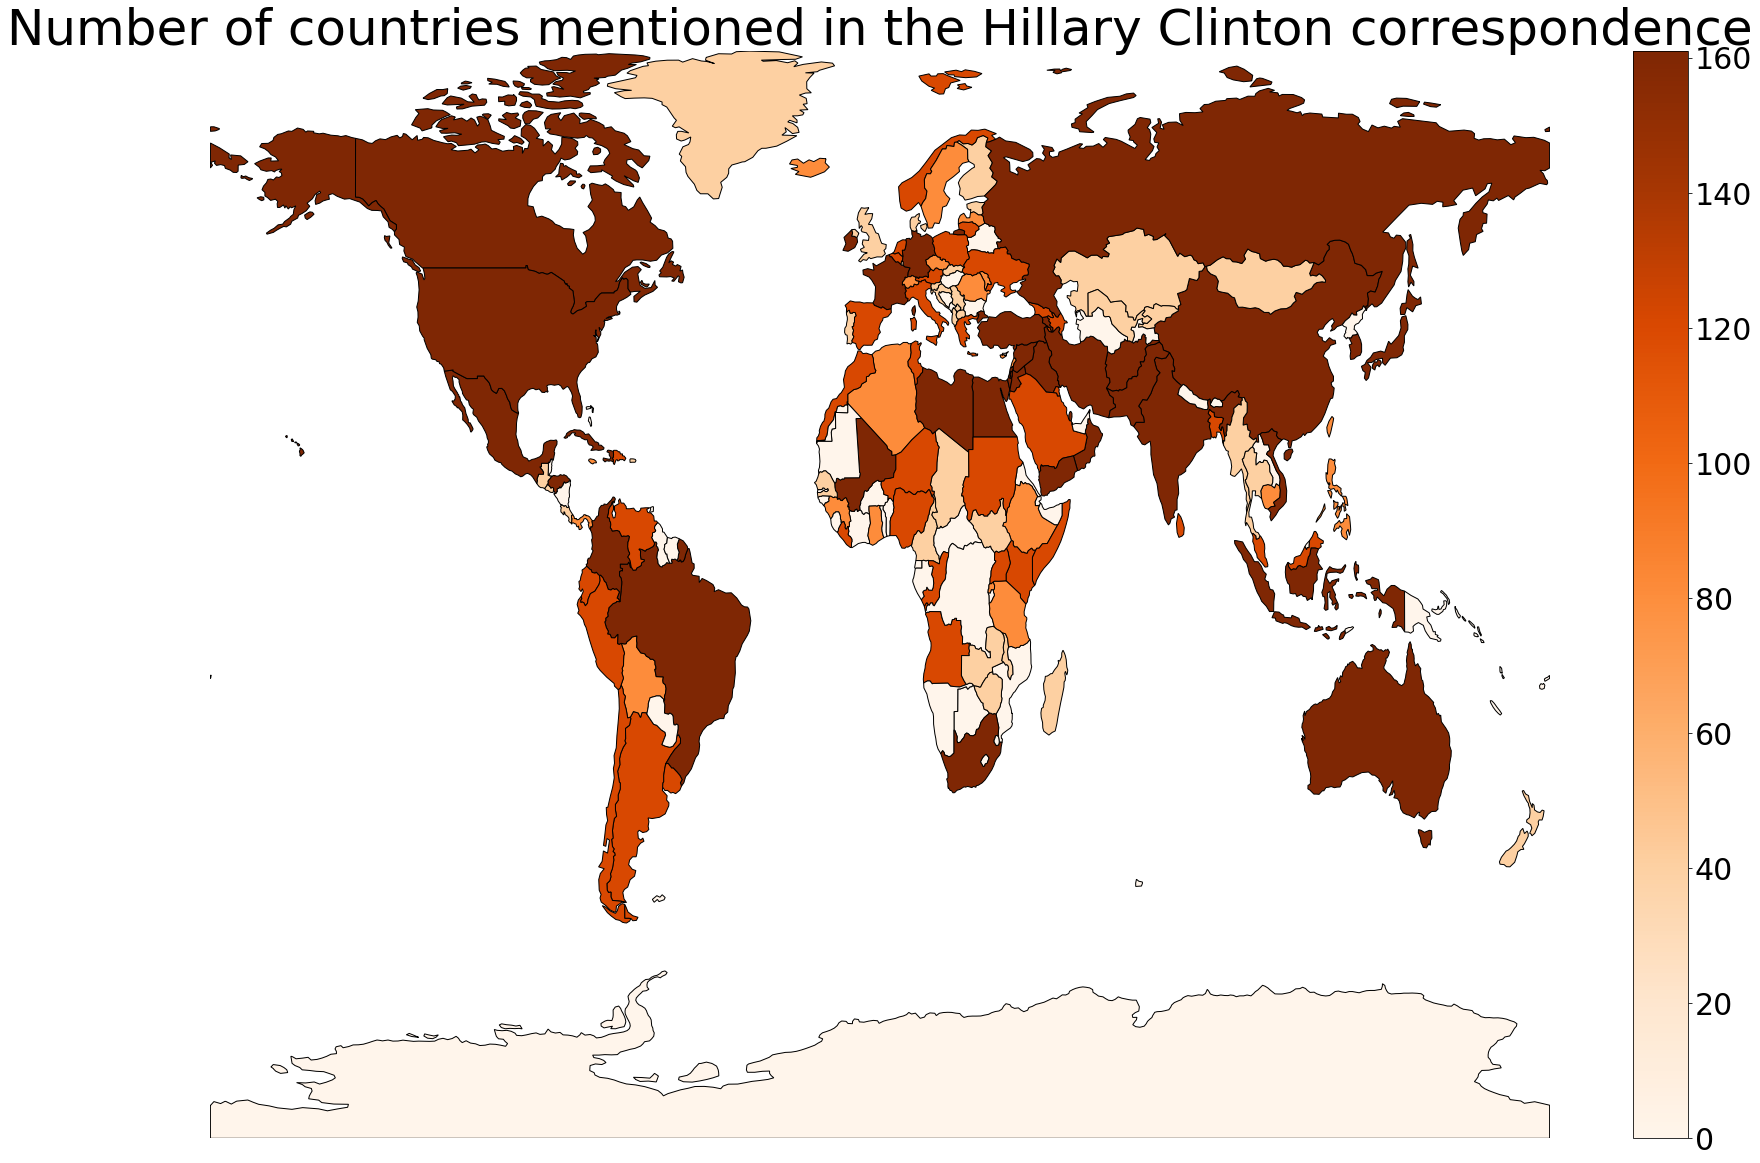

In [52]:
fig, ax = plt.subplots(1, figsize=(30, 20))

geoplot.choropleth(df, ax=ax, hue='count_messages', cmap='Oranges')
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=df['count_messages'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=30) 
plt.title('Number of countries mentioned in the Hillary Clinton correspondence', fontsize=50)
plt.savefig('data/Country_in_messages_of_Clinton_title.png');

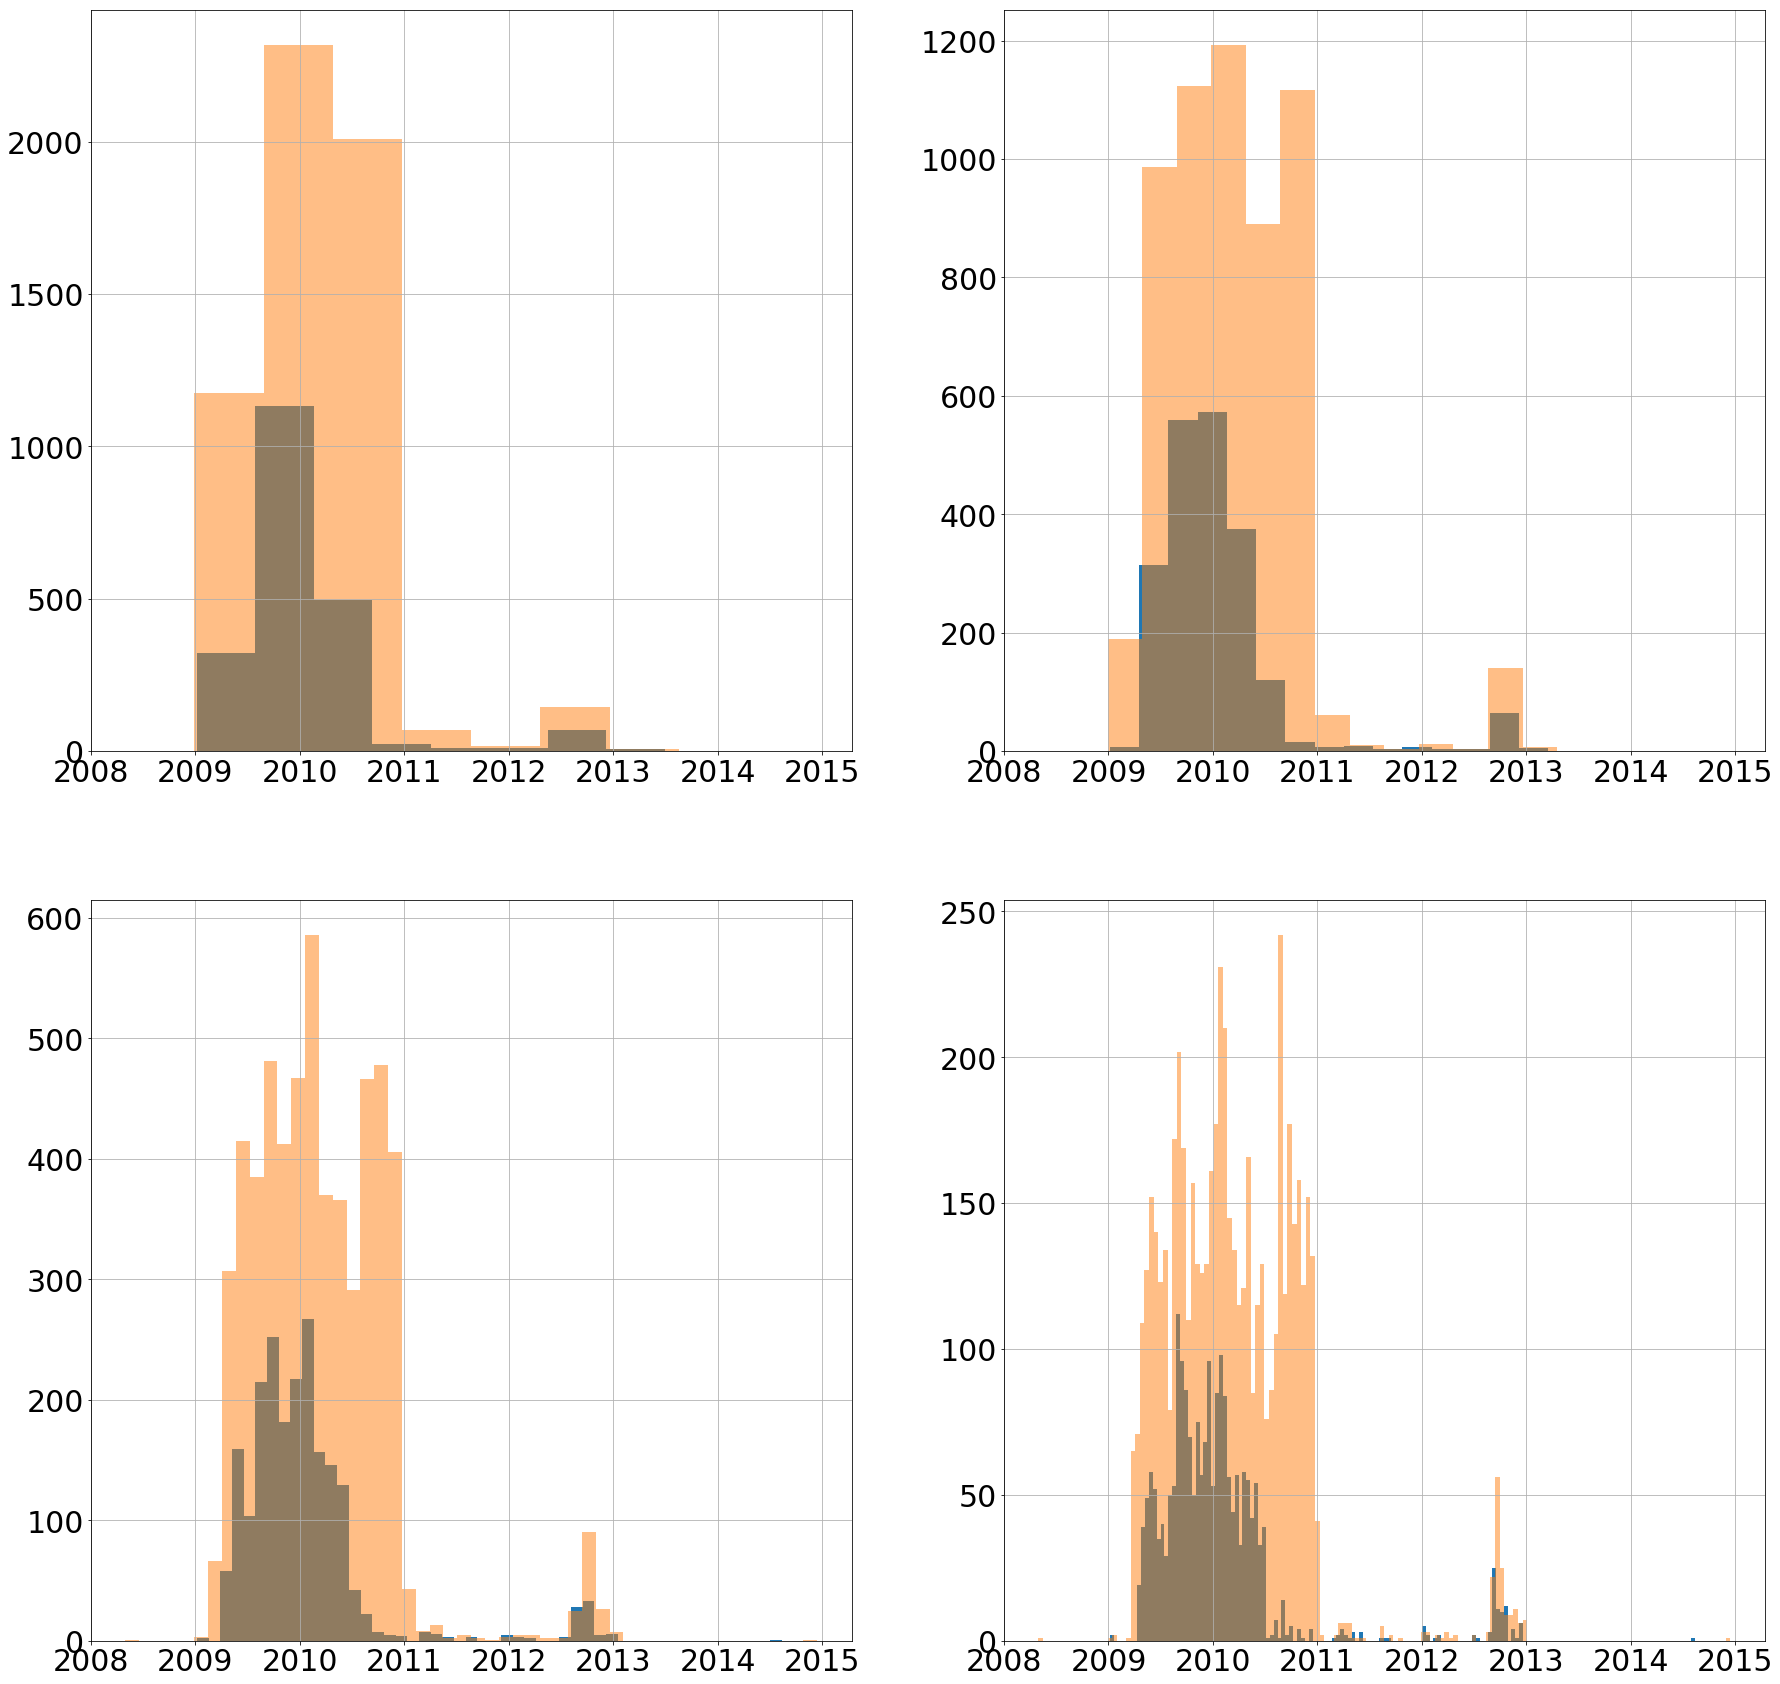

In [14]:
emails['From'] = emails['MetadataFrom'].apply(lambda row: len(str(row)) <= 3 and str(row).lower() != 'sid')
emails['To'] = emails['MetadataFrom'].apply(lambda row: len(str(row)) > 3 or str(row).lower() == 'sid')

fontsize = 30
plt.figure(figsize=(fontsize, fontsize))
plt.subplot(221)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=10)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=10, alpha=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplot(222)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=20)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=20, alpha=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplot(223)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=50)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=50, alpha=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplot(224)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=150)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=150, alpha=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);
plt.savefig('data/from_to_messages_of_Clinton.png');

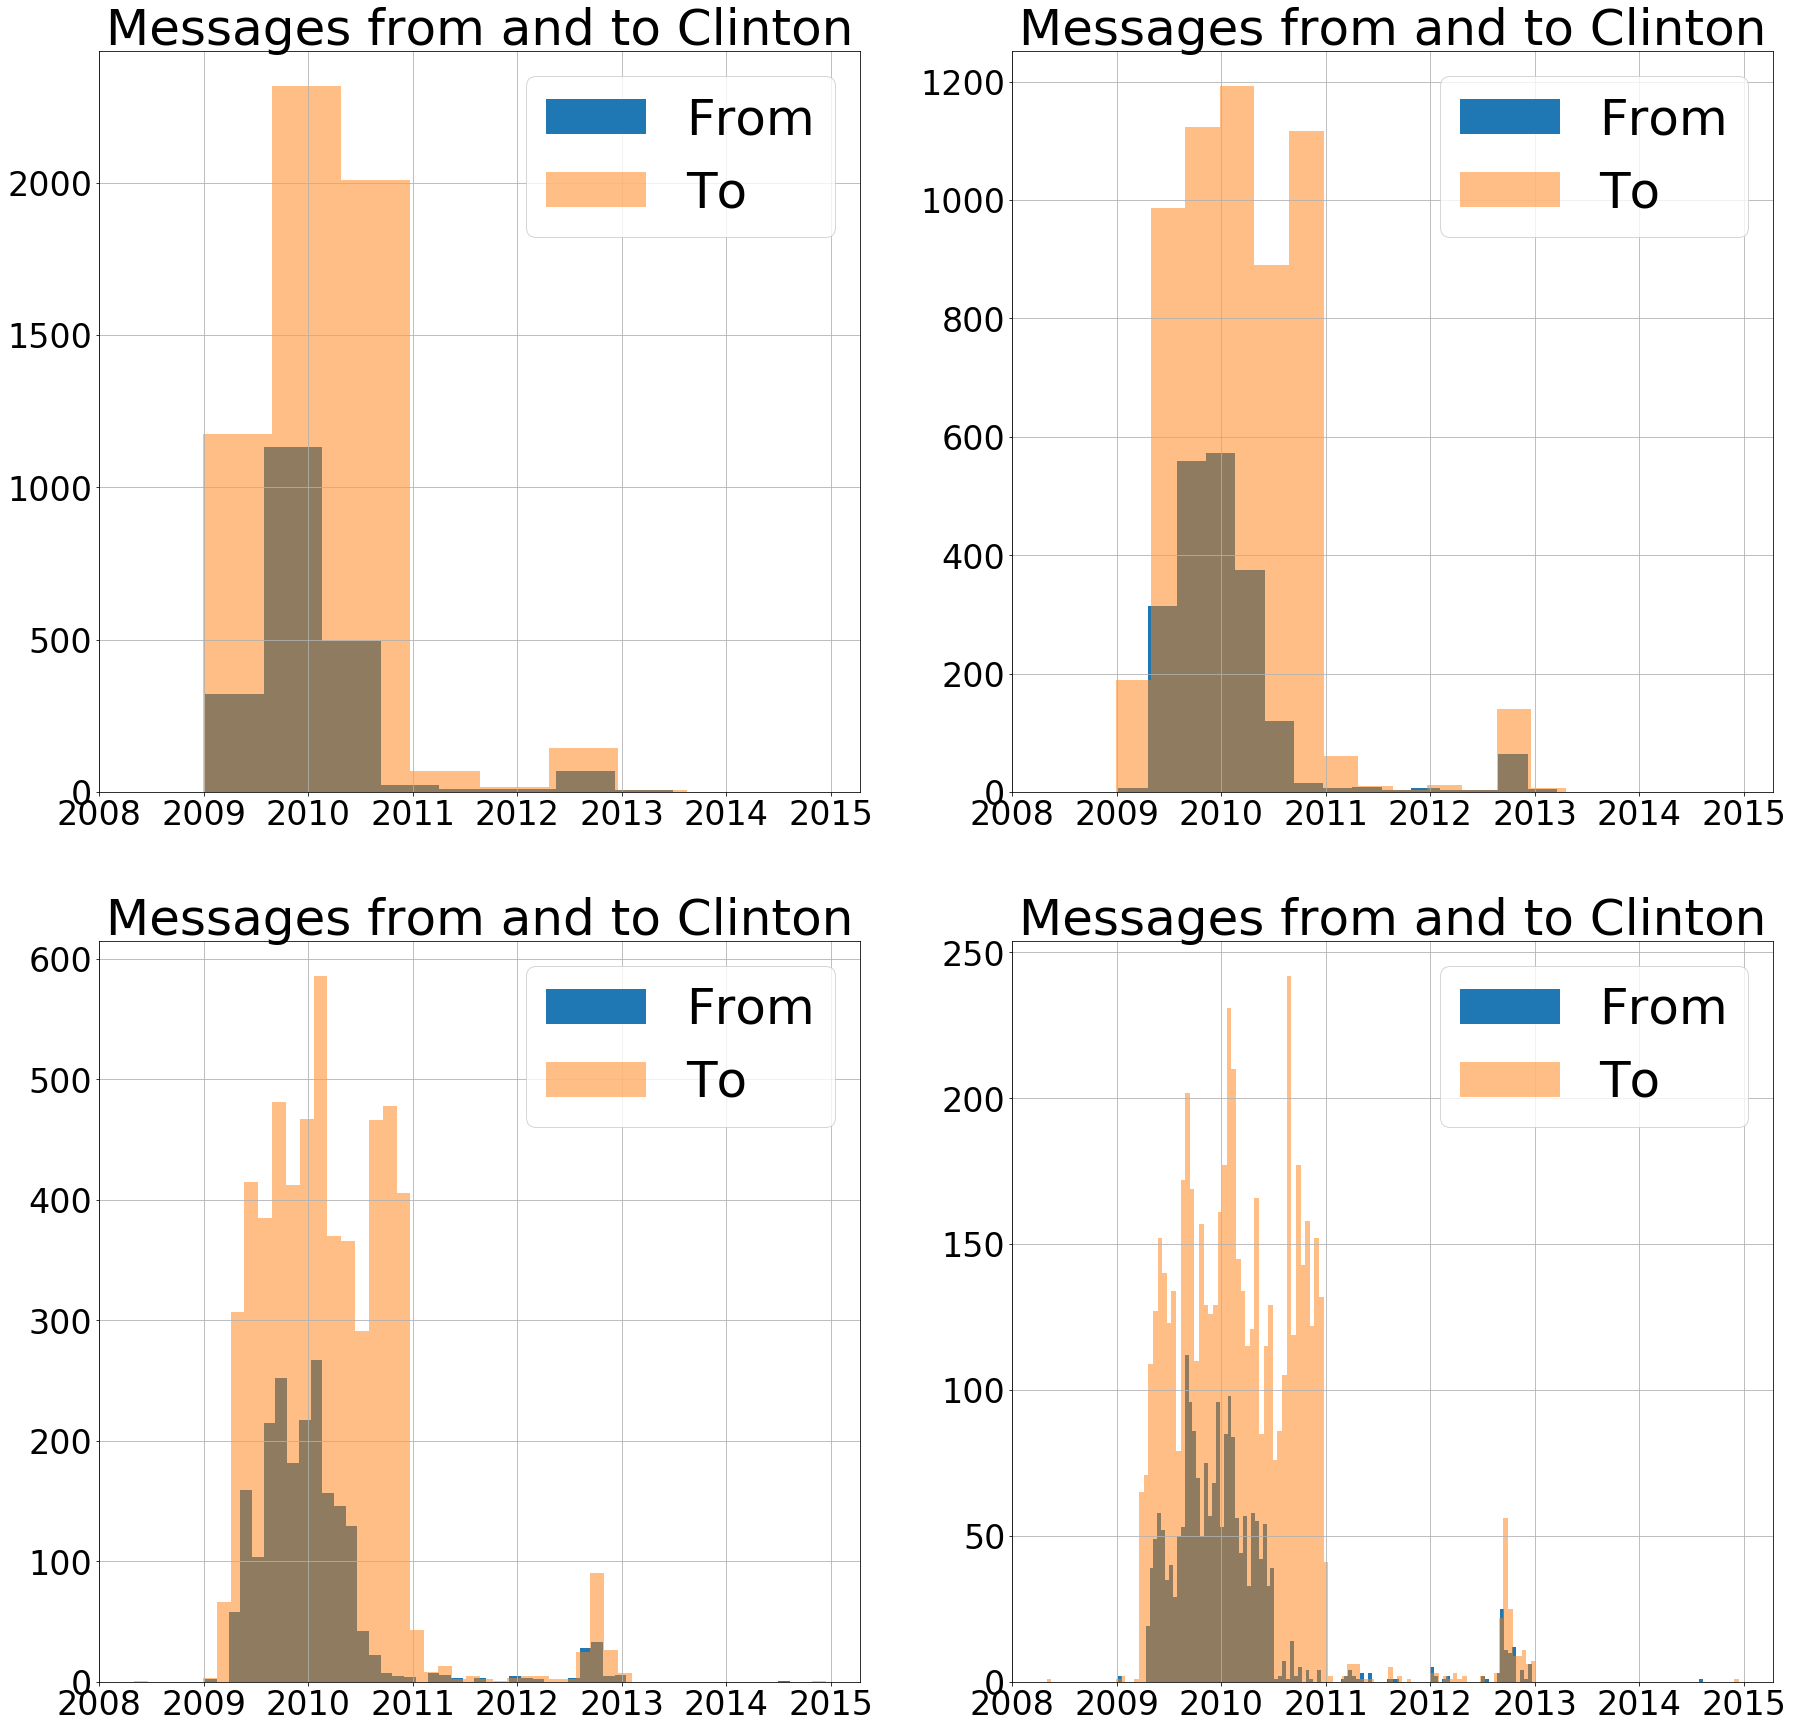

In [62]:
fontsize = 50
plt.figure(figsize=(30, 30))
plt.subplot(221)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=10)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=10, alpha=0.5)
plt.xticks(fontsize=fontsize / 1.5)
plt.yticks(fontsize=fontsize / 1.5)
plt.legend(['From', 'To'], fontsize=fontsize);
plt.title('Messages from and to Clinton', fontsize=fontsize)
plt.subplot(222)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=20)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=20, alpha=0.5)
plt.xticks(fontsize=fontsize / 1.5)
plt.yticks(fontsize=fontsize / 1.5)
plt.legend(['From', 'To'], fontsize=fontsize);
plt.title('Messages from and to Clinton', fontsize=fontsize)
plt.subplot(223)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=50)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=50, alpha=0.5)
plt.xticks(fontsize=fontsize / 1.5)
plt.yticks(fontsize=fontsize / 1.5)
plt.legend(['From', 'To'], fontsize=fontsize);
plt.title('Messages from and to Clinton', fontsize=fontsize)
plt.subplot(224)
emails['MetadataDateSent'][emails['From']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=150)
emails['MetadataDateSent'][emails['To']].apply(lambda row: '' if type(row) != str else datetime.strptime(str(row)[:10], '%Y-%m-%d')).hist(bins=150, alpha=0.5)
plt.xticks(fontsize=fontsize / 1.5)
plt.yticks(fontsize=fontsize / 1.5)
plt.title('Messages from and to Clinton', fontsize=fontsize)
plt.legend(['From', 'To'], fontsize=fontsize);
plt.savefig('data/from_to_messages_of_Clinton_title.png');

In [16]:
aliaces = pd.read_csv('data/hillary-clinton-emails/Aliases.csv')

In [17]:
with open("data/hillary-clinton-emails/Aliases.csv") as f:
    file = f.readlines()[1:] #skip the header line
    aliases = {}
    for line in file:
        line = line.split(",")
        aliases[line[1]] = line[2].replace('\n', '')

In [18]:
with open("data/hillary-clinton-emails/Persons.csv") as f:
    file = f.readlines()[1:]
    persons = {}
    for line in file:
        line = line.split(",")
        persons[line[0]] = line[1].replace('\n', '')

In [20]:
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sid = SentimentIntensityAnalyzer()
emails["Sentiment"] = emails["ExtractedBodyText"].apply(lambda row: sid.polarity_scores(row)['compound'] if type(row) == str else 0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hedgehogues/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
emails["Weekday"] = emails["MetadataDateSent"].apply(lambda row: -1 if type(row) != str else datetime.strptime(row[:10], "%Y-%m-%d").weekday())
seintement_emails = emails[["Sentiment", "Weekday"]]
seintement_emails = seintement_emails[seintement_emails["Weekday"] != -1]

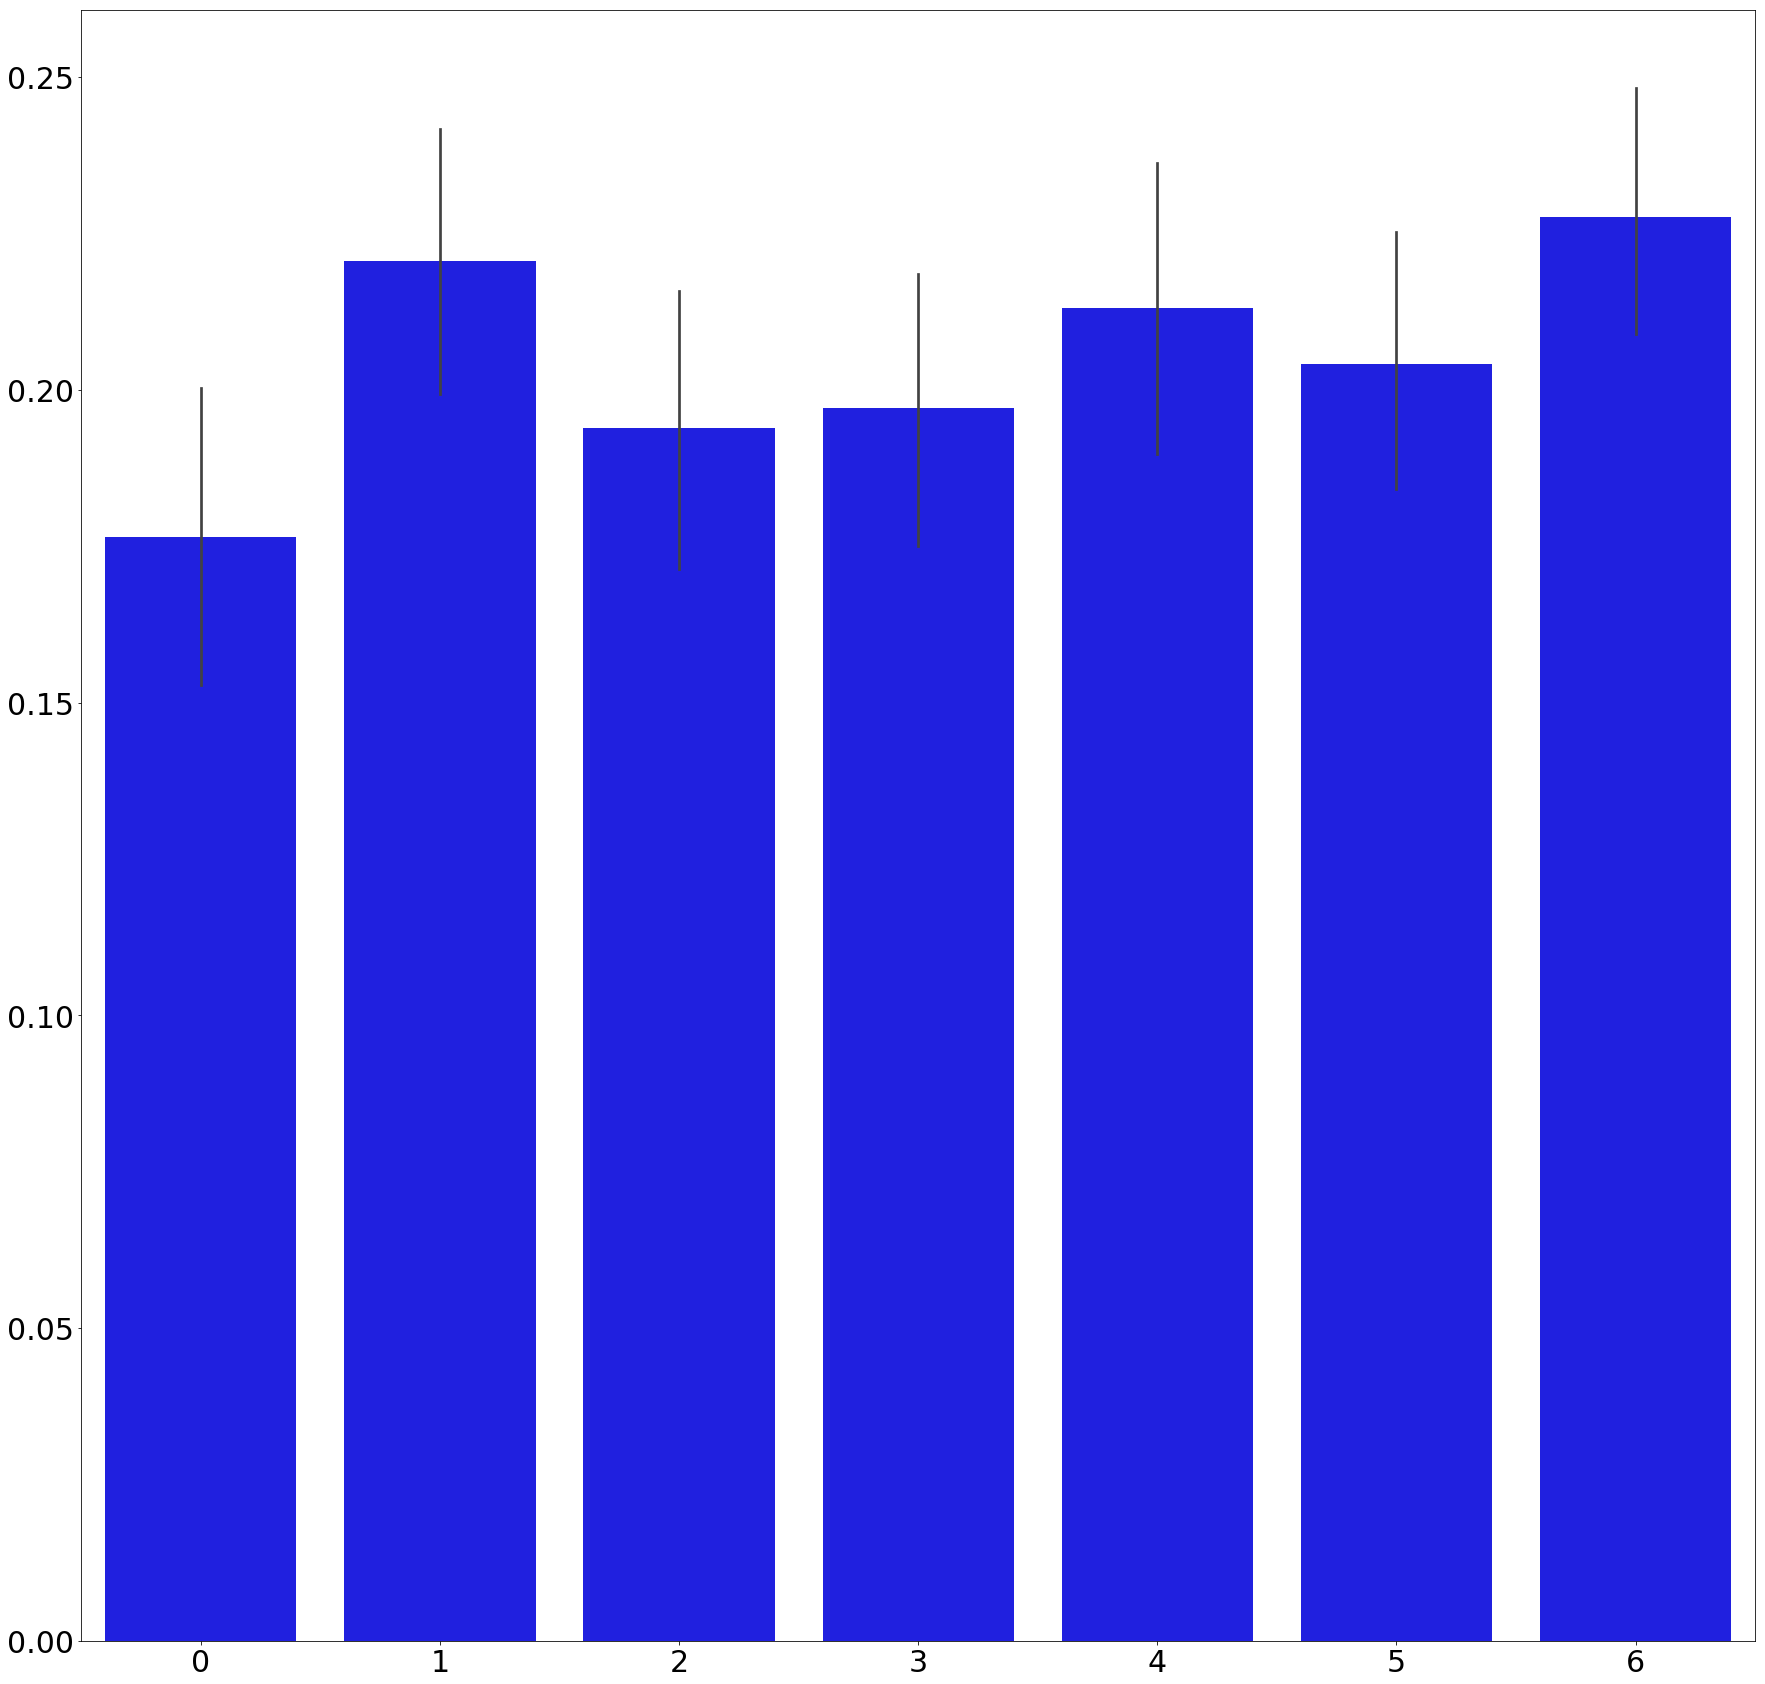

In [24]:
fontsize=30
plt.figure(figsize=(30, 30))
sns.barplot(x="Weekday", y="Sentiment", estimator=np.mean, data=seintement_emails, color="Blue")
plt.xticks(np.arange(7), fontsize=fontsize)
plt.xlabel("", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("")
plt.savefig('data/emotions_of_weekdays_of_Clinton.png');

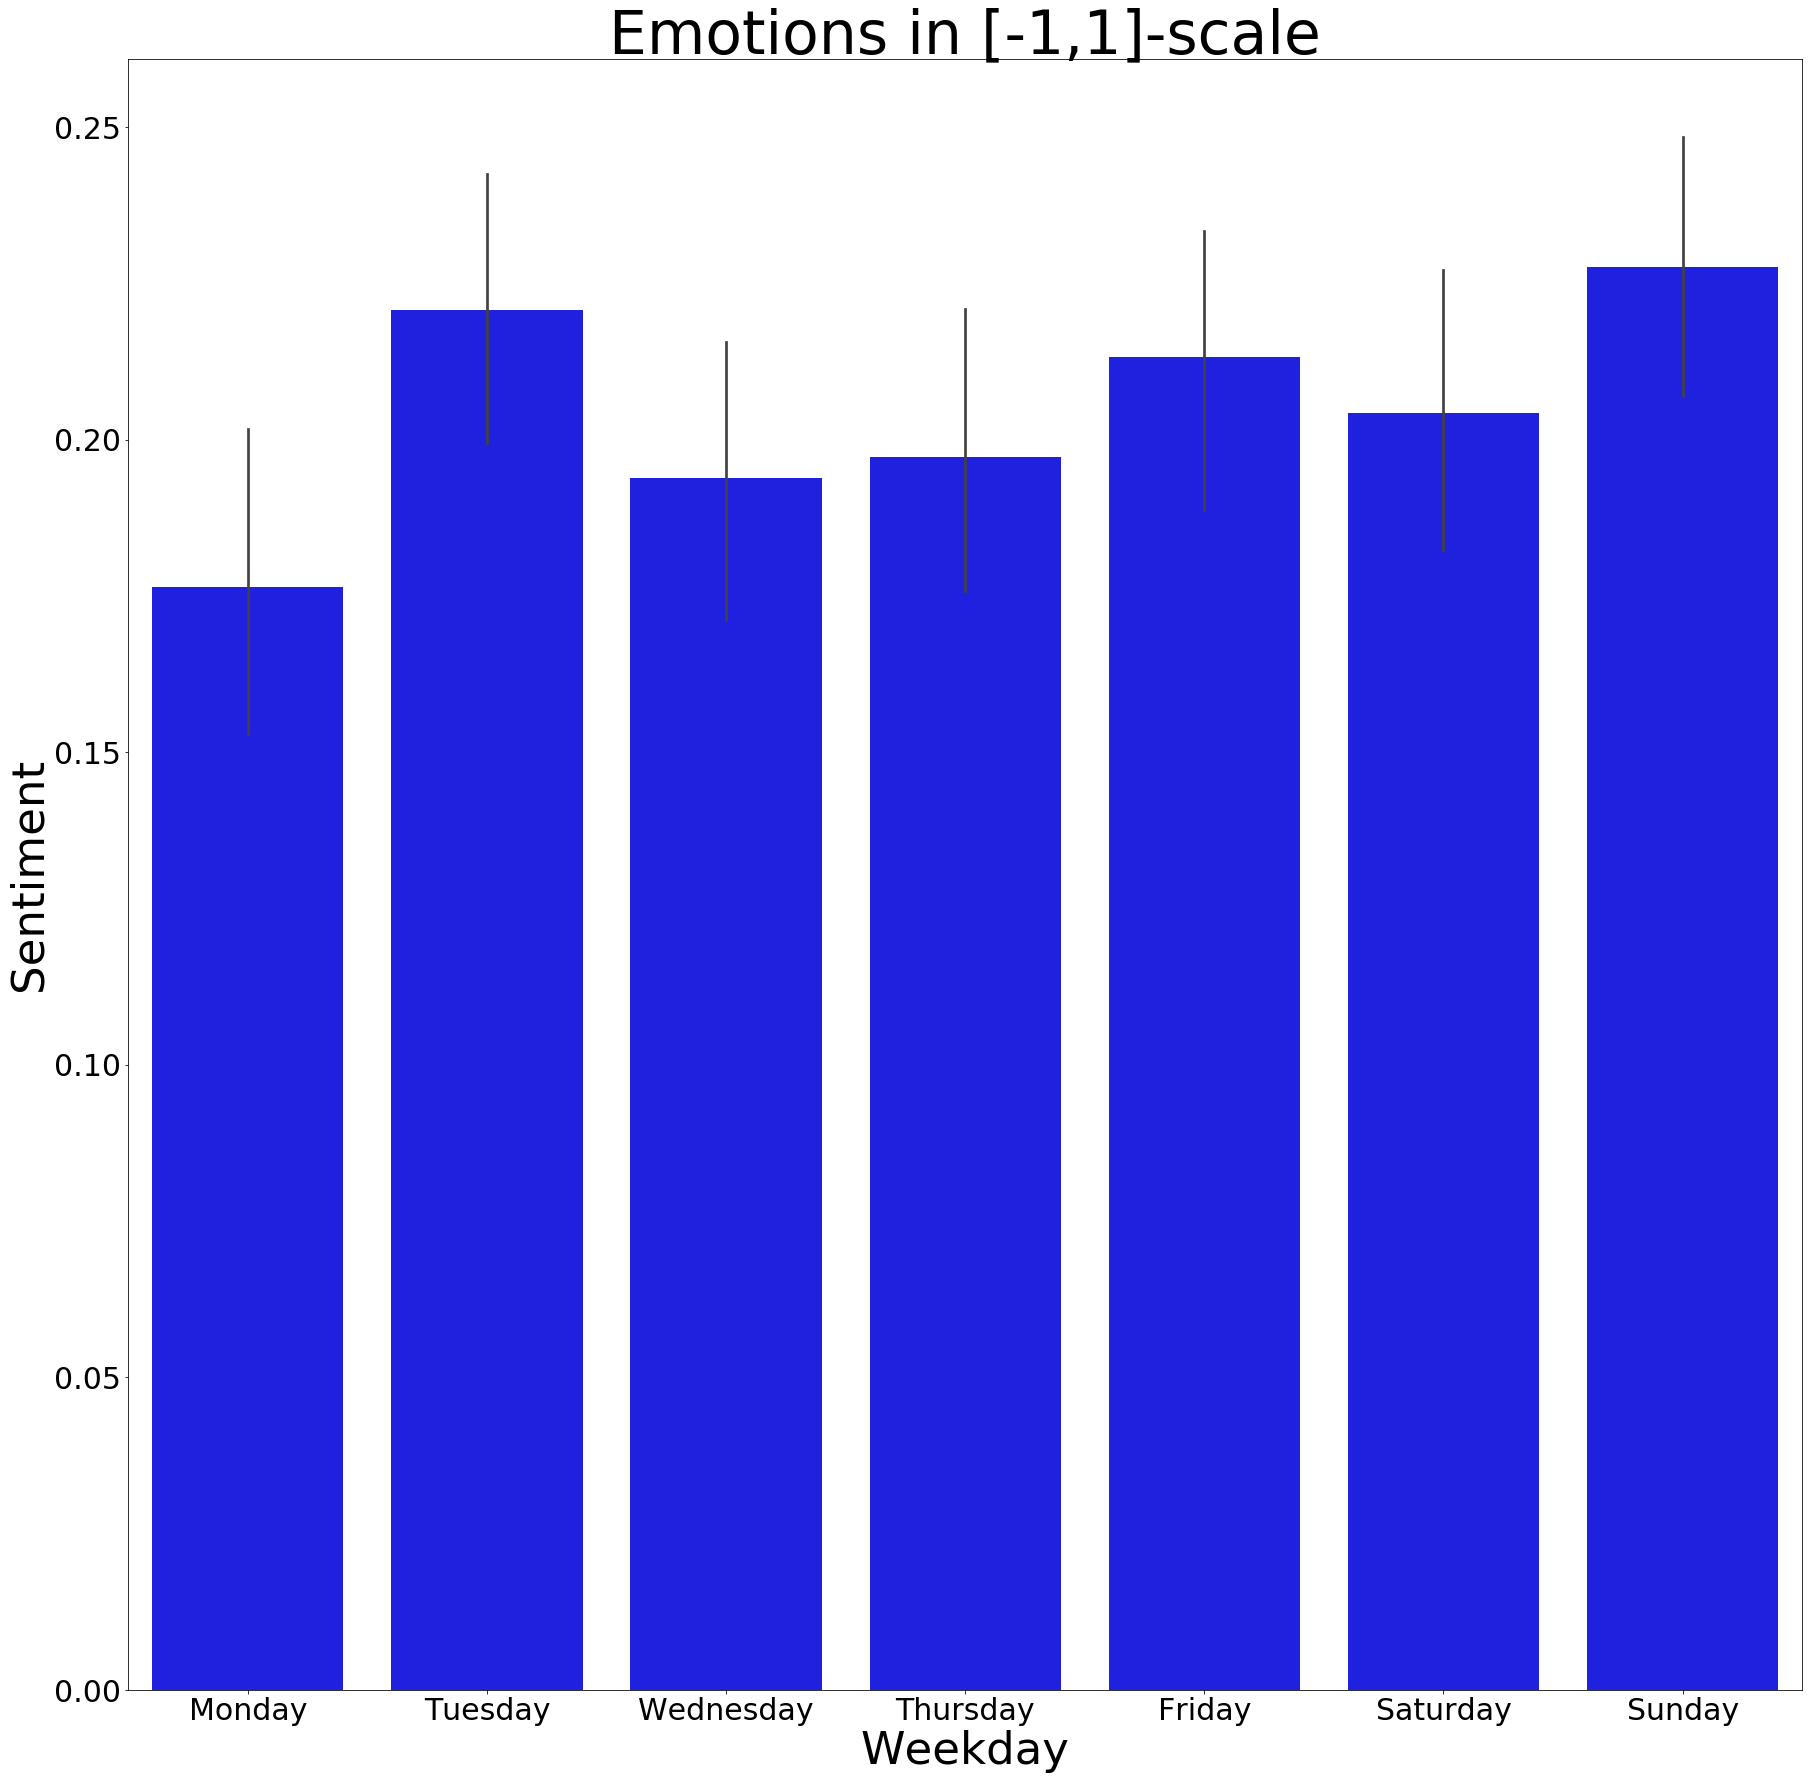

In [29]:
fontsize=30
plt.figure(figsize=(fontsize, fontsize))
sns.barplot(x="Weekday", y="Sentiment", estimator=np.mean, data=seintement_emails, color="Blue")
plt.title("Emotions in [-1,1]-scale", fontsize=fontsize * 2)
plt.xticks(np.arange(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=fontsize)
plt.xlabel("Weekday", fontsize=fontsize * 1.5)
plt.yticks(fontsize=fontsize)
plt.ylabel("Sentiment", fontsize=fontsize * 1.5);
plt.savefig('data/emotions_of_weekdays_of_Clinton_title.png');

In [56]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "data/countries.geojson"
)

countries = df['name'].apply(lambda country: country.lower().replace('.', '').replace('-', '')).tolist()
countries_sentiment = {country: 0 for country in countries}
countries_count = {country: 0 for country in countries}
df['norm_name'] = df['name'].apply(lambda country: country.lower().replace('.', '').replace('-', '')).tolist()
df = df.sort_values('norm_name')
rawText = emails['ExtractedBodyText'].apply(lambda row: '' if type(row) == float else row.lower().replace('\n', ' ').replace('.', ' ').replace(',', ' ').replace('-', ' ')).tolist()

for message, sentiment in zip(rawText, seintement_emails["Sentiment"]):
    for key in countries:
        if message.find(key) >= 0:
            countries_sentiment[key] += sentiment
            countries_count[key] += 1
            
df['Sentiment'] = [item[1] for item in sorted(list({country: countries_sentiment[country] / (countries_count[country] + 1) for country in countries_sentiment}.items()), key=lambda item: item[0])]

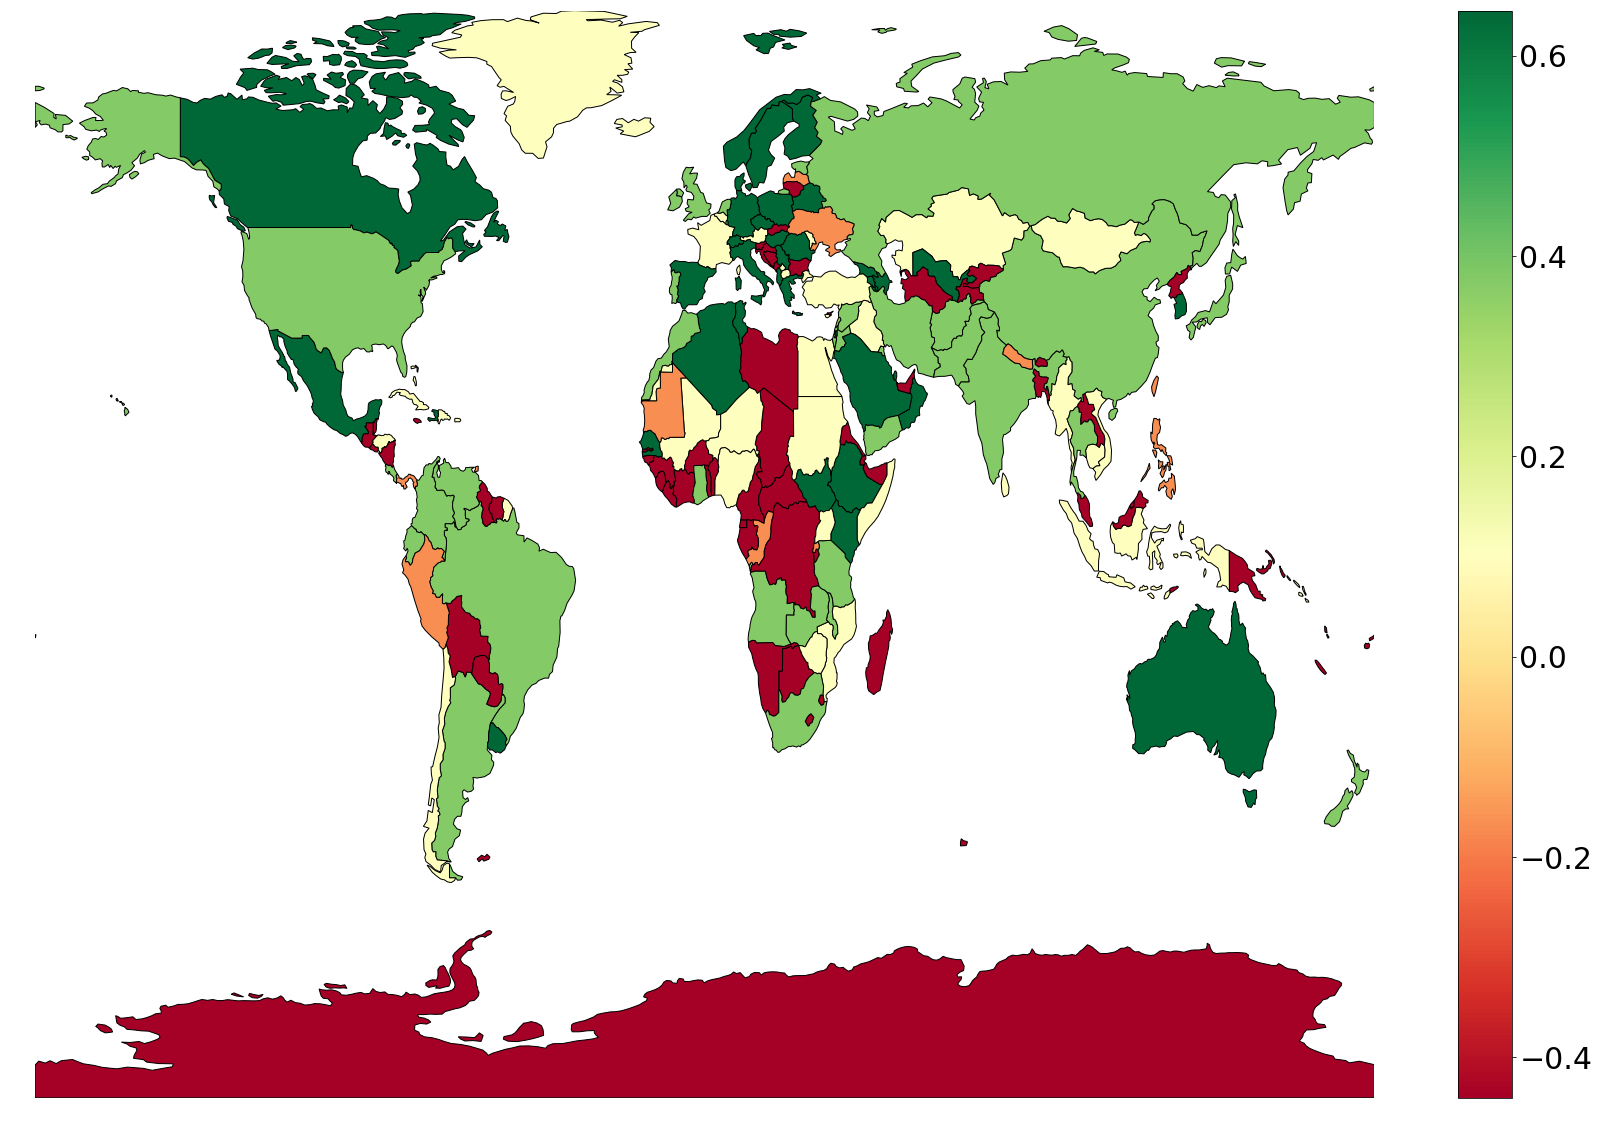

In [57]:
fig, ax = plt.subplots(1, figsize=(30, 20))

geoplot.choropleth(df, ax=ax, hue='Sentiment', cmap='RdYlGn')
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=df['Sentiment'].min(), vmax=df['Sentiment'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=30) 
plt.title('', fontsize=30);
plt.savefig('data/Emotions_of_country_in_dialogues_of_Clinton.png');

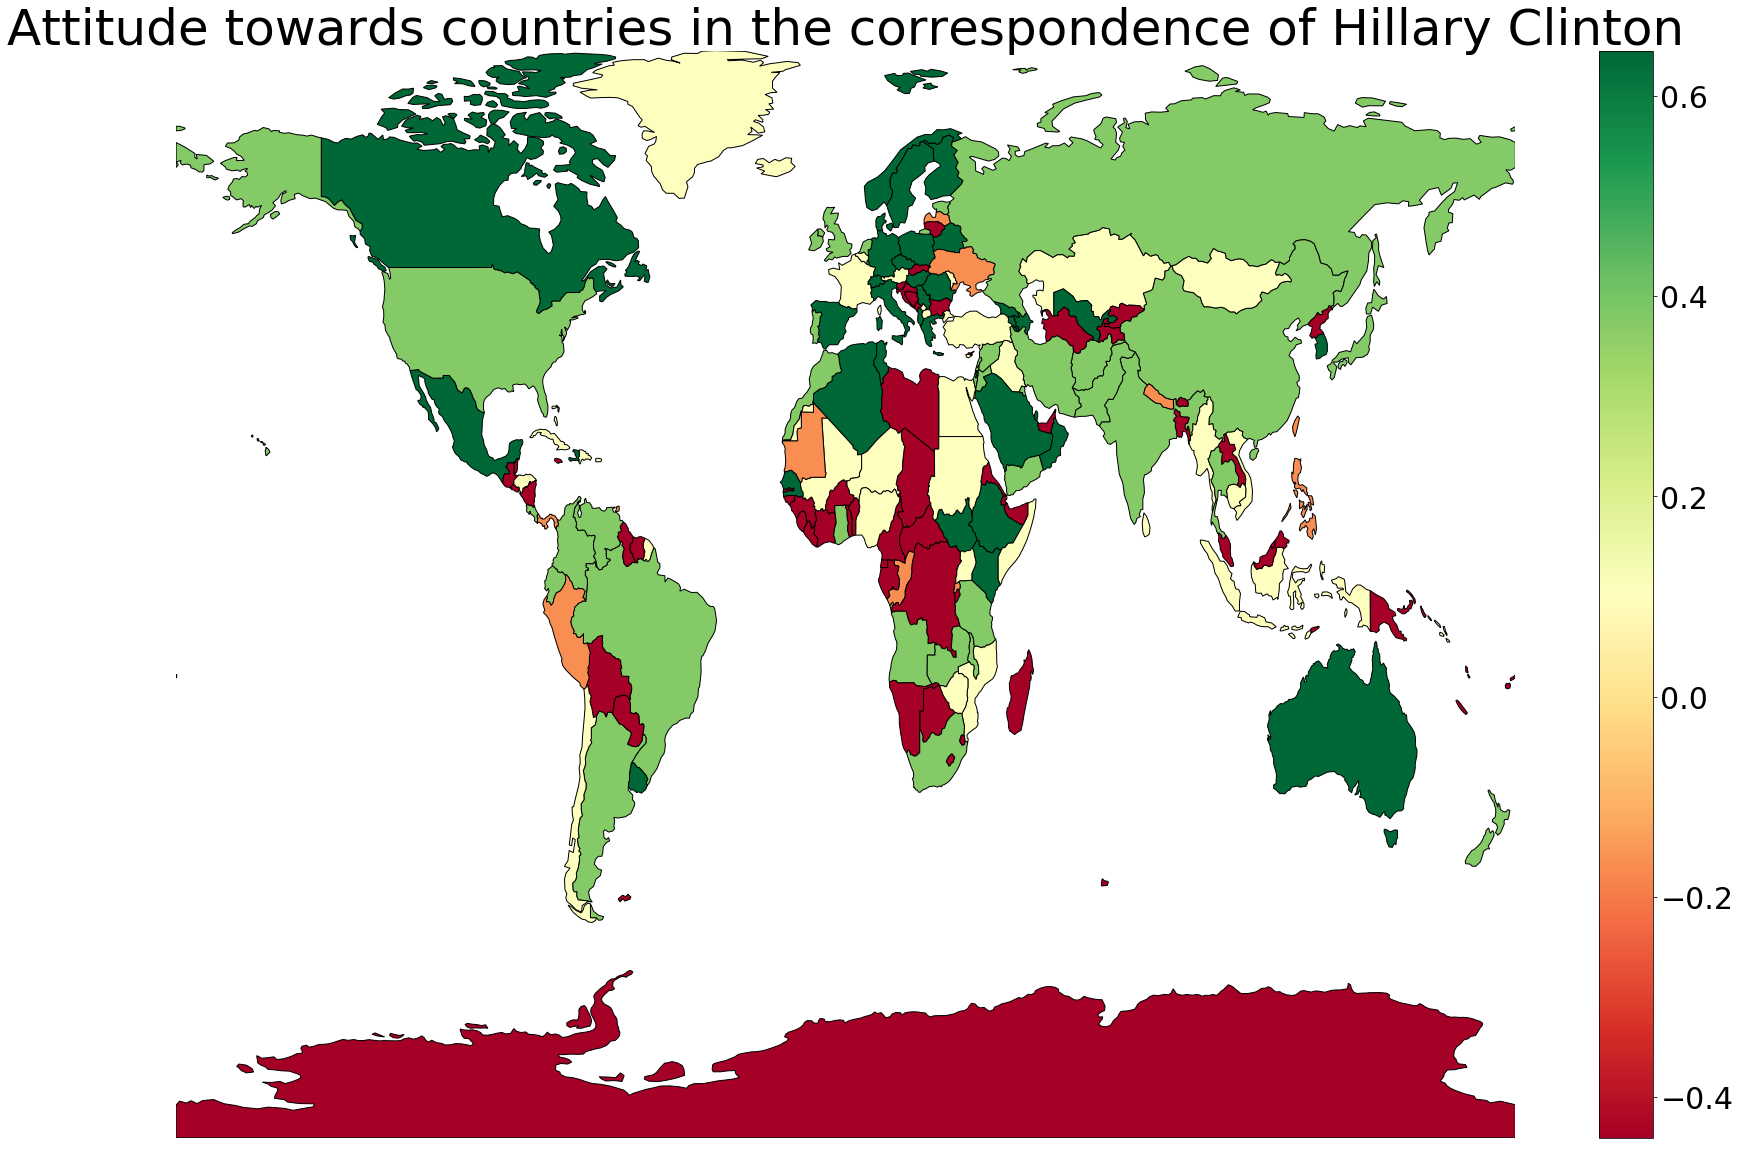

In [59]:
fig, ax = plt.subplots(1, figsize=(30, 20))

geoplot.choropleth(df, ax=ax, hue='Sentiment', cmap='RdYlGn')
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=df['Sentiment'].min(), vmax=df['Sentiment'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=30) 
plt.title('Attitude towards countries in the correspondence of Hillary Clinton', fontsize=50);
plt.savefig('data/Emotions_of_country_in_dialogues_of_Clinton_title.png');

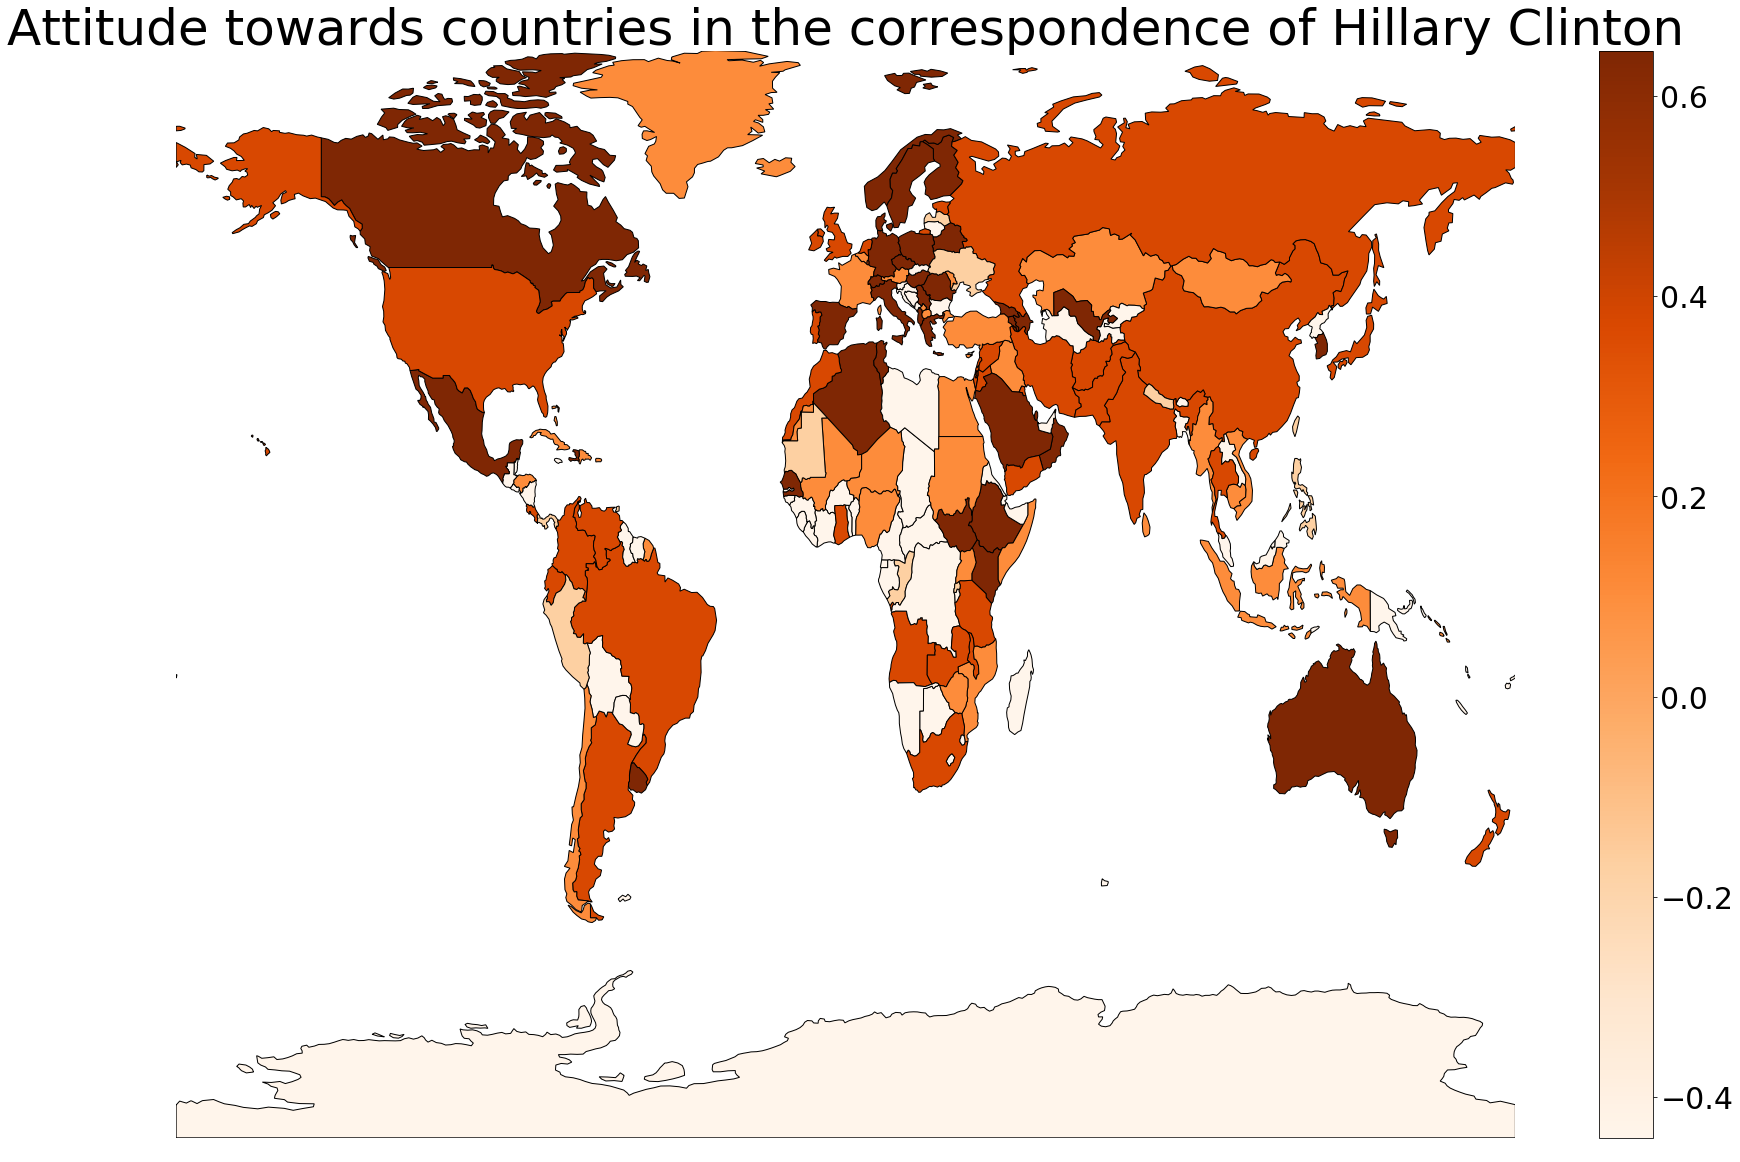

In [68]:
fig, ax = plt.subplots(1, figsize=(30, 20))

geoplot.choropleth(df, ax=ax, hue='Sentiment', cmap='Oranges')
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=df['Sentiment'].min(), vmax=df['Sentiment'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=30) 
plt.title('Attitude towards countries in the correspondence of Hillary Clinton', fontsize=50);
plt.savefig('data/Emotions_of_country_in_dialogues_of_Clinton_title_Oranges.png');

In [38]:
clinton_trump = pd.read_csv('data/clinton-trump-tweets/tweets.csv')

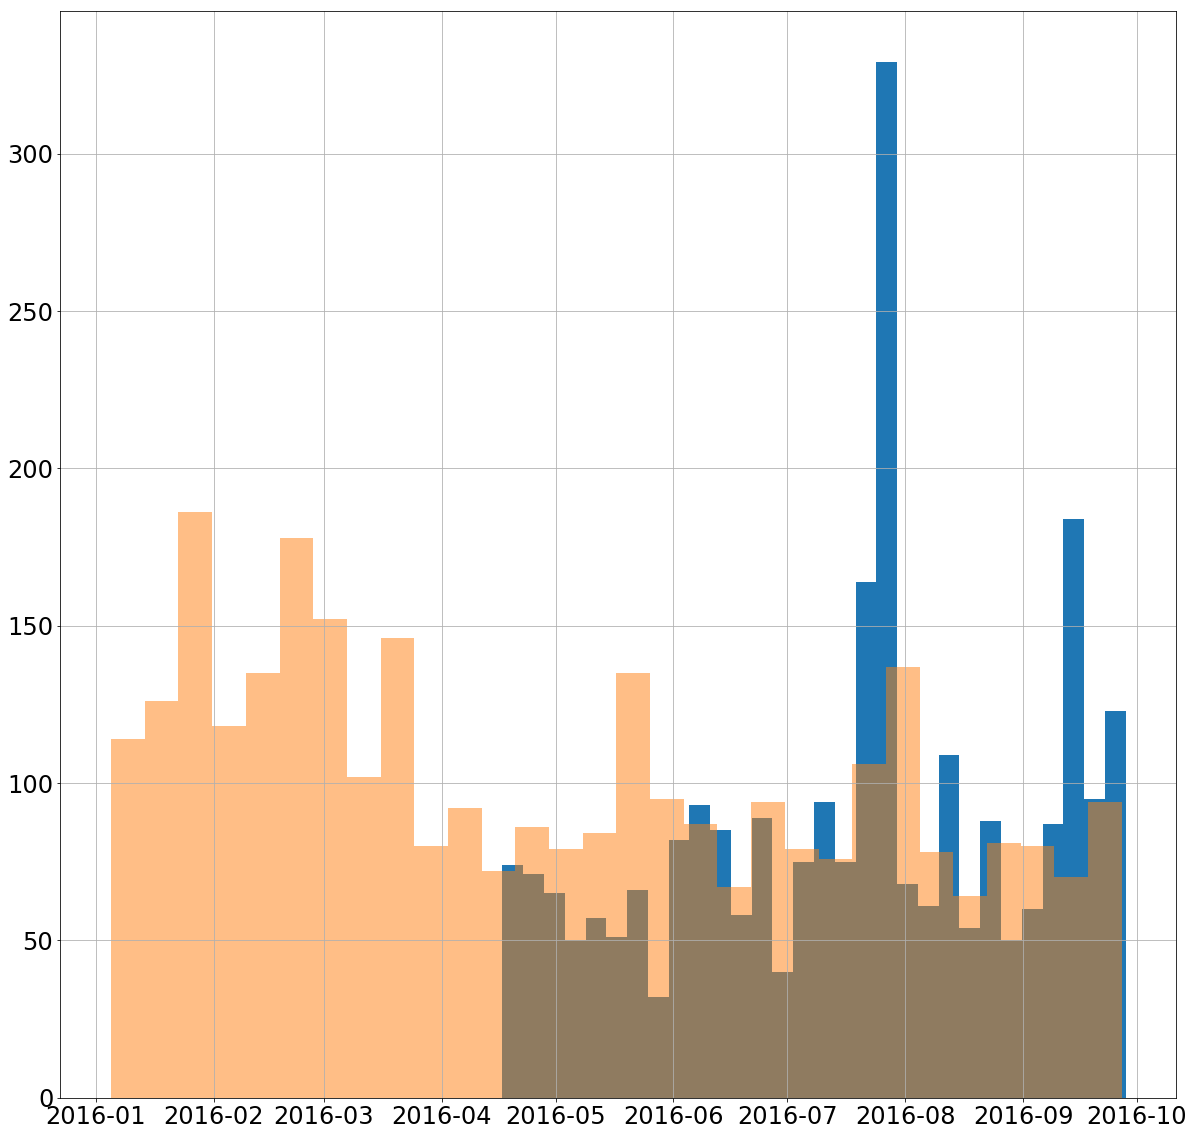

In [66]:
fontsize=20
plt.figure(figsize=(fontsize, fontsize))
clinton_trump[(~clinton_trump['is_retweet']) & (clinton_trump['handle'] == 'HillaryClinton')]['time'].apply(lambda row: datetime.strptime(row[:10], '%Y-%m-%d')).hist(bins=30)
clinton_trump[(~clinton_trump['is_retweet']) & (clinton_trump['handle'] == 'realDonaldTrump')]['time'].apply(lambda row: datetime.strptime(row[:10], '%Y-%m-%d')).hist(bins=30, alpha=0.5);
plt.xticks(fontsize=fontsize * 1.2)
plt.yticks(fontsize=fontsize * 1.2)
plt.savefig('data/tweets.png');

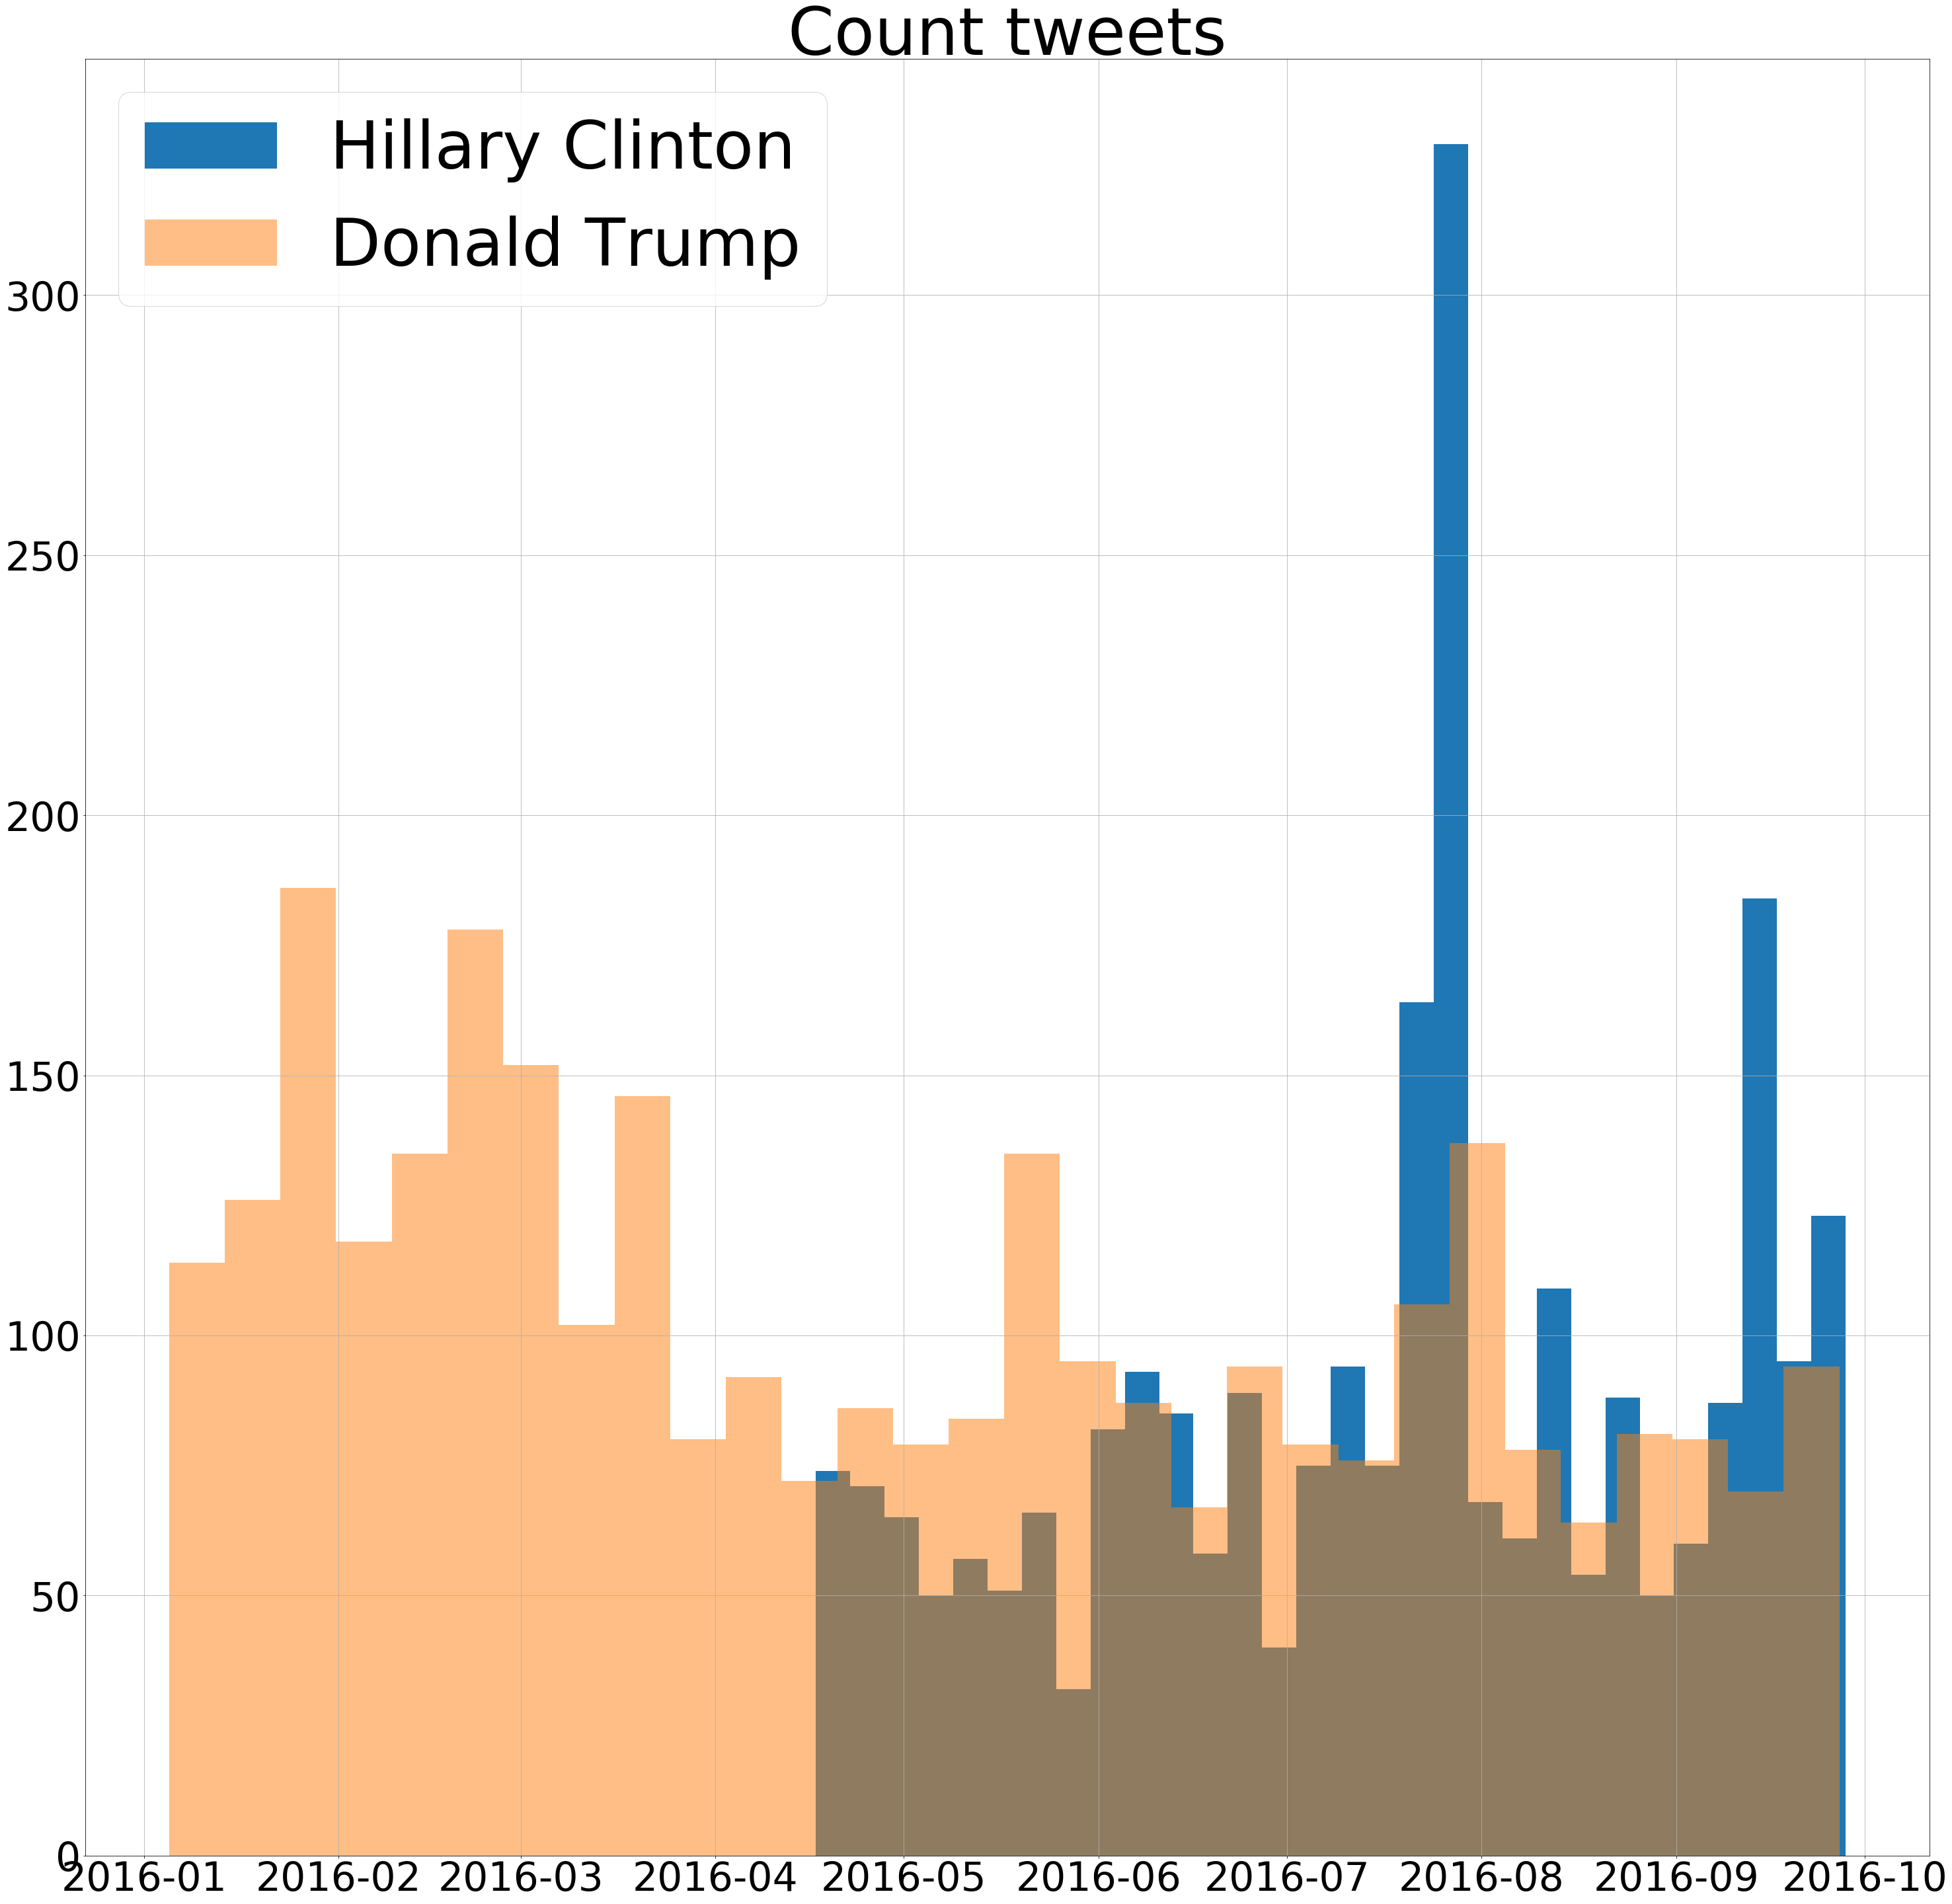

In [65]:
plt.figure(figsize=(fontsize, fontsize))
clinton_trump[(~clinton_trump['is_retweet']) & (clinton_trump['handle'] == 'HillaryClinton')]['time'].apply(lambda row: datetime.strptime(row[:10], '%Y-%m-%d')).hist(bins=30)
clinton_trump[(~clinton_trump['is_retweet']) & (clinton_trump['handle'] == 'realDonaldTrump')]['time'].apply(lambda row: datetime.strptime(row[:10], '%Y-%m-%d')).hist(bins=30, alpha=0.5);
plt.legend(['Hillary Clinton', 'Donald Trump'], fontsize=fontsize * 2)
plt.xticks(fontsize=fontsize * 1.2)
plt.yticks(fontsize=fontsize * 1.2)
plt.title('Count tweets', fontsize=fontsize * 2);
plt.savefig('data/tweets_title.png');